In [6]:
from ultralytics import YOLO

In [7]:
# Load a pre-trained YOLOv12 model (choose a model variant like 'yolov12n.pt')
model = YOLO('yolov12n.pt')

In [8]:

# Data augmentation settings
data_augmentation = {
    'mosaic': 1.0,
    'mixup': 0.1,
    'copy_paste': 0.1,
    'hsv_h': 0.015,
    'hsv_s': 0.7,
    'hsv_v': 0.4,
    'degrees': 0.0,
    'translate': 0.1,
    'scale': 0.5,
    'shear': 0.0,
    'perspective': 0.0,
    'flipud': 0.0,
    'fliplr': 0.5,
}

In [9]:
import os

def display_directory_tree(root_dir, indent="", file_limit=10):
    try:
        items = os.listdir(root_dir)
        # Limit the number of files displayed
        display_items = items[:file_limit] + (['...'] if len(items) > file_limit else [])
        
        for item in display_items:
            item_path = os.path.join(root_dir, item)
            print(f"{indent}|-- {item}")
            
            if os.path.isdir(item_path):
                display_directory_tree(item_path, indent + "   ", file_limit)
                
    except PermissionError as e:
        print(f"{indent}|-- [Permission Denied]")

# Specify the root directory
root_directory = "/home/ai/Desktop/kaniska/datasets/Datasets"

# Display the directory tree
display_directory_tree(root_directory)


|-- annotations
   |-- train.json
   |-- test.json
|-- train
   |-- labels
      |-- IMG_20191215_110842.txt
      |-- IMG_1016.txt
      |-- IMG_20191215_111556.txt
      |-- IMG_1099.txt
      |-- IMG_1062.txt
      |-- IMG_20191215_111945.txt
      |-- IMG_20191215_112527.txt
      |-- IMG_20191215_111942.txt
      |-- IMG_1093.txt
      |-- IMG_20191215_111430.txt
      |-- ...
   |-- images
      |-- IMG_20191215_111438.jpg
      |-- IMG_20191215_112324.jpg
      |-- IMG_1022.jpg
      |-- IMG_20191215_111326.jpg
      |-- IMG_20191215_111759.jpg
      |-- IMG_20191215_112443.jpg
      |-- IMG_1198.jpg
      |-- IMG_20191215_111213.jpg
      |-- IMG_1003.jpg
      |-- IMG_20191215_112031.jpg
      |-- ...
   |-- labels.cache
|-- val
   |-- labels
      |-- IMG_20191215_111245.txt
      |-- IMG_1129.txt
      |-- IMG_20191215_111357_1.txt
      |-- IMG_1268.txt
      |-- IMG_0988.txt
      |-- IMG_20191215_112512.txt
      |-- IMG_20191215_111725.txt
      |-- IMG_20191215_111626.t

In [11]:
# # Start training with the correct parameter passing
# results = model.train(
#     data='datasets/Datasets/example_dataset.yaml',
#     epochs=200,  # Number of training epochs
#     batch=16,   # Batch size
#     imgsz=640,  # Image size
#     device=0,   # Use GPU (for CPU use 'cpu' or device='0' for GPU ID 0)
#     resume=False,  # Start a new training session
#     **data_augmentation  # Unpack data augmentation settings
# )

# Start training with periodic checkpoint saving
results = model.train(
    data='datasets/Datasets/example_dataset.yaml',
    epochs=200,            # Number of training epochs
    batch=8,              # Batch size
    imgsz=640,             # Image size
    device=0,              # Use GPU (for CPU use 'cpu' or device='0' for GPU ID 0)
    resume=False,          # Start a new training session
    save_period=50,        # Save .pt file every 50 epochs
    **data_augmentation    # Unpack data augmentation settings
)


Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7940MiB)
engine/trainer: task=detect, mode=train, model=yolov12n.pt, data=datasets/Datasets/example_dataset.yaml, epochs=200, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=50, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

train: Scanning /home/ai/Desktop/kaniska/datasets/Datasets/train/labels.cache... 643 images, 0 backgrounds, 0 corrupt: 100%|██████████| 643/643 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /home/ai/Desktop/kaniska/datasets/Datasets/val/labels.cache... 161 images, 0 backgrounds, 0 corrupt: 100%|██████████| 161/161 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      2.24G     0.6543     0.5583     0.8965         41        640: 100%|██████████| 81/81 [00:16<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.59it/s]

                   all        161       1996      0.781      0.786      0.828      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      2.22G     0.6702     0.5632     0.9002         41        640: 100%|██████████| 81/81 [00:12<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.19it/s]

                   all        161       1996      0.771      0.755      0.799       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      2.28G     0.6843     0.5866     0.9087        114        640: 100%|██████████| 81/81 [00:10<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.15it/s]

                   all        161       1996      0.771      0.747      0.795      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      2.23G     0.6779      0.598      0.906         73        640: 100%|██████████| 81/81 [00:12<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.36it/s]

                   all        161       1996       0.82      0.718      0.811      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      2.36G     0.6788     0.6104     0.9065         50        640: 100%|██████████| 81/81 [00:13<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.11it/s]

                   all        161       1996       0.79      0.746      0.811      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      2.19G     0.6929     0.6005     0.9092         63        640: 100%|██████████| 81/81 [00:11<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.23it/s]

                   all        161       1996      0.794      0.724      0.798      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      2.14G     0.7026     0.6293     0.9129         73        640: 100%|██████████| 81/81 [00:13<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.76it/s]

                   all        161       1996      0.787       0.73        0.8      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      2.21G     0.6974     0.6296     0.9199         44        640: 100%|██████████| 81/81 [00:12<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.23it/s]

                   all        161       1996      0.807      0.727      0.813      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      2.29G     0.6929     0.6099     0.9098         47        640: 100%|██████████| 81/81 [00:12<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.17it/s]

                   all        161       1996      0.756      0.756      0.813      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      2.27G     0.6938     0.6099     0.9132         31        640: 100%|██████████| 81/81 [00:13<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.32it/s]

                   all        161       1996      0.776      0.753      0.797      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200       2.2G     0.6809     0.6065     0.9106         50        640: 100%|██████████| 81/81 [00:13<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.09it/s]


                   all        161       1996      0.753      0.791      0.817      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      2.36G     0.6903     0.6175     0.9124         95        640: 100%|██████████| 81/81 [00:12<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.27it/s]

                   all        161       1996      0.778      0.744      0.804      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      2.21G     0.6949     0.6215     0.9127         28        640: 100%|██████████| 81/81 [00:12<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.47it/s]

                   all        161       1996      0.798      0.768      0.833      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      2.26G     0.7008     0.6145     0.9156         47        640: 100%|██████████| 81/81 [00:11<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.34it/s]

                   all        161       1996      0.809      0.754      0.826      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      2.09G     0.6625     0.5722     0.9044         60        640: 100%|██████████| 81/81 [00:11<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.18it/s]


                   all        161       1996      0.763      0.773      0.802      0.669

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      2.14G     0.6905      0.612     0.9093         25        640: 100%|██████████| 81/81 [00:11<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.27it/s]

                   all        161       1996      0.755       0.76      0.812      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      2.34G      0.709     0.6303     0.9151         84        640: 100%|██████████| 81/81 [00:11<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.56it/s]

                   all        161       1996      0.815      0.751      0.829      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      2.28G     0.6867     0.5971     0.9056         25        640: 100%|██████████| 81/81 [00:12<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.56it/s]

                   all        161       1996      0.768       0.74      0.795      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200       2.2G     0.6911     0.6189     0.9161         49        640: 100%|██████████| 81/81 [00:12<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.95it/s]

                   all        161       1996      0.786      0.733      0.801      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      2.43G     0.6824     0.6031     0.9069        106        640: 100%|██████████| 81/81 [00:12<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.83it/s]

                   all        161       1996      0.765      0.764      0.812      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      2.23G     0.6805     0.6063     0.9116         81        640: 100%|██████████| 81/81 [00:12<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.77it/s]

                   all        161       1996      0.784      0.733        0.8      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      2.23G     0.7004     0.6158     0.9126         72        640: 100%|██████████| 81/81 [00:12<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.34it/s]

                   all        161       1996      0.779      0.749      0.804      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200       2.3G      0.679     0.5936     0.9106         55        640: 100%|██████████| 81/81 [00:12<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.65it/s]

                   all        161       1996      0.804      0.737       0.82      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      2.29G     0.6682     0.5851     0.9061        160        640: 100%|██████████| 81/81 [00:11<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.42it/s]

                   all        161       1996      0.788       0.76      0.821      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      2.29G     0.6829      0.605     0.9086         46        640: 100%|██████████| 81/81 [00:11<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.84it/s]

                   all        161       1996      0.738       0.77      0.795      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200       2.2G     0.6728     0.5696     0.9087         63        640: 100%|██████████| 81/81 [00:10<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.02it/s]

                   all        161       1996      0.802      0.732      0.825      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      2.49G     0.6888      0.586     0.9049        169        640: 100%|██████████| 81/81 [00:11<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.32it/s]


                   all        161       1996       0.81      0.729      0.805      0.677

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200       2.3G     0.6808       0.58      0.906         43        640: 100%|██████████| 81/81 [00:11<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.59it/s]

                   all        161       1996      0.781      0.738      0.796       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      2.32G     0.6769     0.5826     0.9042         59        640: 100%|██████████| 81/81 [00:11<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.17it/s]

                   all        161       1996       0.78      0.752      0.814      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      2.18G     0.6649     0.5814     0.9044         25        640: 100%|██████████| 81/81 [00:11<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  7.25it/s]

                   all        161       1996      0.803      0.741      0.823       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      2.21G     0.6779     0.5844     0.9019         42        640: 100%|██████████| 81/81 [00:11<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.97it/s]

                   all        161       1996       0.79      0.752      0.816      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      2.15G     0.6846     0.5928     0.9073         84        640: 100%|██████████| 81/81 [00:10<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.18it/s]

                   all        161       1996      0.818      0.758      0.826      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      2.35G     0.6752     0.5754     0.9059        118        640: 100%|██████████| 81/81 [00:11<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.63it/s]

                   all        161       1996      0.801      0.752      0.834      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      2.15G     0.6678     0.5596     0.9013         60        640: 100%|██████████| 81/81 [00:11<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 15.13it/s]

                   all        161       1996      0.777      0.754      0.809       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      2.33G     0.6774      0.554     0.9049        100        640: 100%|██████████| 81/81 [00:11<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.26it/s]

                   all        161       1996      0.802       0.77      0.831      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      2.22G     0.6937     0.5936     0.9113         60        640: 100%|██████████| 81/81 [00:11<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.02it/s]

                   all        161       1996      0.804      0.767      0.834      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200       2.1G     0.6872      0.583     0.9051         38        640: 100%|██████████| 81/81 [00:11<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.31it/s]

                   all        161       1996      0.787      0.771      0.828      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      2.15G     0.6616     0.5517      0.901         80        640: 100%|██████████| 81/81 [00:11<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.94it/s]

                   all        161       1996      0.819      0.749      0.832      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      2.18G     0.6702     0.5402     0.9043         20        640: 100%|██████████| 81/81 [00:10<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.75it/s]

                   all        161       1996      0.776      0.776      0.824      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      2.48G     0.6796      0.572     0.9086        103        640: 100%|██████████| 81/81 [00:11<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.61it/s]


                   all        161       1996      0.788      0.737      0.818      0.685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      2.22G     0.6814     0.5641     0.8981         54        640: 100%|██████████| 81/81 [00:11<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.30it/s]

                   all        161       1996      0.767      0.766       0.81      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      2.42G     0.6702     0.5711     0.9079        118        640: 100%|██████████| 81/81 [00:11<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.24it/s]

                   all        161       1996      0.806      0.726      0.806      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      2.31G     0.6646     0.5496     0.9034        153        640: 100%|██████████| 81/81 [00:11<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.37it/s]


                   all        161       1996      0.787      0.748      0.811      0.676

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      2.38G     0.6547     0.5342     0.8992         33        640: 100%|██████████| 81/81 [00:10<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.67it/s]

                   all        161       1996      0.793      0.744      0.804       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200       2.5G     0.6498     0.5271     0.8934        175        640: 100%|██████████| 81/81 [00:11<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.95it/s]

                   all        161       1996      0.791      0.734      0.801      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      2.25G     0.6576     0.5502     0.9037         60        640: 100%|██████████| 81/81 [00:11<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.09it/s]

                   all        161       1996      0.798       0.77      0.821      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      2.17G      0.682     0.5745     0.9091        135        640: 100%|██████████| 81/81 [00:11<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.84it/s]

                   all        161       1996      0.771      0.781       0.82      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      2.21G     0.6598     0.5503      0.898         39        640: 100%|██████████| 81/81 [00:11<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.84it/s]

                   all        161       1996      0.815      0.745      0.813       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      2.17G     0.6529     0.5574     0.9056         61        640: 100%|██████████| 81/81 [00:11<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.21it/s]

                   all        161       1996      0.776      0.744      0.813      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      2.15G     0.6671      0.551     0.9031         81        640: 100%|██████████| 81/81 [00:11<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.60it/s]

                   all        161       1996      0.768      0.738      0.806      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      2.13G     0.6546     0.5343     0.8918         79        640: 100%|██████████| 81/81 [00:11<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.91it/s]


                   all        161       1996       0.81      0.746      0.824       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      2.32G     0.6689     0.5274     0.8995         62        640: 100%|██████████| 81/81 [00:11<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.78it/s]

                   all        161       1996      0.758      0.779       0.82      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      2.24G     0.6507     0.5289      0.898         40        640: 100%|██████████| 81/81 [00:11<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  7.43it/s]

                   all        161       1996      0.811      0.722      0.821      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200       2.1G      0.659      0.536      0.901        151        640: 100%|██████████| 81/81 [00:10<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.84it/s]

                   all        161       1996      0.779      0.758      0.827      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      2.45G     0.6787     0.5597     0.9001         75        640: 100%|██████████| 81/81 [00:10<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.19it/s]


                   all        161       1996      0.741      0.778      0.807       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      2.25G     0.6406     0.5243     0.8949         50        640: 100%|██████████| 81/81 [00:11<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.85it/s]

                   all        161       1996      0.815      0.757      0.821      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200       2.2G     0.6718     0.5458     0.8994         77        640: 100%|██████████| 81/81 [00:10<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.87it/s]

                   all        161       1996       0.77      0.755      0.798      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      2.15G     0.6692     0.5675     0.8979         93        640: 100%|██████████| 81/81 [00:11<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.32it/s]

                   all        161       1996      0.827      0.766      0.828      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      2.11G     0.6593     0.5235     0.8996         65        640: 100%|██████████| 81/81 [00:11<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.45it/s]

                   all        161       1996      0.812      0.755      0.817      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      2.31G     0.6779      0.572     0.9057         21        640: 100%|██████████| 81/81 [00:11<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.20it/s]

                   all        161       1996      0.759      0.789      0.817      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      2.24G     0.6503     0.5565     0.9001         78        640: 100%|██████████| 81/81 [00:11<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 15.78it/s]

                   all        161       1996      0.798      0.778       0.83      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      2.24G     0.6503     0.5516     0.9002         55        640: 100%|██████████| 81/81 [00:11<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.13it/s]

                   all        161       1996      0.804       0.76      0.823        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      2.43G     0.6461     0.5339     0.8971        118        640: 100%|██████████| 81/81 [00:12<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.53it/s]


                   all        161       1996        0.8      0.756      0.826        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      2.27G     0.6519      0.535     0.8971         62        640: 100%|██████████| 81/81 [00:10<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.59it/s]

                   all        161       1996      0.772      0.799      0.839      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      2.18G     0.6643     0.5464        0.9         88        640: 100%|██████████| 81/81 [00:11<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.32it/s]

                   all        161       1996      0.828      0.716      0.814      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      2.22G     0.6537      0.524      0.901         30        640: 100%|██████████| 81/81 [00:10<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.95it/s]

                   all        161       1996      0.804      0.743      0.814      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      2.15G      0.643     0.5211     0.8963         83        640: 100%|██████████| 81/81 [00:11<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.02it/s]

                   all        161       1996      0.808      0.759      0.828      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200       2.3G     0.6453     0.5243     0.8947         68        640: 100%|██████████| 81/81 [00:11<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.91it/s]

                   all        161       1996      0.777       0.75      0.809      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      2.14G     0.6727     0.5445     0.8994         96        640: 100%|██████████| 81/81 [00:11<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.60it/s]

                   all        161       1996      0.789      0.791      0.833      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      2.23G     0.6483     0.5125     0.8959         44        640: 100%|██████████| 81/81 [00:11<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.18it/s]

                   all        161       1996      0.818      0.739      0.806      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      2.21G     0.6455     0.5203     0.9018         68        640: 100%|██████████| 81/81 [00:11<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.70it/s]

                   all        161       1996      0.786      0.801      0.837      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      2.21G     0.6449     0.5213     0.8884         77        640: 100%|██████████| 81/81 [00:11<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.16it/s]

                   all        161       1996      0.828      0.765      0.844      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      2.38G     0.6255     0.5096     0.8874         46        640: 100%|██████████| 81/81 [00:12<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.49it/s]

                   all        161       1996      0.775      0.789      0.829      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      2.72G     0.6534     0.5253     0.8959         78        640: 100%|██████████| 81/81 [00:12<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 11.00it/s]


                   all        161       1996      0.795      0.771      0.817      0.684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      2.35G     0.6511      0.534     0.9009         28        640: 100%|██████████| 81/81 [00:11<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.77it/s]

                   all        161       1996      0.824      0.749      0.819      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      2.36G      0.621     0.5109      0.893         43        640: 100%|██████████| 81/81 [00:10<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.33it/s]

                   all        161       1996      0.784      0.788      0.832        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      2.46G       0.65     0.5212     0.8934        119        640: 100%|██████████| 81/81 [00:10<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.10it/s]

                   all        161       1996      0.799      0.752      0.824      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      2.57G      0.657     0.5317     0.8988         51        640: 100%|██████████| 81/81 [00:11<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.39it/s]

                   all        161       1996      0.821      0.762      0.828      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      2.37G     0.6387     0.5165     0.8851         78        640: 100%|██████████| 81/81 [00:10<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.11it/s]

                   all        161       1996      0.745      0.788      0.813      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      2.39G     0.6253     0.5146     0.8891         70        640: 100%|██████████| 81/81 [00:11<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.69it/s]

                   all        161       1996      0.773      0.781      0.838       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      2.12G     0.6635     0.5432      0.901         32        640: 100%|██████████| 81/81 [00:12<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.28it/s]

                   all        161       1996      0.782      0.763      0.815      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      2.34G     0.6396     0.4994     0.8887        145        640: 100%|██████████| 81/81 [00:11<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.02it/s]

                   all        161       1996      0.786      0.761      0.817      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      2.22G     0.6185      0.493     0.8901         61        640: 100%|██████████| 81/81 [00:11<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.84it/s]


                   all        161       1996      0.799      0.748      0.825      0.697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      2.36G     0.6486     0.5418     0.8963        111        640: 100%|██████████| 81/81 [00:11<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.60it/s]

                   all        161       1996      0.773      0.769       0.81      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      2.15G     0.6451     0.5025     0.8919         40        640: 100%|██████████| 81/81 [00:11<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.89it/s]

                   all        161       1996      0.806       0.74      0.801      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      2.16G     0.6351     0.5151     0.8942         59        640: 100%|██████████| 81/81 [00:11<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.78it/s]

                   all        161       1996      0.797      0.759      0.824      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200       2.1G     0.6389     0.5066     0.8953         67        640: 100%|██████████| 81/81 [00:12<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.82it/s]

                   all        161       1996      0.795      0.782      0.832      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      2.38G     0.6432     0.5275     0.8968         67        640: 100%|██████████| 81/81 [00:12<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.69it/s]


                   all        161       1996      0.811      0.751       0.82      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      2.47G     0.6533     0.5189      0.895         45        640: 100%|██████████| 81/81 [00:11<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.67it/s]

                   all        161       1996      0.761      0.772      0.813       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      2.24G     0.6391     0.5273     0.8912         79        640: 100%|██████████| 81/81 [00:11<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.02it/s]

                   all        161       1996      0.789       0.76      0.818       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      2.18G       0.63     0.5027     0.8892         61        640: 100%|██████████| 81/81 [00:12<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.95it/s]

                   all        161       1996      0.812      0.744      0.823      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      2.33G     0.6227      0.486      0.883         49        640: 100%|██████████| 81/81 [00:12<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.02it/s]

                   all        161       1996      0.822      0.742      0.828      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      2.36G      0.628     0.4889     0.8851         52        640: 100%|██████████| 81/81 [00:12<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.64it/s]

                   all        161       1996      0.827      0.752      0.838      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      2.18G     0.6342     0.5084     0.8925         85        640: 100%|██████████| 81/81 [00:12<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.73it/s]


                   all        161       1996      0.813      0.763      0.831      0.704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      2.18G      0.641     0.4938      0.888         72        640: 100%|██████████| 81/81 [00:12<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.76it/s]


                   all        161       1996       0.84      0.719      0.825        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200       2.5G     0.6133     0.4698     0.8809         62        640: 100%|██████████| 81/81 [00:13<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.54it/s]

                   all        161       1996      0.823      0.756      0.831      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      2.38G     0.6342     0.5146     0.8927         33        640: 100%|██████████| 81/81 [00:12<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.27it/s]

                   all        161       1996      0.807      0.768      0.824      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      2.38G      0.618     0.4773     0.8847         79        640: 100%|██████████| 81/81 [00:11<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.84it/s]

                   all        161       1996      0.833       0.74      0.818      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      2.26G     0.6165     0.4907     0.8876         91        640: 100%|██████████| 81/81 [00:12<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.12it/s]

                   all        161       1996       0.77      0.803      0.837      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      2.08G     0.6304      0.493     0.8908         51        640: 100%|██████████| 81/81 [00:11<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.75it/s]

                   all        161       1996      0.798      0.761      0.824      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200       2.3G     0.6439     0.5034     0.8921         45        640: 100%|██████████| 81/81 [00:10<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  7.91it/s]

                   all        161       1996        0.8      0.762      0.827      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      2.44G     0.6301     0.5028     0.8871         50        640: 100%|██████████| 81/81 [00:09<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.25it/s]

                   all        161       1996      0.812      0.753      0.824        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      2.35G      0.632     0.4972     0.8887         54        640: 100%|██████████| 81/81 [00:10<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 15.85it/s]

                   all        161       1996      0.818      0.769      0.836      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      2.23G     0.6074     0.4695     0.8825         82        640: 100%|██████████| 81/81 [00:10<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  7.95it/s]

                   all        161       1996      0.804      0.759      0.836      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      2.33G     0.6205     0.4738     0.8896         67        640: 100%|██████████| 81/81 [00:12<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.05it/s]

                   all        161       1996      0.809      0.783      0.832      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      2.16G     0.6297     0.4758     0.8882         48        640: 100%|██████████| 81/81 [00:13<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.90it/s]

                   all        161       1996      0.809      0.784      0.833      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      2.09G     0.6354      0.492     0.8868         72        640: 100%|██████████| 81/81 [00:12<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  7.69it/s]

                   all        161       1996      0.798       0.79      0.832      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      2.27G     0.6064     0.4505     0.8809         42        640: 100%|██████████| 81/81 [00:13<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.01it/s]

                   all        161       1996      0.805      0.774      0.831      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      2.23G     0.6091     0.4717     0.8845         62        640: 100%|██████████| 81/81 [00:13<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  7.16it/s]

                   all        161       1996      0.785      0.779      0.824      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      2.28G     0.6094     0.4693      0.883         57        640: 100%|██████████| 81/81 [00:13<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.87it/s]


                   all        161       1996      0.832      0.759      0.836      0.712

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      2.31G     0.6162     0.4836     0.8868         56        640: 100%|██████████| 81/81 [00:11<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.29it/s]


                   all        161       1996      0.819      0.761      0.832      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      2.34G       0.62     0.4858     0.8853         22        640: 100%|██████████| 81/81 [00:12<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.43it/s]

                   all        161       1996      0.808      0.749      0.817      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200       2.1G     0.6122     0.4744     0.8819         40        640: 100%|██████████| 81/81 [00:13<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.86it/s]

                   all        161       1996      0.822      0.745      0.822      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200       2.4G     0.5902     0.4468     0.8776         52        640: 100%|██████████| 81/81 [00:12<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.78it/s]

                   all        161       1996      0.815      0.762      0.835      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      2.27G     0.6037     0.4621     0.8814         60        640: 100%|██████████| 81/81 [00:12<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.12it/s]

                   all        161       1996      0.806      0.747      0.815      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      2.33G      0.621     0.5009     0.8907         77        640: 100%|██████████| 81/81 [00:14<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.27it/s]

                   all        161       1996      0.788      0.782      0.829        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      2.22G     0.6216     0.4914     0.8894         73        640: 100%|██████████| 81/81 [00:12<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.60it/s]

                   all        161       1996      0.806      0.766      0.835      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      2.36G     0.6229      0.485     0.8862         60        640: 100%|██████████| 81/81 [00:11<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.79it/s]

                   all        161       1996      0.811      0.756      0.818      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      2.34G     0.6082     0.4762     0.8856         41        640: 100%|██████████| 81/81 [00:12<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.16it/s]

                   all        161       1996      0.805      0.765      0.827        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      2.12G     0.6182     0.4918     0.8874         91        640: 100%|██████████| 81/81 [00:12<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  7.99it/s]


                   all        161       1996      0.812      0.762      0.819      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      2.29G     0.6166     0.4704     0.8776         59        640: 100%|██████████| 81/81 [00:11<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.22it/s]

                   all        161       1996      0.798      0.782      0.829      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200       2.3G     0.6216      0.469     0.8795        105        640: 100%|██████████| 81/81 [00:13<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.28it/s]

                   all        161       1996      0.813      0.774      0.828        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      2.23G     0.6108     0.4676     0.8823         43        640: 100%|██████████| 81/81 [00:13<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.74it/s]

                   all        161       1996      0.786      0.759      0.813      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      2.35G      0.598     0.4481     0.8768        135        640: 100%|██████████| 81/81 [00:13<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.43it/s]

                   all        161       1996      0.824      0.754      0.821        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      2.14G     0.6169     0.4758     0.8849         87        640: 100%|██████████| 81/81 [00:12<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.41it/s]

                   all        161       1996      0.838      0.757       0.83      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      2.27G     0.6228     0.4899     0.8893         60        640: 100%|██████████| 81/81 [00:11<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.03it/s]

                   all        161       1996       0.81      0.757       0.82        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      2.37G     0.6181     0.4753     0.8805        108        640: 100%|██████████| 81/81 [00:12<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.10it/s]

                   all        161       1996      0.802      0.776       0.83      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      2.13G     0.6119     0.4646      0.883         51        640: 100%|██████████| 81/81 [00:11<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.30it/s]

                   all        161       1996       0.82      0.783      0.836      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      2.29G     0.6092     0.4759      0.884         32        640: 100%|██████████| 81/81 [00:12<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.96it/s]

                   all        161       1996      0.781      0.778       0.84      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      2.25G     0.5926     0.4646     0.8814         28        640: 100%|██████████| 81/81 [00:11<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  7.43it/s]

                   all        161       1996      0.815      0.764      0.827      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      2.44G     0.6126     0.4685     0.8853         42        640: 100%|██████████| 81/81 [00:11<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.20it/s]

                   all        161       1996      0.776      0.767      0.816       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      2.18G     0.5914      0.463     0.8777         55        640: 100%|██████████| 81/81 [00:10<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.77it/s]

                   all        161       1996      0.833      0.752      0.825      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      2.32G     0.5961     0.4612     0.8812         37        640: 100%|██████████| 81/81 [00:12<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.21it/s]


                   all        161       1996      0.815      0.769      0.825      0.704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      2.24G      0.603     0.4576     0.8802         81        640: 100%|██████████| 81/81 [00:10<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.64it/s]

                   all        161       1996      0.813      0.775      0.838      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      2.17G     0.5832     0.4383     0.8746         43        640: 100%|██████████| 81/81 [00:12<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.84it/s]

                   all        161       1996       0.82      0.764       0.83       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      2.17G     0.6067     0.4484      0.876         79        640: 100%|██████████| 81/81 [00:12<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.31it/s]

                   all        161       1996      0.829      0.742       0.82      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      2.26G     0.5847      0.438     0.8781        100        640: 100%|██████████| 81/81 [00:11<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.37it/s]

                   all        161       1996      0.825      0.778      0.838      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      2.39G     0.6038     0.4644     0.8847         75        640: 100%|██████████| 81/81 [00:12<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.95it/s]

                   all        161       1996      0.809      0.767      0.828      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      2.24G     0.6103     0.4774     0.8799         67        640: 100%|██████████| 81/81 [00:12<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.80it/s]

                   all        161       1996      0.819       0.77       0.83      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200       2.2G     0.6098     0.4604     0.8826        103        640: 100%|██████████| 81/81 [00:12<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.27it/s]

                   all        161       1996      0.803      0.779      0.824      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200       2.5G     0.5865     0.4525     0.8747         77        640: 100%|██████████| 81/81 [00:10<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.13it/s]

                   all        161       1996      0.805       0.77      0.811       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200       2.1G     0.5977     0.4598     0.8754         66        640: 100%|██████████| 81/81 [00:11<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.53it/s]

                   all        161       1996      0.831      0.764      0.824      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      2.34G     0.6086      0.451     0.8753         72        640: 100%|██████████| 81/81 [00:11<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.72it/s]

                   all        161       1996      0.828      0.759      0.825      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      2.15G     0.6048     0.4581     0.8822         18        640: 100%|██████████| 81/81 [00:10<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.44it/s]

                   all        161       1996      0.803      0.781      0.825      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      2.15G     0.5912     0.4456     0.8763         75        640: 100%|██████████| 81/81 [00:11<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.24it/s]

                   all        161       1996      0.823       0.78      0.828      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      2.47G     0.6063     0.4564     0.8752         34        640: 100%|██████████| 81/81 [00:11<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.21it/s]

                   all        161       1996      0.828      0.757      0.829       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      2.25G     0.5904     0.4451     0.8744         50        640: 100%|██████████| 81/81 [00:10<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.40it/s]

                   all        161       1996      0.808      0.777      0.834      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200       2.4G     0.5863     0.4375     0.8711         56        640: 100%|██████████| 81/81 [00:09<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.33it/s]

                   all        161       1996      0.807      0.773      0.828      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      2.37G     0.5984      0.455     0.8754         67        640: 100%|██████████| 81/81 [00:10<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.17it/s]

                   all        161       1996      0.828       0.76      0.826      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      2.29G     0.6082     0.4681     0.8799        114        640: 100%|██████████| 81/81 [00:11<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  7.17it/s]

                   all        161       1996       0.81      0.779      0.821        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      2.46G     0.5841     0.4424     0.8776         42        640: 100%|██████████| 81/81 [00:11<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  7.39it/s]

                   all        161       1996      0.809      0.755      0.813      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      2.23G     0.6097     0.4571     0.8827        103        640: 100%|██████████| 81/81 [00:10<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.70it/s]

                   all        161       1996        0.8      0.761      0.818      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      2.45G        0.6     0.4395     0.8749         67        640: 100%|██████████| 81/81 [00:10<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.98it/s]

                   all        161       1996      0.805      0.773      0.827      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      2.23G     0.5872     0.4372     0.8768         61        640: 100%|██████████| 81/81 [00:10<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.98it/s]

                   all        161       1996      0.823      0.763      0.829      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      2.34G      0.581     0.4456     0.8732         35        640: 100%|██████████| 81/81 [00:10<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 15.76it/s]

                   all        161       1996      0.799       0.78      0.837      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      2.28G      0.568     0.4129     0.8661         79        640: 100%|██████████| 81/81 [00:09<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.02it/s]


                   all        161       1996      0.819      0.763      0.835      0.714

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      2.57G     0.5871     0.4345     0.8726         61        640: 100%|██████████| 81/81 [00:10<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.44it/s]

                   all        161       1996      0.792      0.791      0.826      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      2.38G     0.5869     0.4347      0.872         93        640: 100%|██████████| 81/81 [00:09<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.85it/s]

                   all        161       1996      0.793      0.781       0.82      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      2.18G     0.5863      0.434     0.8786         69        640: 100%|██████████| 81/81 [00:10<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.11it/s]

                   all        161       1996      0.793      0.793      0.827      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      2.15G      0.568     0.4152     0.8652        110        640: 100%|██████████| 81/81 [00:10<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.73it/s]

                   all        161       1996      0.802      0.775      0.822      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      2.46G     0.5797     0.4294     0.8656         81        640: 100%|██████████| 81/81 [00:09<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.61it/s]

                   all        161       1996      0.845      0.751      0.832      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      2.26G     0.5793     0.4312     0.8737         62        640: 100%|██████████| 81/81 [00:10<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.25it/s]

                   all        161       1996      0.791      0.783      0.827      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      2.26G     0.5695     0.4267     0.8719         25        640: 100%|██████████| 81/81 [00:09<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.45it/s]

                   all        161       1996      0.821      0.758       0.82      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      2.37G     0.6009     0.4575     0.8779         36        640: 100%|██████████| 81/81 [00:10<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.18it/s]

                   all        161       1996      0.791      0.802       0.83      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      2.29G     0.5821     0.4266     0.8743         45        640: 100%|██████████| 81/81 [00:10<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.63it/s]

                   all        161       1996      0.816      0.776      0.825      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      2.21G     0.5808     0.4304     0.8693         98        640: 100%|██████████| 81/81 [00:12<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.78it/s]

                   all        161       1996      0.824       0.77      0.829      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      2.41G     0.5743     0.4208     0.8672         62        640: 100%|██████████| 81/81 [00:11<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.70it/s]

                   all        161       1996      0.807      0.793      0.828       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      2.23G      0.579     0.4382     0.8763         45        640: 100%|██████████| 81/81 [00:11<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.57it/s]

                   all        161       1996      0.817      0.777      0.827      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      2.42G     0.6117     0.4904     0.8822         35        640: 100%|██████████| 81/81 [00:12<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.11it/s]

                   all        161       1996      0.812      0.773      0.827       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      2.23G     0.5757     0.4332     0.8686        125        640: 100%|██████████| 81/81 [00:11<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.36it/s]

                   all        161       1996      0.802      0.782      0.825      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      2.13G     0.5852     0.4644     0.8743        199        640:  43%|████▎     | 35/81 [00:05<00:06,  6.64it/s]


KeyboardInterrupt: 

In [14]:
metrics = model.val()

Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7940MiB)
YOLOv12n summary (fused): 159 layers, 2,527,946 parameters, 13,650 gradients, 5.9 GFLOPs


val: Scanning /home/ai/Desktop/kaniska/datasets/Datasets/val/labels.cache... 161 images, 0 backgrounds, 0 corrupt: 100%|██████████| 161/161 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.11it/s]


                   all        161       1996      0.815      0.771      0.821      0.703
       b_fully_ripened         40         72       0.73      0.819      0.764      0.699
        b_half_ripened         52        116      0.821       0.71      0.771      0.664
               b_green         71        387      0.892       0.86      0.919      0.782
       l_fully_ripened         59        269      0.775      0.792      0.827      0.713
        l_half_ripened         67        223      0.773      0.672      0.769      0.658
               l_green         69        929      0.899      0.775      0.877      0.699
Speed: 0.2ms preprocess, 10.0ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train3


In [15]:
results = model("istockphoto-941825808-612x612.jpg")
results[0].show()


image 1/1 /home/ai/Desktop/kaniska/istockphoto-941825808-612x612.jpg: 640x640 2 b_fully_ripeneds, 4.7ms
Speed: 1.7ms preprocess, 4.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/ai/snap/code/common/.cache/gio-modules/libgiolibproxy.so
eog: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE


In [16]:
results = model("photo-1621872320697-102b596ef87c.jpeg")
results[0].show()


image 1/1 /home/ai/Desktop/kaniska/photo-1621872320697-102b596ef87c.jpeg: 640x448 2 b_greens, 4 l_greens, 35.0ms
Speed: 9.8ms preprocess, 35.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 448)


/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/ai/snap/code/common/.cache/gio-modules/libgiolibproxy.so
eog: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE


In [20]:
import matplotlib.pyplot as plt
results = model("images.jpeg")
results[0].save("output_image.jpeg")


image 1/1 /home/ai/Desktop/kaniska/images.jpeg: 480x640 1 b_fully_ripened, 2 b_half_ripeneds, 3 b_greens, 1 l_fully_ripened, 7.2ms
Speed: 9.5ms preprocess, 7.2ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


'output_image.jpeg'

In [31]:
#
#  Extract bounding box details from the results
import matplotlib.pyplot as plt
results = model("images.jpeg")
results[0].save("output_image.jpeg")
for box in results[0].boxes.data:
    x1, y1, x2, y2, score, class_id = box.tolist()
    print(f"Class ID: {class_id}, Confidence: {score}")
    print(f"Bounding Box: Top-left ({x1}, {y1}), Bottom-right ({x2}, {y2})")
    width = x2 - x1
    height = y2 - y1
    print(f"Width: {width}, Height: {height}")



image 1/1 /home/ai/Desktop/kaniska/images.jpeg: 480x640 1 b_fully_ripened, 2 b_half_ripeneds, 3 b_greens, 1 l_fully_ripened, 5.8ms
Speed: 9.4ms preprocess, 5.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)
Class ID: 2.0, Confidence: 0.9340370297431946
Bounding Box: Top-left (125.28837585449219, 79.83981323242188), Bottom-right (207.90365600585938, 163.26181030273438)
Width: 82.61528015136719, Height: 83.4219970703125
Class ID: 1.0, Confidence: 0.9144294261932373
Bounding Box: Top-left (63.0169563293457, 31.11693572998047), Bottom-right (136.06893920898438, 107.54376220703125)
Width: 73.05198287963867, Height: 76.42682647705078
Class ID: 0.0, Confidence: 0.832675039768219
Bounding Box: Top-left (117.32318115234375, 0.3014235496520996), Bottom-right (215.16085815429688, 88.19763946533203)
Width: 97.83767700195312, Height: 87.89621591567993
Class ID: 1.0, Confidence: 0.8261387348175049
Bounding Box: Top-left (47.78239059448242, 106.97783660888672), Bottom-right (142.

In [13]:
from ultralytics import YOLO

# Calculate the number of parameters
total_params = sum(p.numel() for p in model.model.parameters())
trainable_params = sum(p.numel() for p in model.model.parameters() if p.requires_grad)

print(f"Total parameters: {total_params}")
print(f"Trainable parameters: {trainable_params}")


Total parameters: 2539266
Trainable parameters: 2539250


In [28]:
results = model.train(
    data='datasets/Datasets/example_dataset.yaml',
    epochs=200,
    batch=8,
    imgsz=640,
    device=0,
    resume=False,
    save_period=50,
    lr0=0.0001,              # Initial learning rate
    optimizer='SGD',        # Choose optimizer: 'SGD', 'Adam', or 'AdamW'
            
    momentum=0.937,         # SGD momentum
    weight_decay=0.0005,    # Weight decay
    **data_augmentation
)


Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7940MiB)
engine/trainer: task=detect, mode=train, model=yolov12n.pt, data=datasets/Datasets/example_dataset.yaml, epochs=200, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=50, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labe

train: Scanning /home/ai/Desktop/kaniska/datasets/Datasets/train/labels.cache... 643 images, 0 backgrounds, 0 corrupt: 100%|██████████| 643/643 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /home/ai/Desktop/kaniska/datasets/Datasets/val/labels.cache... 161 images, 0 backgrounds, 0 corrupt: 100%|██████████| 161/161 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: SGD(lr=0.0001, momentum=0.937) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      2.47G       2.57       3.87      2.109         41        640: 100%|██████████| 81/81 [00:15<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.93it/s]


                   all        161       1996      0.275     0.0361     0.0435     0.0288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      2.08G      2.475      3.626      2.038         41        640: 100%|██████████| 81/81 [00:12<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.89it/s]

                   all        161       1996     0.0981      0.135      0.053     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      2.09G      2.391      3.412      1.975        114        640: 100%|██████████| 81/81 [00:12<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.86it/s]


                   all        161       1996      0.129      0.167     0.0633     0.0334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      2.03G      2.204      3.045       1.87         73        640: 100%|██████████| 81/81 [00:12<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.63it/s]


                   all        161       1996       0.16      0.192     0.0879     0.0463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      2.17G       2.11      2.838      1.808         50        640: 100%|██████████| 81/81 [00:12<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.38it/s]

                   all        161       1996        0.2      0.227      0.126     0.0695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      2.04G       2.02      2.629      1.728         63        640: 100%|██████████| 81/81 [00:11<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.68it/s]


                   all        161       1996      0.274       0.26       0.17      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      1.96G      1.942      2.536      1.687         73        640: 100%|██████████| 81/81 [00:12<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.10it/s]


                   all        161       1996      0.311        0.3      0.216      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      2.02G      1.862      2.439      1.652         44        640: 100%|██████████| 81/81 [00:14<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.12it/s]

                   all        161       1996      0.358      0.324      0.252      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200       2.1G       1.79      2.251      1.602         47        640: 100%|██████████| 81/81 [00:14<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  7.87it/s]

                   all        161       1996      0.382      0.334      0.283      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      2.08G      1.741      2.134      1.569         31        640: 100%|██████████| 81/81 [00:14<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.71it/s]


                   all        161       1996      0.394      0.358       0.31      0.206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      2.08G      1.676      2.083      1.524         50        640: 100%|██████████| 81/81 [00:13<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.27it/s]

                   all        161       1996      0.384      0.407      0.332      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      2.23G      1.648      2.017      1.506         95        640: 100%|██████████| 81/81 [00:14<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.84it/s]


                   all        161       1996      0.433      0.415      0.358      0.244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      2.01G      1.615      1.945      1.467         28        640: 100%|██████████| 81/81 [00:14<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.44it/s]

                   all        161       1996      0.459      0.423      0.381      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      2.12G      1.574      1.931      1.443         47        640: 100%|██████████| 81/81 [00:13<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.14it/s]

                   all        161       1996      0.478       0.42      0.392      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      1.95G      1.487      1.788      1.395         60        640: 100%|██████████| 81/81 [00:12<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.60it/s]

                   all        161       1996      0.476      0.437      0.411      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      2.06G      1.517      1.844      1.405         25        640: 100%|██████████| 81/81 [00:12<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.10it/s]

                   all        161       1996       0.51      0.436      0.427      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      2.14G      1.499      1.773      1.386         84        640: 100%|██████████| 81/81 [00:13<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.43it/s]

                   all        161       1996      0.503      0.466      0.447       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      2.16G      1.451      1.717      1.357         25        640: 100%|██████████| 81/81 [00:13<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  7.40it/s]


                   all        161       1996      0.516      0.467      0.459       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      2.01G       1.46      1.731      1.367         49        640: 100%|██████████| 81/81 [00:13<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.64it/s]

                   all        161       1996      0.533       0.46      0.468      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      2.24G      1.425      1.697      1.343        106        640: 100%|██████████| 81/81 [00:14<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.98it/s]


                   all        161       1996      0.549       0.45      0.476      0.346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      2.05G      1.405      1.671      1.332         81        640: 100%|██████████| 81/81 [00:12<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.42it/s]

                   all        161       1996      0.551      0.464      0.487      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      2.09G      1.396      1.619      1.314         72        640: 100%|██████████| 81/81 [00:11<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.38it/s]


                   all        161       1996      0.556       0.47      0.498      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      2.11G      1.361       1.59      1.297         55        640: 100%|██████████| 81/81 [00:13<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.67it/s]


                   all        161       1996      0.542      0.489      0.509      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      2.16G      1.342      1.577      1.294        160        640: 100%|██████████| 81/81 [00:14<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.04it/s]

                   all        161       1996      0.567      0.494      0.522      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      2.11G       1.35      1.601      1.291         46        640: 100%|██████████| 81/81 [00:14<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.56it/s]

                   all        161       1996      0.544       0.53      0.529      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      2.11G      1.307      1.546      1.269         63        640: 100%|██████████| 81/81 [00:13<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.06it/s]

                   all        161       1996      0.538       0.55      0.538      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      2.42G      1.319      1.566      1.253        169        640: 100%|██████████| 81/81 [00:13<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.80it/s]

                   all        161       1996      0.556      0.515      0.538      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      2.12G      1.298        1.5      1.254         43        640: 100%|██████████| 81/81 [00:12<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  7.21it/s]

                   all        161       1996      0.562      0.531      0.548      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      2.15G      1.297      1.518      1.253         59        640: 100%|██████████| 81/81 [00:12<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.75it/s]

                   all        161       1996      0.585      0.524      0.555      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      2.04G       1.27      1.492       1.24         25        640: 100%|██████████| 81/81 [00:12<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.80it/s]

                   all        161       1996      0.591      0.532      0.563      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      2.08G      1.268      1.472      1.225         42        640: 100%|██████████| 81/81 [00:12<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.53it/s]

                   all        161       1996      0.614      0.528       0.57      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      2.03G      1.267       1.48      1.231         84        640: 100%|██████████| 81/81 [00:13<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.87it/s]

                   all        161       1996        0.6      0.548      0.576      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200       2.3G      1.249       1.44      1.227        118        640: 100%|██████████| 81/81 [00:14<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.38it/s]

                   all        161       1996      0.612      0.533      0.578      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      2.03G      1.237      1.427      1.215         60        640: 100%|██████████| 81/81 [00:12<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.82it/s]

                   all        161       1996      0.629      0.533      0.584      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      2.11G      1.239      1.421      1.207        100        640: 100%|██████████| 81/81 [00:13<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.82it/s]


                   all        161       1996      0.606      0.556      0.588      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      2.04G      1.243      1.416      1.209         60        640: 100%|██████████| 81/81 [00:13<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.05it/s]

                   all        161       1996      0.625      0.554      0.592       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      1.92G      1.239      1.409      1.204         38        640: 100%|██████████| 81/81 [00:12<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.00it/s]


                   all        161       1996      0.627      0.578      0.602      0.459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      1.97G      1.204      1.359      1.192         80        640: 100%|██████████| 81/81 [00:13<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.08it/s]

                   all        161       1996      0.632      0.572      0.607      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      2.12G      1.198      1.362      1.191         20        640: 100%|██████████| 81/81 [00:13<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.81it/s]

                   all        161       1996      0.645      0.578      0.608      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      2.35G      1.225      1.399      1.203        103        640: 100%|██████████| 81/81 [00:14<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.56it/s]

                   all        161       1996      0.626      0.578      0.606      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      2.12G      1.202      1.333      1.174         54        640: 100%|██████████| 81/81 [00:13<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.26it/s]

                   all        161       1996      0.647       0.58      0.619      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      2.21G      1.195      1.379      1.192        118        640: 100%|██████████| 81/81 [00:12<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.17it/s]


                   all        161       1996       0.63      0.589      0.619      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      2.14G      1.181      1.342      1.178        153        640: 100%|██████████| 81/81 [00:12<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.75it/s]

                   all        161       1996      0.644      0.572      0.623      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200       2.2G      1.168      1.328      1.176         33        640: 100%|██████████| 81/81 [00:13<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.96it/s]


                   all        161       1996      0.659      0.576       0.63      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      2.25G      1.154      1.301      1.159        175        640: 100%|██████████| 81/81 [00:13<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.84it/s]

                   all        161       1996      0.668       0.57      0.633      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      2.11G      1.164      1.326      1.172         60        640: 100%|██████████| 81/81 [00:13<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.20it/s]

                   all        161       1996       0.66       0.58      0.634       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      2.04G      1.178      1.329      1.176        135        640: 100%|██████████| 81/81 [00:13<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.55it/s]

                   all        161       1996      0.675      0.578      0.638      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      2.11G      1.161      1.318      1.169         39        640: 100%|██████████| 81/81 [00:13<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.73it/s]


                   all        161       1996      0.666      0.587      0.639      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      2.07G      1.154       1.31       1.17         61        640: 100%|██████████| 81/81 [00:14<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.14it/s]


                   all        161       1996      0.665      0.585      0.644      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      1.97G      1.155      1.302      1.163         81        640: 100%|██████████| 81/81 [00:12<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.80it/s]

                   all        161       1996      0.684      0.574      0.646      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      1.99G      1.126       1.26      1.141         79        640: 100%|██████████| 81/81 [00:13<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.37it/s]

                   all        161       1996      0.707      0.576      0.652      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      2.14G       1.14      1.273      1.149         62        640: 100%|██████████| 81/81 [00:13<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  7.23it/s]

                   all        161       1996      0.711      0.575      0.654      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      2.07G      1.132      1.293      1.153         40        640: 100%|██████████| 81/81 [00:12<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.55it/s]

                   all        161       1996      0.665      0.613      0.651      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      2.02G      1.133      1.261      1.153        151        640: 100%|██████████| 81/81 [00:13<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.28it/s]


                   all        161       1996      0.697      0.584      0.653      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      2.25G       1.17      1.294      1.159         75        640: 100%|██████████| 81/81 [00:13<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.90it/s]

                   all        161       1996      0.694      0.595      0.658      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      2.11G      1.106      1.239      1.137         50        640: 100%|██████████| 81/81 [00:14<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  7.40it/s]

                   all        161       1996      0.744       0.56      0.661      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      2.02G      1.139       1.26      1.147         77        640: 100%|██████████| 81/81 [00:12<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.70it/s]

                   all        161       1996      0.711      0.582      0.661      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200         2G      1.147      1.287       1.15         93        640: 100%|██████████| 81/81 [00:13<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.01it/s]

                   all        161       1996      0.741      0.579      0.669      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      1.98G      1.106      1.222      1.135         65        640: 100%|██████████| 81/81 [00:12<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.58it/s]

                   all        161       1996      0.748      0.578      0.674      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      2.18G      1.134       1.29      1.147         21        640: 100%|██████████| 81/81 [00:13<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.53it/s]

                   all        161       1996      0.727       0.59      0.676      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      2.09G      1.111      1.257      1.143         78        640: 100%|██████████| 81/81 [00:13<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  7.40it/s]

                   all        161       1996      0.716      0.603      0.677      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      2.12G      1.114      1.238       1.14         55        640: 100%|██████████| 81/81 [00:13<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.92it/s]


                   all        161       1996      0.693      0.619      0.673      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      2.24G      1.104      1.241      1.134        118        640: 100%|██████████| 81/81 [00:12<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.14it/s]

                   all        161       1996      0.742      0.588      0.677      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      2.09G      1.094      1.222      1.124         62        640: 100%|██████████| 81/81 [00:12<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.53it/s]

                   all        161       1996      0.722      0.604      0.679      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      1.99G      1.112      1.249      1.131         88        640: 100%|██████████| 81/81 [00:13<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.86it/s]

                   all        161       1996      0.743      0.605      0.682      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      2.04G      1.089      1.199       1.13         30        640: 100%|██████████| 81/81 [00:12<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.55it/s]

                   all        161       1996      0.721      0.607      0.686       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      2.05G      1.081      1.219      1.122         83        640: 100%|██████████| 81/81 [00:12<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.62it/s]

                   all        161       1996      0.725       0.61      0.681      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      2.12G      1.094      1.231      1.125         68        640: 100%|██████████| 81/81 [00:12<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.15it/s]


                   all        161       1996      0.726      0.602      0.678      0.525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      1.96G      1.099      1.205      1.123         96        640: 100%|██████████| 81/81 [00:13<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.21it/s]


                   all        161       1996      0.685      0.643      0.685      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      2.12G      1.083      1.178      1.118         44        640: 100%|██████████| 81/81 [00:13<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  7.21it/s]

                   all        161       1996      0.723      0.621      0.692      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      2.02G      1.099      1.214      1.136         68        640: 100%|██████████| 81/81 [00:12<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.35it/s]


                   all        161       1996      0.705      0.625      0.688      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      2.04G      1.078      1.191       1.11         77        640: 100%|██████████| 81/81 [00:12<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.94it/s]


                   all        161       1996      0.759      0.603      0.698       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200       2.2G       1.07      1.191      1.115         46        640: 100%|██████████| 81/81 [00:12<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  7.95it/s]

                   all        161       1996      0.719      0.626      0.695      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      2.54G      1.086       1.21      1.119         78        640: 100%|██████████| 81/81 [00:13<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.68it/s]

                   all        161       1996      0.733       0.62      0.698       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      2.06G      1.076      1.187      1.125         28        640: 100%|██████████| 81/81 [00:12<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  7.57it/s]

                   all        161       1996      0.733      0.629      0.699       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      2.19G      1.058       1.21       1.12         43        640: 100%|██████████| 81/81 [00:12<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.74it/s]

                   all        161       1996      0.723      0.627      0.696       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      2.28G      1.073      1.177      1.112        119        640: 100%|██████████| 81/81 [00:13<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.25it/s]


                   all        161       1996      0.776      0.594      0.699      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200       2.4G      1.091      1.222      1.126         51        640: 100%|██████████| 81/81 [00:12<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.22it/s]

                   all        161       1996      0.704      0.644      0.702      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      2.16G      1.061      1.158      1.103         78        640: 100%|██████████| 81/81 [00:13<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.22it/s]

                   all        161       1996      0.733      0.628      0.704      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      2.21G      1.051      1.169      1.109         70        640: 100%|██████████| 81/81 [00:13<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.78it/s]

                   all        161       1996      0.742      0.611      0.701      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      1.98G      1.092      1.216      1.123         32        640: 100%|██████████| 81/81 [00:12<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.70it/s]

                   all        161       1996      0.714      0.638      0.703      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      2.08G      1.065      1.155      1.104        145        640: 100%|██████████| 81/81 [00:12<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.21it/s]

                   all        161       1996      0.723      0.648      0.705      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      2.13G      1.032      1.152      1.103         61        640: 100%|██████████| 81/81 [00:11<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.90it/s]

                   all        161       1996      0.737      0.628      0.705      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      2.18G      1.078      1.196      1.115        111        640: 100%|██████████| 81/81 [00:12<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.65it/s]

                   all        161       1996      0.747      0.628      0.702      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      1.97G      1.064      1.152      1.106         40        640: 100%|██████████| 81/81 [00:13<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  7.27it/s]

                   all        161       1996      0.743      0.632      0.703      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      2.04G      1.054       1.17      1.111         59        640: 100%|██████████| 81/81 [00:12<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.54it/s]


                   all        161       1996      0.777      0.606      0.706       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      2.02G      1.051      1.159      1.107         67        640: 100%|██████████| 81/81 [00:12<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  7.97it/s]

                   all        161       1996      0.779      0.608      0.709      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200       2.2G      1.058      1.166      1.106         67        640: 100%|██████████| 81/81 [00:12<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.57it/s]

                   all        161       1996      0.732      0.637      0.713      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200       2.3G      1.065      1.161      1.103         45        640: 100%|██████████| 81/81 [00:13<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.14it/s]

                   all        161       1996      0.758      0.623      0.716      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200       2.1G      1.056      1.175      1.102         79        640: 100%|██████████| 81/81 [00:12<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.82it/s]

                   all        161       1996      0.745      0.643      0.716      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      1.98G      1.044       1.16      1.102         61        640: 100%|██████████| 81/81 [00:13<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  7.92it/s]

                   all        161       1996      0.748      0.641      0.715      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      2.22G      1.033      1.131      1.091         49        640: 100%|██████████| 81/81 [00:12<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.77it/s]

                   all        161       1996      0.778      0.615      0.718      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      2.18G      1.041      1.126      1.091         52        640: 100%|██████████| 81/81 [00:12<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  7.66it/s]


                   all        161       1996      0.738      0.647      0.719       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      2.06G      1.053      1.148      1.106         85        640: 100%|██████████| 81/81 [00:13<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.80it/s]


                   all        161       1996      0.751      0.643      0.719       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      2.05G      1.056      1.133      1.097         72        640: 100%|██████████| 81/81 [00:13<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.48it/s]


                   all        161       1996      0.737      0.659      0.721      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      2.32G      1.021      1.103      1.083         62        640: 100%|██████████| 81/81 [00:12<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.97it/s]

                   all        161       1996      0.727      0.659      0.722      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200       2.2G      1.048      1.166      1.105         33        640: 100%|██████████| 81/81 [00:13<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.20it/s]

                   all        161       1996      0.724      0.661       0.72       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      2.26G      1.028      1.123       1.09         79        640: 100%|██████████| 81/81 [00:13<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.37it/s]


                   all        161       1996      0.714      0.664      0.719      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      2.13G      1.031      1.113      1.094         91        640: 100%|██████████| 81/81 [00:13<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.69it/s]


                   all        161       1996      0.713      0.665       0.72      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      1.96G      1.038      1.129      1.097         51        640: 100%|██████████| 81/81 [00:13<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.57it/s]

                   all        161       1996      0.718      0.664      0.724      0.566


KeyboardInterrupt: 

In [27]:
help(model.train)


Help on method train in module ultralytics.engine.model:

train(trainer=None, **kwargs: Any) method of ultralytics.models.yolo.model.YOLO instance
    Trains the model using the specified dataset and training configuration.
    
    This method facilitates model training with a range of customizable settings. It supports training with a
    custom trainer or the default training approach. The method handles scenarios such as resuming training
    from a checkpoint, integrating with Ultralytics HUB, and updating model and configuration after training.
    
    When using Ultralytics HUB, if the session has a loaded model, the method prioritizes HUB training
    arguments and warns if local arguments are provided. It checks for pip updates and combines default
    configurations, method-specific defaults, and user-provided arguments to configure the training process.
    
    Args:
        trainer (BaseTrainer | None): Custom trainer instance for model training. If None, uses default.
  

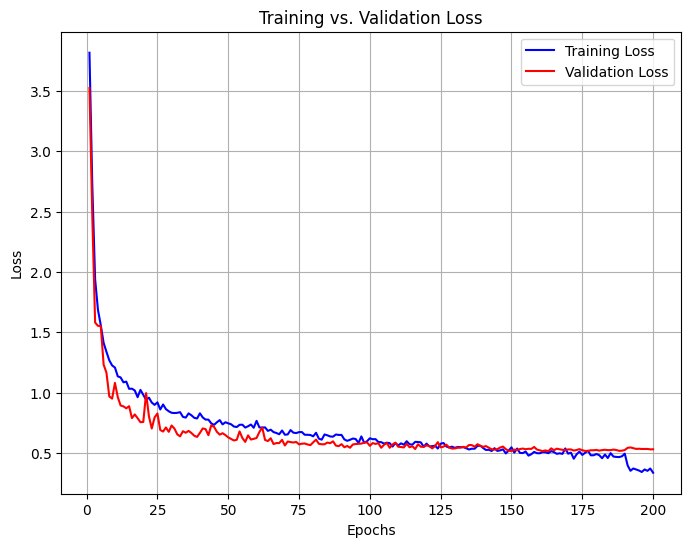

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
results = pd.read_csv('runs/detect/train/results.csv')

# Plot both losses in the same graph
plt.figure(figsize=(8, 6))
plt.plot(results['epoch'], results['train/cls_loss'], label='Training Loss', color='blue')
plt.plot(results['epoch'], results['val/cls_loss'], label='Validation Loss', color='red')

# Add labels, title, and legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


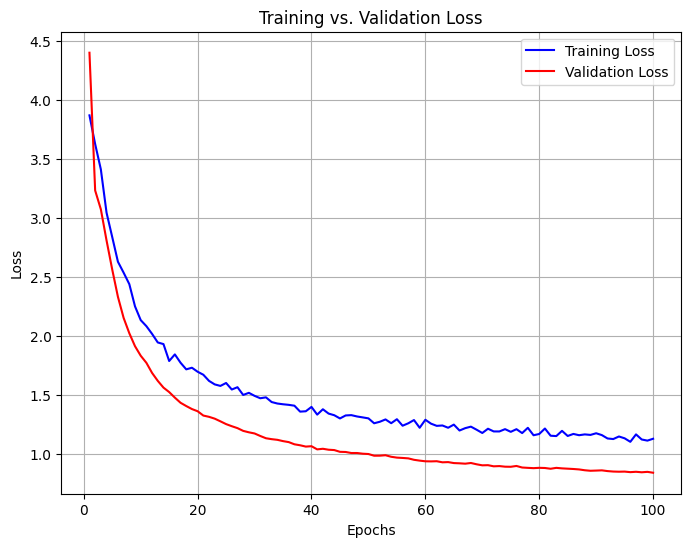

In [29]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
results = pd.read_csv('runs/detect/train2/results.csv')

# Plot both losses in the same graph
plt.figure(figsize=(8, 6))
plt.plot(results['epoch'], results['train/cls_loss'], label='Training Loss', color='blue')
plt.plot(results['epoch'], results['val/cls_loss'], label='Validation Loss', color='red')

# Add labels, title, and legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [43]:
import os

def display_directory_tree(root_dir, indent="", file_limit=10):
    try:
        items = os.listdir(root_dir)
        # Limit the number of files displayed
        display_items = items[:file_limit] + (['...'] if len(items) > file_limit else [])
        
        for item in display_items:
            item_path = os.path.join(root_dir, item)
            print(f"{indent}|-- {item}")
            
            if os.path.isdir(item_path):
                display_directory_tree(item_path, indent + "   ", file_limit)
                
    except PermissionError as e:
        print(f"{indent}|-- [Permission Denied]")

# Specify the root directory
root_directory = "/home/ai/Desktop/kaniska/datasets/augdataset/Datasets"

# Display the directory tree
display_directory_tree(root_directory)


|-- test
   |-- labels
      |-- IMG_1160_jpg.rf.5bd578d0fbdb0a83487ccac153fc51f2.txt
      |-- IMG_20191215_112554_jpg.rf.26185f2d23805b467098449eda1657ca.txt
      |-- IMG_20191215_111622_jpg.rf.1bbf3b0cd1f9411da5c2d3068233b98e.txt
      |-- IMG_20191215_111924_jpg.rf.79036f4b5f9aa3ed62cfbc45bc245668.txt
      |-- IMG_20191215_111517_1_jpg.rf.4a2b67967c71d937faa4cea10f3f4019.txt
      |-- IMG_1126_jpg.rf.282be9ed4cf426cfba6409a10f1d82e1.txt
      |-- IMG_20191215_111416_jpg.rf.3e66edbf0dd50bf485e98a4929e62809.txt
      |-- IMG_1192_jpg.rf.348c6dce1041233bc85120e4f1dd78d6.txt
      |-- IMG_20191215_111341_jpg.rf.485fcac03338c59264bf15879a99b7c0.txt
      |-- IMG_20191215_112515_jpg.rf.d625244f98d2db1e9a81437db38a5545.txt
      |-- ...
   |-- images
      |-- IMG_1116_jpg.rf.aabbeadb9d57890b1c4b7587f96c2b68.jpg
      |-- IMG_20191215_112346_jpg.rf.cd8a17491723992990e6bdd31a41e12d.jpg
      |-- IMG_1219_jpg.rf.246711e98eca34a45e0ace08938e9dc2.jpg
      |-- IMG_20191215_111520_jpg.rf.d99

In [44]:
results = model.train(
    data='datasets/augdataset/Datasets/data.yaml',
    epochs=100,
    batch=8,
    imgsz=640,
    device=0,
    resume=False,
    save_period=50,
    lr0=0.0001,              # Initial learning rate
    optimizer='SGD',        # Choose optimizer: 'SGD', 'Adam', or 'AdamW'
            
    momentum=0.937,         # SGD momentum
    weight_decay=0.0005,    # Weight decay
    
)


Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7940MiB)
engine/trainer: task=detect, mode=train, model=yolov12n.pt, data=datasets/augdataset/Datasets/data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=50, cache=False, device=0, workers=8, project=None, name=train14, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

train: Scanning /home/ai/Desktop/kaniska/datasets/augdataset/Datasets/train/labels... 1689 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1689/1689 [00:00<00:00, 2287.71it/s]

train: New cache created: /home/ai/Desktop/kaniska/datasets/augdataset/Datasets/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /home/ai/Desktop/kaniska/datasets/augdataset/Datasets/valid/labels... 161 images, 0 backgrounds, 0 corrupt: 100%|██████████| 161/161 [00:00<00:00, 1519.72it/s]

val: New cache created: /home/ai/Desktop/kaniska/datasets/augdataset/Datasets/valid/labels.cache


Plotting labels to runs/detect/train14/labels.jpg... 
optimizer: SGD(lr=0.0001, momentum=0.937) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train14
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.21G      1.375      1.575      1.301         40        640: 100%|██████████| 212/212 [00:20<00:00, 10.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.80it/s]

                   all        161       1917      0.763      0.678      0.745      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.64G      1.348      1.533      1.289         12        640: 100%|██████████| 212/212 [00:18<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.32it/s]

                   all        161       1917      0.744      0.681      0.742      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.17G      1.343      1.542      1.295          8        640: 100%|██████████| 212/212 [00:18<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.19it/s]

                   all        161       1917       0.76      0.679      0.741       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.25G      1.314      1.489      1.273         32        640: 100%|██████████| 212/212 [00:18<00:00, 11.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.98it/s]

                   all        161       1917      0.743      0.679      0.739       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.21G      1.314      1.487      1.276         34        640: 100%|██████████| 212/212 [00:18<00:00, 11.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.99it/s]

                   all        161       1917      0.737      0.674       0.74      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.23G      1.267      1.455      1.256         28        640: 100%|██████████| 212/212 [00:17<00:00, 11.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.75it/s]

                   all        161       1917      0.757      0.683      0.748      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.42G      1.265      1.455      1.251         12        640: 100%|██████████| 212/212 [00:18<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.79it/s]

                   all        161       1917       0.73      0.694      0.746      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.51G      1.255      1.431      1.245         30        640: 100%|██████████| 212/212 [00:18<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.18it/s]

                   all        161       1917      0.756      0.666      0.738      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.19G      1.234      1.421       1.24          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.10it/s]

                   all        161       1917       0.76      0.682      0.751      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       2.2G      1.244      1.417      1.239         49        640: 100%|██████████| 212/212 [00:18<00:00, 11.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.63it/s]

                   all        161       1917      0.751      0.688      0.747      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       2.4G       1.23      1.412      1.233          2        640: 100%|██████████| 212/212 [00:18<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.19it/s]

                   all        161       1917      0.749      0.702      0.755      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       2.3G      1.227      1.408      1.238          8        640: 100%|██████████| 212/212 [00:18<00:00, 11.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.94it/s]

                   all        161       1917      0.762      0.691      0.758      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.18G      1.219      1.405      1.227          3        640: 100%|██████████| 212/212 [00:18<00:00, 11.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.94it/s]

                   all        161       1917      0.751      0.698      0.756      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.08G      1.224        1.4      1.229          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.18it/s]

                   all        161       1917       0.76      0.689      0.758      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.08G      1.207      1.369      1.221         16        640: 100%|██████████| 212/212 [00:18<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.65it/s]

                   all        161       1917      0.753      0.701       0.76      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.22G      1.187      1.338      1.209         16        640: 100%|██████████| 212/212 [00:18<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.23it/s]

                   all        161       1917      0.762      0.701      0.762      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.27G      1.193      1.344      1.211         14        640: 100%|██████████| 212/212 [00:18<00:00, 11.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.33it/s]

                   all        161       1917      0.766      0.699      0.766      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.25G      1.184      1.351      1.214          9        640: 100%|██████████| 212/212 [00:18<00:00, 11.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.80it/s]

                   all        161       1917      0.778      0.691      0.771      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       2.2G      1.201      1.359      1.213          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.09it/s]

                   all        161       1917      0.747      0.708      0.765      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.36G      1.177      1.335        1.2         38        640: 100%|██████████| 212/212 [00:18<00:00, 11.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.40it/s]

                   all        161       1917      0.788      0.694      0.773      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.33G      1.184      1.361       1.21         31        640: 100%|██████████| 212/212 [00:18<00:00, 11.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.99it/s]


                   all        161       1917      0.762      0.705      0.773      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.54G      1.171      1.323      1.208         16        640: 100%|██████████| 212/212 [00:18<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.15it/s]

                   all        161       1917      0.782      0.701      0.775      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.01G      1.186      1.332      1.204          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.15it/s]


                   all        161       1917      0.757       0.72      0.778      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.19G      1.158      1.294      1.189         11        640: 100%|██████████| 212/212 [00:17<00:00, 11.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.14it/s]

                   all        161       1917      0.776      0.714      0.778      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.04G      1.159      1.324      1.199         13        640: 100%|██████████| 212/212 [00:18<00:00, 11.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.61it/s]

                   all        161       1917      0.765      0.719      0.776      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.09G      1.165       1.33      1.193          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.17it/s]

                   all        161       1917       0.75      0.723      0.776      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.11G      1.153      1.289      1.186          9        640: 100%|██████████| 212/212 [00:17<00:00, 11.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.80it/s]

                   all        161       1917      0.774      0.715      0.781      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.31G      1.179      1.358      1.201         17        640: 100%|██████████| 212/212 [00:18<00:00, 11.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.64it/s]


                   all        161       1917      0.766      0.724      0.783      0.617

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.12G      1.159      1.312      1.192         19        640: 100%|██████████| 212/212 [00:17<00:00, 11.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.97it/s]

                   all        161       1917      0.743      0.738       0.78      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.27G       1.15      1.307      1.189          9        640: 100%|██████████| 212/212 [00:18<00:00, 11.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.25it/s]

                   all        161       1917      0.778        0.7      0.778      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.25G      1.151      1.292      1.185         28        640: 100%|██████████| 212/212 [00:18<00:00, 11.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.16it/s]

                   all        161       1917      0.791      0.712      0.787      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.99G      1.134      1.292      1.182         23        640: 100%|██████████| 212/212 [00:18<00:00, 11.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.87it/s]


                   all        161       1917      0.785      0.704      0.783      0.617

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.24G      1.146      1.294      1.178         16        640: 100%|██████████| 212/212 [00:17<00:00, 11.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.13it/s]

                   all        161       1917      0.771      0.722      0.784       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.26G      1.141      1.302      1.188          4        640: 100%|██████████| 212/212 [00:17<00:00, 11.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.19it/s]

                   all        161       1917      0.773      0.711      0.783       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.21G      1.152      1.432      1.189          1        640: 100%|██████████| 212/212 [00:17<00:00, 11.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.90it/s]

                   all        161       1917      0.768      0.721      0.787      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.03G      1.122      1.268      1.175         34        640: 100%|██████████| 212/212 [00:18<00:00, 11.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.37it/s]

                   all        161       1917      0.784      0.708      0.786      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.46G       1.14      1.296      1.186         29        640: 100%|██████████| 212/212 [00:18<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.97it/s]


                   all        161       1917      0.786      0.705      0.785      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.35G      1.132      1.275       1.18          5        640: 100%|██████████| 212/212 [00:18<00:00, 11.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.99it/s]

                   all        161       1917      0.802      0.699      0.784      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.28G      1.139      1.304      1.181          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.00it/s]

                   all        161       1917      0.797       0.71       0.79      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.41G      1.106      1.231      1.162         12        640: 100%|██████████| 212/212 [00:18<00:00, 11.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.76it/s]


                   all        161       1917       0.77      0.714      0.786      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.14G      1.128      1.278      1.176         34        640: 100%|██████████| 212/212 [00:18<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.98it/s]

                   all        161       1917      0.793      0.714      0.793      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.16G      1.127      1.275       1.18         43        640: 100%|██████████| 212/212 [00:18<00:00, 11.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.02it/s]

                   all        161       1917      0.804      0.699      0.787      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100       2.4G      1.126      1.276      1.176          5        640: 100%|██████████| 212/212 [00:18<00:00, 11.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.18it/s]

                   all        161       1917      0.789      0.716      0.789      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.47G      1.112      1.262      1.163         21        640: 100%|██████████| 212/212 [00:18<00:00, 11.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.91it/s]

                   all        161       1917      0.789       0.71      0.787      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.19G      1.123       1.26      1.165         25        640: 100%|██████████| 212/212 [00:18<00:00, 11.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.16it/s]

                   all        161       1917      0.788      0.715      0.794      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.14G      1.114      1.246      1.169         15        640: 100%|██████████| 212/212 [00:18<00:00, 11.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.95it/s]


                   all        161       1917      0.787      0.707      0.792      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       2.3G      1.116      1.259      1.166         27        640: 100%|██████████| 212/212 [00:18<00:00, 11.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.94it/s]

                   all        161       1917        0.8      0.718      0.795      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.42G       1.15      1.288      1.177         33        640: 100%|██████████| 212/212 [00:18<00:00, 11.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.07it/s]

                   all        161       1917      0.794       0.72      0.795      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.35G      1.119      1.254      1.164         11        640: 100%|██████████| 212/212 [00:18<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.91it/s]

                   all        161       1917      0.797      0.722      0.797      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.44G      1.107      1.245      1.166         11        640: 100%|██████████| 212/212 [00:18<00:00, 11.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.85it/s]

                   all        161       1917      0.788      0.722      0.797      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.43G      1.097       1.23      1.161         10        640: 100%|██████████| 212/212 [00:18<00:00, 11.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.11it/s]

                   all        161       1917      0.807      0.714      0.798      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.21G      1.089      1.216      1.153         10        640: 100%|██████████| 212/212 [00:18<00:00, 11.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.54it/s]

                   all        161       1917      0.791      0.717      0.798      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.35G      1.098      1.245      1.162          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.08it/s]

                   all        161       1917      0.764       0.73      0.796      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.23G      1.117      1.245      1.162         11        640: 100%|██████████| 212/212 [00:18<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.61it/s]

                   all        161       1917      0.787       0.72      0.797      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.45G      1.114      1.255      1.166          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.94it/s]


                   all        161       1917      0.789      0.708      0.796      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.26G      1.096      1.238      1.157          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.96it/s]

                   all        161       1917      0.772      0.728      0.795      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.27G      1.099      1.233      1.159         11        640: 100%|██████████| 212/212 [00:18<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.19it/s]

                   all        161       1917      0.764      0.731      0.798      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.04G      1.103      1.228      1.161         41        640: 100%|██████████| 212/212 [00:18<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.88it/s]

                   all        161       1917      0.782      0.726      0.798      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.16G      1.087      1.196      1.144         67        640: 100%|██████████| 212/212 [00:18<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.01it/s]

                   all        161       1917      0.784      0.734      0.801      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.45G      1.098      1.211      1.151         39        640: 100%|██████████| 212/212 [00:18<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.77it/s]

                   all        161       1917      0.791      0.725      0.802      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.25G       1.09      1.217      1.149         37        640: 100%|██████████| 212/212 [00:18<00:00, 11.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.03it/s]

                   all        161       1917      0.788      0.726      0.802      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.34G      1.101      1.219      1.154         11        640: 100%|██████████| 212/212 [00:18<00:00, 11.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.67it/s]

                   all        161       1917      0.797      0.718      0.799      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100         2G      1.075      1.207      1.142         18        640: 100%|██████████| 212/212 [00:18<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.88it/s]


                   all        161       1917      0.795      0.724      0.801      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.09G      1.093      1.244      1.157          3        640: 100%|██████████| 212/212 [00:18<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.13it/s]

                   all        161       1917      0.777      0.727      0.796       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.14G      1.089      1.221      1.153         34        640: 100%|██████████| 212/212 [00:18<00:00, 11.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.89it/s]

                   all        161       1917      0.808      0.711      0.802      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.15G      1.081      1.212      1.148         14        640: 100%|██████████| 212/212 [00:18<00:00, 11.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.16it/s]

                   all        161       1917      0.789      0.726      0.797      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.26G      1.097      1.236      1.151          3        640: 100%|██████████| 212/212 [00:18<00:00, 11.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.06it/s]

                   all        161       1917      0.776      0.737        0.8      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.32G      1.077      1.207      1.142          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.81it/s]


                   all        161       1917      0.788      0.732      0.804      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.12G      1.099      1.235      1.155         13        640: 100%|██████████| 212/212 [00:18<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.16it/s]

                   all        161       1917      0.773      0.739      0.806      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.23G      1.095      1.217      1.158          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.25it/s]

                   all        161       1917      0.789      0.733      0.806      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.29G      1.077      1.211      1.143         12        640: 100%|██████████| 212/212 [00:18<00:00, 11.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.23it/s]

                   all        161       1917      0.795      0.725      0.805      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.19G      1.081      1.208      1.146         25        640: 100%|██████████| 212/212 [00:18<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.08it/s]

                   all        161       1917      0.772      0.746      0.806      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.44G      1.086      1.218      1.152         43        640: 100%|██████████| 212/212 [00:18<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.68it/s]

                   all        161       1917      0.771      0.738      0.802      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.89G      1.076      1.207      1.144          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.11it/s]

                   all        161       1917      0.775      0.729      0.803      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.22G      1.088      1.206      1.154         39        640: 100%|██████████| 212/212 [00:18<00:00, 11.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.93it/s]


                   all        161       1917      0.802      0.717      0.806       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.48G      1.092      1.207       1.15         50        640: 100%|██████████| 212/212 [00:18<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.07it/s]

                   all        161       1917      0.781      0.731      0.805      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.38G       1.08      1.224       1.15         13        640: 100%|██████████| 212/212 [00:18<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.12it/s]

                   all        161       1917      0.791      0.725      0.801      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.01G      1.086      1.214      1.146          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.96it/s]

                   all        161       1917      0.789      0.725      0.804      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.06G      1.079      1.198      1.152         24        640: 100%|██████████| 212/212 [00:18<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.23it/s]

                   all        161       1917      0.789      0.726      0.804      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.13G      1.098      1.209      1.148         16        640: 100%|██████████| 212/212 [00:18<00:00, 11.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.65it/s]

                   all        161       1917      0.786       0.73      0.805      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.56G      1.072      1.184      1.139          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.19it/s]

                   all        161       1917      0.783      0.732      0.806      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.19G      1.086      1.236      1.148          2        640: 100%|██████████| 212/212 [00:18<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.04it/s]

                   all        161       1917      0.778      0.738      0.805      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.41G      1.083      1.223      1.149          3        640: 100%|██████████| 212/212 [00:18<00:00, 11.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.74it/s]


                   all        161       1917      0.788      0.736      0.808      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.38G      1.081      1.192      1.143          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.04it/s]

                   all        161       1917      0.798      0.723      0.807      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.22G      1.092      1.204      1.148          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.02it/s]

                   all        161       1917      0.765      0.742      0.807      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.28G      1.076      1.194      1.145         30        640: 100%|██████████| 212/212 [00:18<00:00, 11.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.17it/s]

                   all        161       1917      0.797       0.72      0.808      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.26G        1.1      1.204       1.15          5        640: 100%|██████████| 212/212 [00:18<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.83it/s]


                   all        161       1917      0.771      0.742      0.808      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.41G      1.067      1.187      1.139         15        640: 100%|██████████| 212/212 [00:18<00:00, 11.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.96it/s]

                   all        161       1917      0.787      0.729      0.806      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.24G      1.079      1.202      1.153         10        640: 100%|██████████| 212/212 [00:18<00:00, 11.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.01it/s]

                   all        161       1917      0.805      0.713      0.808       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.24G      1.101      1.213      1.151          8        640: 100%|██████████| 212/212 [00:18<00:00, 11.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.80it/s]

                   all        161       1917      0.797      0.718      0.808       0.65


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      1.99G     0.9443      1.154      1.074          5        640: 100%|██████████| 212/212 [00:18<00:00, 11.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.98it/s]


                   all        161       1917      0.775      0.714      0.788      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.26G     0.9457      1.109       1.07         19        640: 100%|██████████| 212/212 [00:17<00:00, 11.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.44it/s]


                   all        161       1917      0.777       0.71      0.784      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.07G     0.9528      1.114      1.081          6        640: 100%|██████████| 212/212 [00:17<00:00, 11.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.42it/s]


                   all        161       1917      0.767       0.72      0.782      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.19G     0.9451      1.091      1.073         30        640: 100%|██████████| 212/212 [00:17<00:00, 12.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.24it/s]


                   all        161       1917      0.765      0.727      0.785      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.18G      0.941      1.109      1.073          6        640: 100%|██████████| 212/212 [00:17<00:00, 11.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.57it/s]


                   all        161       1917       0.79       0.71      0.787      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.98G     0.9409      1.094      1.074         10        640: 100%|██████████| 212/212 [00:17<00:00, 11.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.58it/s]


                   all        161       1917      0.784      0.708      0.787      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.04G     0.9405      1.079      1.067          5        640: 100%|██████████| 212/212 [00:17<00:00, 11.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.22it/s]

                   all        161       1917      0.792      0.714      0.788      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.21G     0.9363      1.095       1.07         33        640: 100%|██████████| 212/212 [00:17<00:00, 11.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.57it/s]


                   all        161       1917      0.769      0.724      0.788      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.03G     0.9332      1.059      1.069          6        640: 100%|██████████| 212/212 [00:17<00:00, 12.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.45it/s]


                   all        161       1917      0.775      0.728      0.788      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.09G     0.9426      1.092      1.072          8        640: 100%|██████████| 212/212 [00:17<00:00, 11.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.71it/s]

                   all        161       1917      0.773      0.724      0.788      0.632



100 epochs completed in 0.540 hours.
Optimizer stripped from runs/detect/train14/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train14/weights/best.pt, 5.5MB

Validating runs/detect/train14/weights/best.pt...
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7940MiB)
YOLOv12n summary (fused): 159 layers, 2,527,946 parameters, 0 gradients, 5.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.76it/s]


                   all        161       1917      0.773      0.741      0.808      0.652
                     0         49         98       0.75      0.745      0.831      0.687
                     1         62        140      0.634        0.7      0.713      0.582
                     2         85        438      0.851      0.776      0.858      0.683
                     3         56        228      0.809      0.768      0.837      0.698
                     4         59        222      0.738      0.735      0.795      0.656
                     5         61        791       0.86       0.72      0.812      0.604
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs/detect/train14


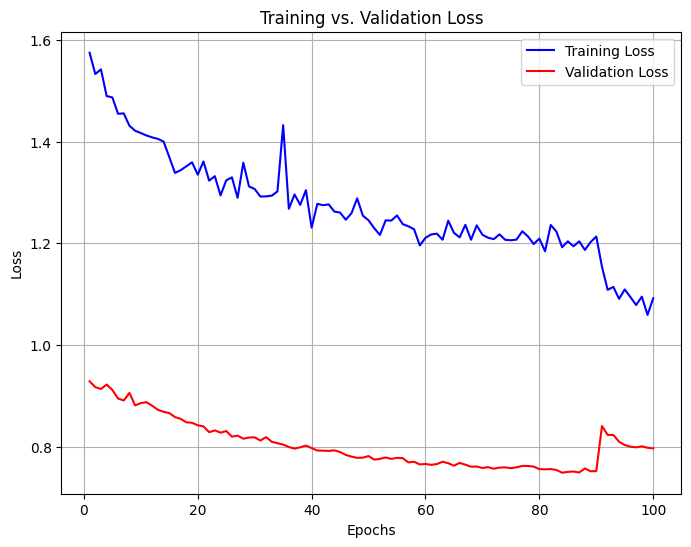

In [45]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
results = pd.read_csv('runs/detect/train14/results.csv')

# Plot both losses in the same graph
plt.figure(figsize=(8, 6))
plt.plot(results['epoch'], results['train/cls_loss'], label='Training Loss', color='blue')
plt.plot(results['epoch'], results['val/cls_loss'], label='Validation Loss', color='red')

# Add labels, title, and legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [46]:
results = model.train(
    data='datasets/augdataset/Datasets/data.yaml',
    epochs=200,
    batch=8,
    imgsz=640,
    device=0,
    resume=False,
    save_period=50,
    lr0=0.0001,              # Initial learning rate
    optimizer='SGD',        # Choose optimizer: 'SGD', 'Adam', or 'AdamW'
            
    momentum=0.937,         # SGD momentum
    weight_decay=0.0005,    # Weight decay
    
)


Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7940MiB)
engine/trainer: task=detect, mode=train, model=yolov12n.pt, data=datasets/augdataset/Datasets/data.yaml, epochs=200, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=50, cache=False, device=0, workers=8, project=None, name=train142, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

train: Scanning /home/ai/Desktop/kaniska/datasets/augdataset/Datasets/train/labels.cache... 1689 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1689/1689 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /home/ai/Desktop/kaniska/datasets/augdataset/Datasets/valid/labels.cache... 161 images, 0 backgrounds, 0 corrupt: 100%|██████████| 161/161 [00:00<?, ?it/s]


Plotting labels to runs/detect/train142/labels.jpg... 
optimizer: SGD(lr=0.0001, momentum=0.937) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train142
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      2.17G      1.089      1.216      1.147         40        640: 100%|██████████| 212/212 [00:19<00:00, 10.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.00it/s]

                   all        161       1917      0.784      0.724      0.805      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200       2.6G      1.079      1.204      1.143         12        640: 100%|██████████| 212/212 [00:18<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.94it/s]

                   all        161       1917      0.801      0.724      0.809      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      2.12G      1.088      1.217      1.154          8        640: 100%|██████████| 212/212 [00:18<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.06it/s]

                   all        161       1917      0.792       0.74      0.808       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      2.24G      1.081      1.192      1.142         32        640: 100%|██████████| 212/212 [00:18<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.43it/s]

                   all        161       1917      0.782      0.739      0.804      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200       2.2G      1.093        1.2      1.149         34        640: 100%|██████████| 212/212 [00:18<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.97it/s]

                   all        161       1917      0.805      0.725      0.807      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      2.23G      1.065      1.185       1.14         28        640: 100%|██████████| 212/212 [00:18<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.59it/s]

                   all        161       1917      0.801      0.733      0.811       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      2.42G      1.075      1.194      1.138         12        640: 100%|██████████| 212/212 [00:18<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.65it/s]

                   all        161       1917      0.795      0.724      0.809      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      2.51G      1.065      1.181      1.135         30        640: 100%|██████████| 212/212 [00:18<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.88it/s]

                   all        161       1917      0.801      0.713      0.804      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      2.19G      1.055      1.173      1.133          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.85it/s]

                   all        161       1917      0.823      0.719      0.814      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200       2.2G      1.069       1.18      1.138         49        640: 100%|██████████| 212/212 [00:18<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.78it/s]


                   all        161       1917      0.781       0.75      0.809      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200       2.4G      1.063      1.175      1.134          2        640: 100%|██████████| 212/212 [00:18<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.93it/s]

                   all        161       1917      0.779       0.75      0.814      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      2.31G       1.06      1.179      1.138          8        640: 100%|██████████| 212/212 [00:18<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.77it/s]

                   all        161       1917      0.805      0.729      0.817      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      2.19G      1.061      1.188      1.132          3        640: 100%|██████████| 212/212 [00:18<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.87it/s]

                   all        161       1917      0.793      0.734      0.813      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      2.08G      1.068      1.184      1.136          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.87it/s]

                   all        161       1917      0.799      0.735      0.815      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      2.08G      1.062      1.161      1.132         16        640: 100%|██████████| 212/212 [00:18<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.89it/s]

                   all        161       1917      0.788      0.747      0.814      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      2.23G      1.044      1.139      1.122         16        640: 100%|██████████| 212/212 [00:18<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.98it/s]

                   all        161       1917       0.81      0.724      0.813      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      2.27G      1.054      1.149      1.129         14        640: 100%|██████████| 212/212 [00:18<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.30it/s]

                   all        161       1917      0.801      0.738      0.819      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      2.25G      1.048      1.153      1.132          9        640: 100%|██████████| 212/212 [00:18<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.46it/s]

                   all        161       1917       0.81      0.737      0.819      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200       2.2G      1.064      1.161      1.132          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.09it/s]

                   all        161       1917      0.775      0.759      0.818      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      2.36G      1.047      1.146      1.123         38        640: 100%|██████████| 212/212 [00:18<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.04it/s]

                   all        161       1917       0.79      0.741      0.813      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      2.33G      1.054      1.172      1.132         31        640: 100%|██████████| 212/212 [00:19<00:00, 11.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.70it/s]


                   all        161       1917       0.79      0.744      0.819      0.664

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      2.55G      1.043      1.138      1.131         16        640: 100%|██████████| 212/212 [00:18<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.13it/s]

                   all        161       1917      0.801      0.739       0.82      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      2.01G      1.064      1.155      1.131          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.13it/s]

                   all        161       1917      0.798      0.747      0.817      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200       2.2G      1.038       1.12      1.118         11        640: 100%|██████████| 212/212 [00:18<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.81it/s]

                   all        161       1917      0.802      0.751      0.822      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      2.04G      1.042      1.149      1.127         13        640: 100%|██████████| 212/212 [00:19<00:00, 10.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.81it/s]

                   all        161       1917      0.794      0.743      0.819      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200       2.1G      1.047      1.158      1.123          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.70it/s]

                   all        161       1917      0.799      0.742      0.821      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      2.11G      1.037      1.122      1.118          9        640: 100%|██████████| 212/212 [00:18<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.49it/s]


                   all        161       1917      0.781       0.75      0.819      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      2.32G      1.063      1.185      1.131         17        640: 100%|██████████| 212/212 [00:18<00:00, 11.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.90it/s]

                   all        161       1917      0.784      0.757       0.82      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      2.13G      1.046       1.14      1.124         19        640: 100%|██████████| 212/212 [00:18<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.88it/s]

                   all        161       1917      0.784      0.753      0.819      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      2.28G      1.036      1.145      1.122          9        640: 100%|██████████| 212/212 [00:18<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.62it/s]

                   all        161       1917      0.778      0.749      0.816      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      2.25G      1.046      1.133      1.121         28        640: 100%|██████████| 212/212 [00:18<00:00, 11.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.79it/s]

                   all        161       1917      0.802      0.751      0.824      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      1.99G       1.03      1.133      1.118         23        640: 100%|██████████| 212/212 [00:18<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.65it/s]

                   all        161       1917      0.804      0.742      0.821      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      2.24G       1.04      1.134      1.114         16        640: 100%|██████████| 212/212 [00:18<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.96it/s]

                   all        161       1917      0.791      0.756      0.822      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      2.27G      1.035      1.147      1.124          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.80it/s]

                   all        161       1917      0.772      0.766      0.819      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      2.22G      1.044      1.281      1.119          1        640: 100%|██████████| 212/212 [00:18<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.83it/s]

                   all        161       1917      0.799      0.744      0.824      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      2.04G      1.025      1.121      1.115         34        640: 100%|██████████| 212/212 [00:18<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.65it/s]

                   all        161       1917      0.781      0.761      0.822      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      2.46G      1.042       1.14      1.125         29        640: 100%|██████████| 212/212 [00:18<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.92it/s]

                   all        161       1917      0.789      0.753       0.82      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      2.35G      1.031      1.124      1.119          5        640: 100%|██████████| 212/212 [00:18<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.83it/s]

                   all        161       1917      0.779       0.76       0.82      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      2.28G      1.039      1.151       1.12          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.32it/s]

                   all        161       1917      0.794      0.755      0.824      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      2.41G      1.009      1.082      1.104         12        640: 100%|██████████| 212/212 [00:18<00:00, 11.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.57it/s]


                   all        161       1917       0.79      0.764      0.825      0.671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      2.14G      1.031      1.126      1.117         34        640: 100%|██████████| 212/212 [00:18<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.41it/s]


                   all        161       1917      0.787      0.757      0.826      0.672

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      2.16G       1.03      1.125      1.121         43        640: 100%|██████████| 212/212 [00:18<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.70it/s]


                   all        161       1917      0.799      0.742      0.818      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200       2.4G      1.029      1.127      1.117          5        640: 100%|██████████| 212/212 [00:18<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.17it/s]


                   all        161       1917      0.796      0.759      0.824      0.671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      2.47G      1.017      1.113      1.106         21        640: 100%|██████████| 212/212 [00:18<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.49it/s]


                   all        161       1917      0.794      0.756      0.824      0.671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      2.19G      1.032      1.117       1.11         25        640: 100%|██████████| 212/212 [00:18<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.71it/s]

                   all        161       1917      0.788       0.76      0.821       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      2.14G      1.021      1.106      1.112         15        640: 100%|██████████| 212/212 [00:18<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.37it/s]


                   all        161       1917      0.795      0.754      0.829      0.677

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200       2.3G      1.023      1.115       1.11         27        640: 100%|██████████| 212/212 [00:18<00:00, 11.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.30it/s]


                   all        161       1917      0.806      0.755      0.827      0.674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      2.42G      1.056      1.146      1.121         33        640: 100%|██████████| 212/212 [00:18<00:00, 11.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.49it/s]


                   all        161       1917      0.802      0.763      0.829      0.675

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      2.35G      1.033      1.112      1.111         11        640: 100%|██████████| 212/212 [00:19<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.52it/s]

                   all        161       1917      0.802       0.76      0.831      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      2.45G      1.016      1.108       1.11         11        640: 100%|██████████| 212/212 [00:18<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.28it/s]


                   all        161       1917      0.794      0.764      0.827      0.673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      2.43G      1.005      1.094      1.107         10        640: 100%|██████████| 212/212 [00:18<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.37it/s]

                   all        161       1917        0.8      0.765      0.832      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      2.21G          1      1.082        1.1         10        640: 100%|██████████| 212/212 [00:18<00:00, 11.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.71it/s]

                   all        161       1917      0.797      0.757      0.828      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      2.35G      1.009      1.108      1.107          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.57it/s]


                   all        161       1917      0.774      0.781      0.822      0.671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      2.23G      1.027      1.109      1.108         11        640: 100%|██████████| 212/212 [00:18<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.69it/s]


                   all        161       1917      0.806      0.752      0.829      0.675

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      2.45G      1.025      1.114      1.111          6        640: 100%|██████████| 212/212 [00:19<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.50it/s]


                   all        161       1917      0.788      0.761      0.826      0.672

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      2.26G       1.01        1.1      1.105          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.69it/s]


                   all        161       1917      0.796      0.769      0.831      0.678

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      2.27G      1.015      1.096      1.107         11        640: 100%|██████████| 212/212 [00:18<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.01it/s]

                   all        161       1917      0.805      0.759      0.831      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      2.04G      1.014      1.092      1.107         41        640: 100%|██████████| 212/212 [00:19<00:00, 10.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.08it/s]

                   all        161       1917      0.804       0.75      0.828      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      2.16G      1.005      1.065      1.093         67        640: 100%|██████████| 212/212 [00:18<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.22it/s]

                   all        161       1917      0.803      0.755      0.832      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      2.45G      1.015      1.082      1.101         39        640: 100%|██████████| 212/212 [00:18<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.83it/s]


                   all        161       1917      0.799       0.77      0.833      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      2.25G      1.006      1.084      1.099         37        640: 100%|██████████| 212/212 [00:18<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.90it/s]

                   all        161       1917      0.778      0.776       0.83      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      2.34G      1.018      1.088      1.103         11        640: 100%|██████████| 212/212 [00:18<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.77it/s]

                   all        161       1917      0.794      0.766      0.833      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      1.96G      0.993      1.077      1.092         18        640: 100%|██████████| 212/212 [00:18<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.87it/s]


                   all        161       1917      0.781       0.78      0.833      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      2.09G      1.008      1.104      1.105          3        640: 100%|██████████| 212/212 [00:18<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.37it/s]

                   all        161       1917      0.793      0.766      0.831      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      2.14G      1.006      1.092      1.104         34        640: 100%|██████████| 212/212 [00:18<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.95it/s]

                   all        161       1917      0.807       0.76      0.835      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      2.15G     0.9992      1.081      1.098         14        640: 100%|██████████| 212/212 [00:18<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.16it/s]

                   all        161       1917      0.811      0.747      0.828      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      2.26G      1.012      1.106      1.101          3        640: 100%|██████████| 212/212 [00:19<00:00, 11.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.94it/s]

                   all        161       1917      0.826      0.739      0.832      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      2.32G      0.998      1.077      1.093          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.14it/s]

                   all        161       1917      0.818      0.739      0.829      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      2.12G      1.016      1.101      1.105         13        640: 100%|██████████| 212/212 [00:18<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.17it/s]

                   all        161       1917      0.809      0.756      0.833      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      2.23G      1.011      1.084      1.107          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.98it/s]

                   all        161       1917      0.795      0.773      0.837      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      2.29G     0.9924      1.078      1.092         12        640: 100%|██████████| 212/212 [00:18<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.21it/s]

                   all        161       1917      0.788       0.77      0.829      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      2.19G     0.9988      1.078      1.096         25        640: 100%|██████████| 212/212 [00:18<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.91it/s]

                   all        161       1917      0.791      0.775      0.837      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      2.44G      1.006       1.09      1.102         43        640: 100%|██████████| 212/212 [00:18<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.22it/s]

                   all        161       1917      0.779      0.778      0.832       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      1.89G     0.9952      1.074      1.094          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.10it/s]

                   all        161       1917      0.798      0.773      0.836      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      2.22G      1.008      1.077      1.105         39        640: 100%|██████████| 212/212 [00:18<00:00, 11.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.36it/s]

                   all        161       1917      0.802      0.771      0.835      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      2.47G      1.008      1.076      1.099         50        640: 100%|██████████| 212/212 [00:18<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.24it/s]


                   all        161       1917      0.793      0.772      0.833      0.681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      2.38G     0.9986       1.09        1.1         13        640: 100%|██████████| 212/212 [00:18<00:00, 11.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.86it/s]

                   all        161       1917      0.816      0.749      0.833      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      2.01G      1.003      1.079      1.096          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.71it/s]

                   all        161       1917       0.79      0.774      0.833      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      2.06G     0.9955      1.068        1.1         24        640: 100%|██████████| 212/212 [00:18<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.11it/s]

                   all        161       1917      0.806      0.768      0.838      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      2.13G      1.018      1.081      1.099         16        640: 100%|██████████| 212/212 [00:19<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.11it/s]

                   all        161       1917      0.798      0.774      0.835      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      2.56G     0.9906      1.053       1.09          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.27it/s]

                   all        161       1917      0.794      0.769      0.834      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      2.19G      1.004      1.097      1.098          2        640: 100%|██████████| 212/212 [00:18<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.05it/s]

                   all        161       1917        0.8      0.772       0.84      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      2.41G      1.001       1.09      1.099          3        640: 100%|██████████| 212/212 [00:18<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.64it/s]


                   all        161       1917      0.802      0.777      0.839      0.685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      2.38G     0.9984       1.06      1.093          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.11it/s]

                   all        161       1917      0.802      0.772      0.839      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      2.23G       1.01      1.073      1.096          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.24it/s]

                   all        161       1917      0.811      0.767       0.84      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      2.28G     0.9914      1.059      1.093         30        640: 100%|██████████| 212/212 [00:18<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.05it/s]

                   all        161       1917      0.805       0.77      0.839      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      2.26G      1.016      1.072      1.099          5        640: 100%|██████████| 212/212 [00:18<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.23it/s]

                   all        161       1917      0.794      0.789      0.841      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      2.41G     0.9849      1.055      1.089         15        640: 100%|██████████| 212/212 [00:18<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.08it/s]

                   all        161       1917      0.787      0.783      0.837      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      2.24G     0.9946      1.071      1.101         10        640: 100%|██████████| 212/212 [00:18<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.11it/s]

                   all        161       1917      0.791      0.783      0.838      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      2.24G      1.017      1.081        1.1          8        640: 100%|██████████| 212/212 [00:18<00:00, 11.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.16it/s]

                   all        161       1917      0.775      0.789       0.84      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      2.14G     0.9996      1.079      1.098         13        640: 100%|██████████| 212/212 [00:18<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.96it/s]

                   all        161       1917      0.805      0.757      0.837      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      2.32G     0.9991      1.058      1.095          3        640: 100%|██████████| 212/212 [00:19<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.07it/s]

                   all        161       1917      0.798      0.783      0.839      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      2.04G      1.007      1.067      1.097         15        640: 100%|██████████| 212/212 [00:18<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.14it/s]

                   all        161       1917      0.782      0.791       0.84      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      2.33G     0.9833      1.041      1.085         27        640: 100%|██████████| 212/212 [00:19<00:00, 11.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.24it/s]

                   all        161       1917       0.79      0.792      0.839      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      2.23G     0.9806      1.059      1.086         48        640: 100%|██████████| 212/212 [00:18<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.02it/s]

                   all        161       1917      0.783      0.796      0.838      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      2.25G     0.9797      1.061      1.087         15        640: 100%|██████████| 212/212 [00:18<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.76it/s]

                   all        161       1917      0.802      0.773      0.841      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      2.44G     0.9972      1.059      1.092         10        640: 100%|██████████| 212/212 [00:18<00:00, 11.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.06it/s]


                   all        161       1917      0.803      0.781      0.842      0.688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      2.26G     0.9874       1.05       1.09         18        640: 100%|██████████| 212/212 [00:18<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.19it/s]

                   all        161       1917      0.808      0.777       0.84      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      2.68G     0.9977      1.071      1.096         39        640: 100%|██████████| 212/212 [00:18<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.16it/s]

                   all        161       1917       0.78      0.794      0.842      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      2.15G      1.008      1.085      1.102         12        640: 100%|██████████| 212/212 [00:18<00:00, 11.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.28it/s]

                   all        161       1917      0.801      0.775      0.842      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      2.21G     0.9965      1.068      1.097         12        640: 100%|██████████| 212/212 [00:18<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.00it/s]


                   all        161       1917      0.809      0.769      0.843       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      2.27G     0.9914      1.057      1.092          6        640: 100%|██████████| 212/212 [00:19<00:00, 11.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.22it/s]

                   all        161       1917      0.809      0.769      0.842       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      2.13G     0.9707      1.027      1.081          8        640: 100%|██████████| 212/212 [00:18<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.20it/s]

                   all        161       1917      0.806      0.781      0.843      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      2.27G     0.9884      1.043       1.09          9        640: 100%|██████████| 212/212 [00:18<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.17it/s]

                   all        161       1917      0.804       0.78      0.842      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      2.47G     0.9885      1.048      1.089         37        640: 100%|██████████| 212/212 [00:18<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.05it/s]

                   all        161       1917      0.802       0.78       0.84      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      2.15G     0.9964       1.06      1.094          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.15it/s]

                   all        161       1917        0.8       0.78      0.841      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      2.11G     0.9814      1.045      1.087         10        640: 100%|██████████| 212/212 [00:18<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.13it/s]

                   all        161       1917      0.801      0.783      0.842      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      2.26G     0.9786      1.033      1.084         38        640: 100%|██████████| 212/212 [00:18<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.12it/s]

                   all        161       1917      0.799      0.778      0.841      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200       2.1G      1.007      1.091      1.103          3        640: 100%|██████████| 212/212 [00:18<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.13it/s]

                   all        161       1917      0.808      0.769      0.842      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      2.09G     0.9924      1.062      1.095         14        640: 100%|██████████| 212/212 [00:18<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.91it/s]

                   all        161       1917      0.804      0.776      0.841       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      2.01G     0.9951      1.067      1.098         35        640: 100%|██████████| 212/212 [00:18<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.18it/s]

                   all        161       1917      0.795      0.794      0.843      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      2.39G     0.9793      1.059      1.083         34        640: 100%|██████████| 212/212 [00:18<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.11it/s]

                   all        161       1917      0.802      0.774      0.836      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      2.25G     0.9899      1.056      1.088          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.96it/s]

                   all        161       1917      0.802      0.778       0.84       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200       2.3G     0.9818      1.044      1.082         28        640: 100%|██████████| 212/212 [00:18<00:00, 11.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.18it/s]

                   all        161       1917      0.796      0.785      0.838      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      2.47G     0.9899      1.042      1.088         34        640: 100%|██████████| 212/212 [00:18<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.07it/s]

                   all        161       1917      0.803      0.782      0.844      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      2.38G     0.9847      1.044      1.086         43        640: 100%|██████████| 212/212 [00:18<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.11it/s]

                   all        161       1917      0.796      0.783      0.842      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      2.03G     0.9917      1.045      1.086          9        640: 100%|██████████| 212/212 [00:18<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.93it/s]

                   all        161       1917      0.794      0.786       0.84       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      2.05G     0.9876      1.042      1.088          4        640: 100%|██████████| 212/212 [00:19<00:00, 10.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.30it/s]

                   all        161       1917      0.796      0.782      0.844      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      2.49G     0.9803      1.039      1.084          9        640: 100%|██████████| 212/212 [00:19<00:00, 11.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.34it/s]

                   all        161       1917      0.794      0.793      0.841      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      2.68G     0.9996      1.066      1.089         31        640: 100%|██████████| 212/212 [00:18<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.05it/s]

                   all        161       1917      0.798      0.783      0.844      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      2.39G     0.9792      1.039      1.086         16        640: 100%|██████████| 212/212 [00:18<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.58it/s]

                   all        161       1917        0.8      0.784      0.845      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      2.49G     0.9735      1.133      1.082          0        640: 100%|██████████| 212/212 [00:18<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.91it/s]

                   all        161       1917      0.818      0.766      0.843      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      2.13G     0.9875      1.053       1.09          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.64it/s]

                   all        161       1917      0.792      0.786      0.844      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      2.12G     0.9605      1.006      1.073          8        640: 100%|██████████| 212/212 [00:18<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.85it/s]

                   all        161       1917      0.806      0.775      0.842      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      2.21G     0.9861      1.043      1.091         15        640: 100%|██████████| 212/212 [00:18<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.26it/s]

                   all        161       1917      0.801      0.775      0.843      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      2.22G     0.9735      1.031       1.08         30        640: 100%|██████████| 212/212 [00:18<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.20it/s]

                   all        161       1917      0.807      0.778      0.843      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      2.42G     0.9824      1.032      1.083         11        640: 100%|██████████| 212/212 [00:18<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.28it/s]

                   all        161       1917      0.814       0.77      0.845      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      2.19G     0.9817      1.026      1.085         36        640: 100%|██████████| 212/212 [00:18<00:00, 11.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.77it/s]

                   all        161       1917      0.825      0.756      0.844      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      2.46G     0.9852      1.046      1.093         25        640: 100%|██████████| 212/212 [00:18<00:00, 11.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.57it/s]

                   all        161       1917      0.815      0.774      0.845      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      2.07G     0.9874      1.052      1.087         18        640: 100%|██████████| 212/212 [00:18<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.95it/s]

                   all        161       1917      0.832      0.759      0.847      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      2.15G     0.9762      1.025      1.083          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.19it/s]

                   all        161       1917      0.814      0.782      0.847      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200       2.1G     0.9723      1.033      1.082          3        640: 100%|██████████| 212/212 [00:18<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.99it/s]

                   all        161       1917       0.82      0.773      0.847      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      2.45G     0.9691      1.024      1.078          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.27it/s]

                   all        161       1917      0.807       0.78      0.847      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      2.08G     0.9797      1.028      1.087          9        640: 100%|██████████| 212/212 [00:18<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.74it/s]


                   all        161       1917      0.803      0.779      0.848      0.695

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      2.32G     0.9631      1.013      1.078         14        640: 100%|██████████| 212/212 [00:18<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.98it/s]

                   all        161       1917      0.809      0.779      0.845      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      2.35G     0.9788      1.034      1.085          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.11it/s]


                   all        161       1917      0.824      0.767      0.846      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      2.19G     0.9706      1.024      1.081          3        640: 100%|██████████| 212/212 [00:18<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.18it/s]

                   all        161       1917      0.817       0.78      0.846      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      2.05G     0.9777      1.035      1.084          9        640: 100%|██████████| 212/212 [00:18<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.32it/s]

                   all        161       1917      0.833      0.759      0.849      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      2.49G      0.978      1.032      1.081         11        640: 100%|██████████| 212/212 [00:18<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.18it/s]

                   all        161       1917      0.835      0.765      0.848      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      2.13G     0.9804      1.053      1.086          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.14it/s]

                   all        161       1917      0.839      0.765      0.847      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      2.18G     0.9691      1.007      1.078         15        640: 100%|██████████| 212/212 [00:18<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.32it/s]

                   all        161       1917      0.823       0.77      0.848      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      2.13G     0.9652      1.035      1.083          5        640: 100%|██████████| 212/212 [00:18<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.30it/s]

                   all        161       1917      0.819      0.775      0.849      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      2.24G     0.9834      1.054       1.09          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.22it/s]

                   all        161       1917      0.812      0.774      0.847      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      2.36G      0.988      1.025      1.086          9        640: 100%|██████████| 212/212 [00:18<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.42it/s]

                   all        161       1917      0.813      0.772      0.848      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200       2.4G     0.9879      1.039      1.083         24        640: 100%|██████████| 212/212 [00:18<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.29it/s]

                   all        161       1917      0.823      0.767      0.846      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      2.24G     0.9755      1.013      1.078         23        640: 100%|██████████| 212/212 [00:18<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.09it/s]

                   all        161       1917      0.834      0.766      0.847      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      2.38G     0.9758      1.031      1.086          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.34it/s]

                   all        161       1917      0.827      0.767      0.847      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      2.27G      0.983      1.036      1.088          2        640: 100%|██████████| 212/212 [00:18<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.27it/s]

                   all        161       1917      0.828      0.762      0.845      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      2.24G     0.9752      1.037      1.078         24        640: 100%|██████████| 212/212 [00:18<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.37it/s]

                   all        161       1917      0.838      0.756      0.848      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      2.05G     0.9641      1.015      1.079          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.13it/s]

                   all        161       1917      0.809      0.778      0.847      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      2.43G     0.9776      1.022       1.08         11        640: 100%|██████████| 212/212 [00:18<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.07it/s]

                   all        161       1917      0.802      0.791      0.849      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      2.09G     0.9666       1.02      1.079         15        640: 100%|██████████| 212/212 [00:18<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.37it/s]

                   all        161       1917      0.822      0.779       0.85      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      2.55G     0.9769      1.026      1.084         18        640: 100%|██████████| 212/212 [00:18<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.25it/s]

                   all        161       1917      0.815      0.778      0.849      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      2.11G     0.9872      1.044      1.088          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.48it/s]

                   all        161       1917      0.812      0.782      0.848      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      2.14G     0.9757      1.025      1.083          8        640: 100%|██████████| 212/212 [00:18<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.18it/s]

                   all        161       1917      0.814      0.783      0.848      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      2.42G     0.9662       1.02      1.077         30        640: 100%|██████████| 212/212 [00:18<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.07it/s]

                   all        161       1917      0.818       0.78      0.847      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      2.22G     0.9664      1.017      1.074         25        640: 100%|██████████| 212/212 [00:18<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.99it/s]

                   all        161       1917      0.808      0.779      0.848      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      2.23G     0.9803      1.033       1.08         14        640: 100%|██████████| 212/212 [00:18<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.99it/s]

                   all        161       1917      0.826      0.766      0.849      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      2.28G      0.985      1.047      1.088         15        640: 100%|██████████| 212/212 [00:18<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.32it/s]

                   all        161       1917      0.828      0.767      0.848      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      2.21G     0.9813      1.033      1.084         18        640: 100%|██████████| 212/212 [00:18<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.23it/s]

                   all        161       1917      0.815      0.775      0.848      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      2.25G     0.9676      1.036      1.085          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.29it/s]

                   all        161       1917      0.826      0.773      0.848      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      2.21G     0.9641       1.01      1.077          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.33it/s]

                   all        161       1917      0.834      0.763      0.849      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      2.34G      0.981      1.038      1.083         12        640: 100%|██████████| 212/212 [00:18<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.06it/s]

                   all        161       1917      0.817      0.769      0.849      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      2.19G     0.9865      1.042      1.089         31        640: 100%|██████████| 212/212 [00:18<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.76it/s]

                   all        161       1917      0.806       0.78      0.846      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      2.08G     0.9749      1.034      1.085         16        640: 100%|██████████| 212/212 [00:18<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.88it/s]

                   all        161       1917       0.81      0.778      0.846      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      2.18G     0.9704       1.01      1.078         16        640: 100%|██████████| 212/212 [00:18<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.24it/s]

                   all        161       1917      0.816      0.776      0.848      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      2.17G      0.968      1.004      1.079         54        640: 100%|██████████| 212/212 [00:18<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.37it/s]

                   all        161       1917      0.818      0.774       0.85      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      2.16G      0.991      1.038      1.085          8        640: 100%|██████████| 212/212 [00:18<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.22it/s]

                   all        161       1917      0.819      0.775      0.849      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      2.06G     0.9701      1.046      1.086         12        640: 100%|██████████| 212/212 [00:18<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.15it/s]

                   all        161       1917      0.814      0.775      0.847      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      2.12G     0.9672      1.024      1.079         14        640: 100%|██████████| 212/212 [00:18<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.03it/s]

                   all        161       1917      0.807      0.788      0.848      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      2.35G     0.9673      1.018      1.078          7        640: 100%|██████████| 212/212 [00:19<00:00, 11.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.75it/s]

                   all        161       1917        0.8      0.791      0.849      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      2.44G     0.9722      1.031      1.082          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.09it/s]

                   all        161       1917      0.827      0.769      0.848      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      2.14G     0.9764      1.017       1.07         11        640: 100%|██████████| 212/212 [00:18<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.27it/s]

                   all        161       1917      0.817      0.773      0.848      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200       2.1G     0.9743       1.02      1.081         26        640: 100%|██████████| 212/212 [00:18<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.34it/s]

                   all        161       1917      0.833      0.765      0.849      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      2.29G     0.9778      1.029       1.09         10        640: 100%|██████████| 212/212 [00:18<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.41it/s]

                   all        161       1917      0.819      0.775       0.85      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200       2.2G     0.9707       1.03      1.079         58        640: 100%|██████████| 212/212 [00:18<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.43it/s]

                   all        161       1917      0.821      0.769       0.85      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      2.01G     0.9979      1.055      1.096         33        640: 100%|██████████| 212/212 [00:18<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.90it/s]

                   all        161       1917      0.818      0.776      0.847      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      2.52G     0.9854      1.026      1.084         12        640: 100%|██████████| 212/212 [00:18<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.84it/s]

                   all        161       1917       0.82      0.775      0.848      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      2.09G     0.9725      1.027      1.083          2        640: 100%|██████████| 212/212 [00:18<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.35it/s]

                   all        161       1917      0.831      0.769       0.85        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      2.17G     0.9739      1.024       1.08         44        640: 100%|██████████| 212/212 [00:18<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.33it/s]

                   all        161       1917      0.816      0.779      0.849        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      2.26G     0.9546      1.017      1.074         10        640: 100%|██████████| 212/212 [00:18<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.34it/s]

                   all        161       1917      0.826      0.768       0.85        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      2.14G     0.9876      1.033      1.085          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.38it/s]

                   all        161       1917      0.823      0.774       0.85      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      2.05G     0.9609      1.011      1.077         10        640: 100%|██████████| 212/212 [00:18<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.17it/s]


                   all        161       1917      0.823      0.772      0.849      0.698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      2.22G     0.9666      1.026      1.074         12        640: 100%|██████████| 212/212 [00:18<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.93it/s]

                   all        161       1917      0.827      0.771      0.851      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      1.94G     0.9775      1.023      1.082          5        640: 100%|██████████| 212/212 [00:18<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.27it/s]

                   all        161       1917      0.813      0.784      0.851        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      2.31G     0.9733      1.015      1.072         29        640: 100%|██████████| 212/212 [00:18<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.83it/s]

                   all        161       1917      0.808      0.787      0.851      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      2.34G     0.9702       1.02      1.078         13        640: 100%|██████████| 212/212 [00:18<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.34it/s]

                   all        161       1917      0.825      0.769      0.851        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      2.44G     0.9803       1.04      1.087          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.25it/s]

                   all        161       1917      0.818      0.778       0.85        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      2.24G      0.975      1.033      1.085         33        640: 100%|██████████| 212/212 [00:18<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.31it/s]

                   all        161       1917      0.819      0.775       0.85        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      2.28G     0.9704       1.02       1.08          5        640: 100%|██████████| 212/212 [00:18<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.19it/s]

                   all        161       1917       0.83      0.765       0.85        0.7


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      2.03G      0.857      0.943      1.018         14        640: 100%|██████████| 212/212 [00:18<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.72it/s]

                   all        161       1917      0.836      0.755      0.842      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      2.07G     0.8553     0.9346       1.02          6        640: 100%|██████████| 212/212 [00:17<00:00, 11.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.97it/s]

                   all        161       1917      0.812      0.761      0.837      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      2.16G     0.8481     0.9075      1.011         13        640: 100%|██████████| 212/212 [00:17<00:00, 11.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.78it/s]

                   all        161       1917      0.792      0.783      0.834       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      1.99G     0.8458     0.8992      1.007          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.78it/s]

                   all        161       1917        0.8      0.774      0.835      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      2.06G     0.8511     0.9018      1.012         18        640: 100%|██████████| 212/212 [00:17<00:00, 11.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.81it/s]

                   all        161       1917      0.798      0.778      0.836      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      2.15G     0.8498     0.8936       1.01          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.07it/s]

                   all        161       1917      0.797      0.777      0.833      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      2.03G     0.8448     0.8977       1.01         37        640: 100%|██████████| 212/212 [00:18<00:00, 11.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.01it/s]

                   all        161       1917      0.793      0.782      0.835       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      2.22G     0.8464     0.9041      1.008          5        640: 100%|██████████| 212/212 [00:18<00:00, 11.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.01it/s]

                   all        161       1917      0.798      0.783      0.837      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200         2G     0.8351     0.8951      1.004          3        640: 100%|██████████| 212/212 [00:18<00:00, 11.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.21it/s]

                   all        161       1917      0.798      0.787      0.837      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      2.02G     0.8381     0.8881      1.008          5        640: 100%|██████████| 212/212 [00:18<00:00, 11.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.99it/s]

                   all        161       1917      0.799      0.783      0.837      0.683



200 epochs completed in 1.112 hours.
Optimizer stripped from runs/detect/train142/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train142/weights/best.pt, 5.5MB

Validating runs/detect/train142/weights/best.pt...
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7940MiB)
YOLOv12n summary (fused): 159 layers, 2,527,946 parameters, 0 gradients, 5.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.81it/s]


                   all        161       1917      0.827      0.771      0.851      0.701
                     0         49         98      0.777      0.796      0.852      0.724
                     1         62        140      0.712      0.741      0.778      0.647
                     2         85        438      0.894      0.822      0.912      0.741
                     3         56        228      0.851      0.772      0.865      0.736
                     4         59        222      0.847      0.746      0.847      0.709
                     5         61        791      0.882      0.752       0.85      0.649
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train142


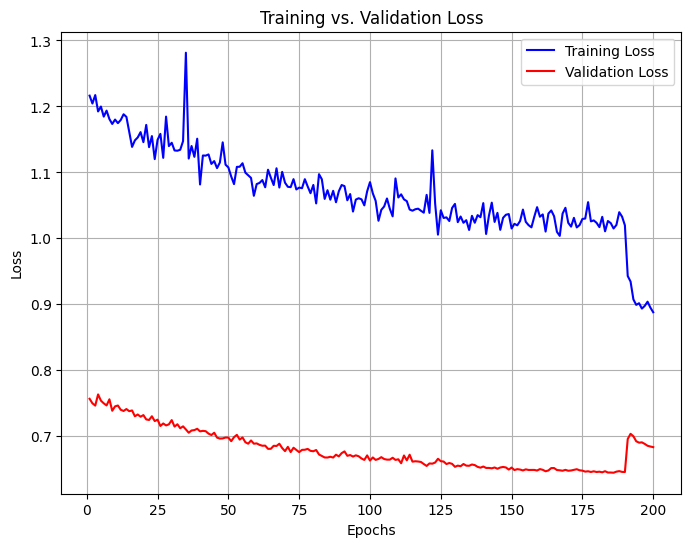

In [48]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
results = pd.read_csv('runs/detect/train142/results.csv')

# Plot both losses in the same graph
plt.figure(figsize=(8, 6))
plt.plot(results['epoch'], results['train/cls_loss'], label='Training Loss', color='blue')
plt.plot(results['epoch'], results['val/cls_loss'], label='Validation Loss', color='red')

# Add labels, title, and legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [51]:
results = model.train(
    data='datasets/augdataset/Datasets/data.yaml',
    epochs=300,
    batch=8,
    imgsz=640,
    device=0,
    resume=False,
    save_period=50,
    lr0=0.0001,              # Initial learning rate
    optimizer='SGD',        # Choose optimizer: 'SGD', 'Adam', or 'AdamW'
            
    momentum=0.937,         # SGD momentum
    weight_decay=0.0005,    # Weight decay
    **data_augmentation
)

metrics = model.val()
print(metrics)



New https://pypi.org/project/ultralytics/8.3.86 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7940MiB)
engine/trainer: task=detect, mode=train, model=yolov12n.pt, data=datasets/augdataset/Datasets/data.yaml, epochs=300, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=50, cache=False, device=0, workers=8, project=None, name=train1424, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False

train: Scanning /home/ai/Desktop/kaniska/datasets/augdataset/Datasets/train/labels.cache... 1689 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1689/1689 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /home/ai/Desktop/kaniska/datasets/augdataset/Datasets/valid/labels.cache... 161 images, 0 backgrounds, 0 corrupt: 100%|██████████| 161/161 [00:00<?, ?it/s]


Plotting labels to runs/detect/train1424/labels.jpg... 
optimizer: SGD(lr=0.0001, momentum=0.937) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train1424
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      3.54G     0.9457     0.9733      1.061         40        640: 100%|██████████| 212/212 [00:20<00:00, 10.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.00it/s]

                   all        161       1917      0.811      0.806      0.861      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      4.04G     0.9373     0.9644      1.057         12        640: 100%|██████████| 212/212 [00:19<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.30it/s]

                   all        161       1917      0.825      0.798      0.863      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      3.56G     0.9383     0.9669      1.063          8        640: 100%|██████████| 212/212 [00:18<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.48it/s]

                   all        161       1917      0.836      0.788      0.862      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      3.64G     0.9349     0.9433      1.055         32        640: 100%|██████████| 212/212 [00:18<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.08it/s]

                   all        161       1917      0.835      0.783       0.86      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      3.64G     0.9428     0.9523       1.06         34        640: 100%|██████████| 212/212 [00:18<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.01it/s]

                   all        161       1917      0.838      0.775      0.859      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      3.61G     0.9215     0.9427      1.053         28        640: 100%|██████████| 212/212 [00:18<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.93it/s]

                   all        161       1917      0.827      0.793      0.861      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      3.85G     0.9315     0.9459      1.053         12        640: 100%|██████████| 212/212 [00:18<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.45it/s]

                   all        161       1917       0.83      0.798      0.861      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      3.94G     0.9261      0.943      1.052         30        640: 100%|██████████| 212/212 [00:18<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.36it/s]

                   all        161       1917      0.821      0.791      0.857      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      3.57G     0.9178     0.9365      1.051          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.34it/s]

                   all        161       1917      0.843      0.786       0.86      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      3.63G     0.9343     0.9445      1.057         49        640: 100%|██████████| 212/212 [00:18<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.11it/s]

                   all        161       1917      0.825      0.785       0.86      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      3.83G     0.9266     0.9346      1.053          2        640: 100%|██████████| 212/212 [00:18<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.32it/s]

                   all        161       1917       0.83      0.788      0.861      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      3.69G     0.9225     0.9469      1.057          8        640: 100%|██████████| 212/212 [00:18<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.33it/s]

                   all        161       1917      0.837      0.775      0.864      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      3.53G     0.9289     0.9505      1.053          3        640: 100%|██████████| 212/212 [00:18<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.22it/s]

                   all        161       1917      0.815      0.807      0.863      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      3.46G     0.9342     0.9555      1.056          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.00it/s]

                   all        161       1917      0.852      0.773      0.866      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      3.46G     0.9287     0.9391      1.053         16        640: 100%|██████████| 212/212 [00:18<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.10it/s]

                   all        161       1917      0.829      0.798      0.864      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      3.65G     0.9182     0.9215      1.047         16        640: 100%|██████████| 212/212 [00:18<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.00it/s]

                   all        161       1917      0.834      0.788      0.863      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      3.69G     0.9242     0.9284      1.051         14        640: 100%|██████████| 212/212 [00:18<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.32it/s]

                   all        161       1917      0.818      0.797      0.869       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      3.68G      0.924     0.9396      1.057          9        640: 100%|██████████| 212/212 [00:18<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.12it/s]

                   all        161       1917       0.83       0.79      0.863      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      3.59G     0.9373     0.9426      1.058          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.08it/s]

                   all        161       1917      0.833       0.78      0.864      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      3.75G     0.9248     0.9368       1.05         38        640: 100%|██████████| 212/212 [00:18<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.89it/s]

                   all        161       1917      0.834      0.788      0.862      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      3.71G     0.9298      0.954      1.057         31        640: 100%|██████████| 212/212 [00:18<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.29it/s]

                   all        161       1917      0.835      0.788      0.866      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      3.97G     0.9244     0.9318       1.06         16        640: 100%|██████████| 212/212 [00:18<00:00, 11.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.36it/s]

                   all        161       1917      0.838      0.784      0.866      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      3.44G     0.9417     0.9519      1.057          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.21it/s]

                   all        161       1917      0.831      0.795      0.863      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      3.62G     0.9179     0.9216      1.046         11        640: 100%|██████████| 212/212 [00:18<00:00, 11.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.13it/s]

                   all        161       1917      0.842      0.784      0.865       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      3.46G     0.9288     0.9464      1.057         13        640: 100%|██████████| 212/212 [00:18<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.28it/s]

                   all        161       1917      0.837      0.785      0.863      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      3.53G     0.9288     0.9468      1.053          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.15it/s]

                   all        161       1917      0.826      0.802      0.866      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      3.51G     0.9228     0.9203       1.05          9        640: 100%|██████████| 212/212 [00:18<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.33it/s]

                   all        161       1917      0.828      0.787      0.861      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      3.74G     0.9452      0.977      1.061         17        640: 100%|██████████| 212/212 [00:18<00:00, 11.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.77it/s]

                   all        161       1917      0.827      0.784       0.86      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      3.55G     0.9309     0.9409      1.055         19        640: 100%|██████████| 212/212 [00:18<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.14it/s]

                   all        161       1917      0.828      0.785      0.861      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      3.66G     0.9203     0.9411      1.054          9        640: 100%|██████████| 212/212 [00:18<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.25it/s]

                   all        161       1917      0.836      0.782      0.862      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      3.65G     0.9334     0.9296      1.053         28        640: 100%|██████████| 212/212 [00:19<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.10it/s]

                   all        161       1917      0.834      0.784      0.865      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      3.42G     0.9187     0.9355      1.051         23        640: 100%|██████████| 212/212 [00:18<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.21it/s]

                   all        161       1917      0.824      0.797      0.864      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      3.67G       0.93     0.9375       1.05         16        640: 100%|██████████| 212/212 [00:18<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.92it/s]

                   all        161       1917      0.823      0.794      0.867      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      3.65G      0.924     0.9537      1.057          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.27it/s]

                   all        161       1917      0.826      0.797      0.865      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      3.61G     0.9332      1.053      1.054          1        640: 100%|██████████| 212/212 [00:18<00:00, 11.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.25it/s]

                   all        161       1917      0.835      0.798      0.868      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      3.46G     0.9158     0.9273       1.05         34        640: 100%|██████████| 212/212 [00:18<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.21it/s]

                   all        161       1917      0.821      0.805      0.868       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      3.89G     0.9295     0.9468      1.057         29        640: 100%|██████████| 212/212 [00:18<00:00, 11.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.33it/s]

                   all        161       1917      0.819      0.804      0.867      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      3.74G     0.9227     0.9352      1.053          5        640: 100%|██████████| 212/212 [00:18<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.00it/s]

                   all        161       1917      0.834      0.797      0.869      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      3.71G     0.9262     0.9493      1.052          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.89it/s]

                   all        161       1917      0.841      0.786      0.866       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      3.79G     0.9028     0.8924      1.041         12        640: 100%|██████████| 212/212 [00:18<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.10it/s]

                   all        161       1917      0.844      0.778      0.868       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      3.57G     0.9226     0.9305      1.051         34        640: 100%|██████████| 212/212 [00:18<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.01it/s]

                   all        161       1917      0.832      0.789      0.864      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300       3.6G     0.9216      0.933      1.056         43        640: 100%|██████████| 212/212 [00:18<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.28it/s]

                   all        161       1917      0.841      0.792      0.865      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      3.84G     0.9212     0.9371      1.053          5        640: 100%|██████████| 212/212 [00:18<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.11it/s]

                   all        161       1917      0.843      0.789       0.87       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      3.91G     0.9128     0.9242      1.044         21        640: 100%|██████████| 212/212 [00:19<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.16it/s]

                   all        161       1917      0.826      0.804      0.868      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      3.62G     0.9288     0.9309      1.048         25        640: 100%|██████████| 212/212 [00:18<00:00, 11.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.93it/s]

                   all        161       1917      0.826      0.788      0.863      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      3.58G     0.9196     0.9273      1.051         15        640: 100%|██████████| 212/212 [00:18<00:00, 11.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.18it/s]

                   all        161       1917      0.839      0.794      0.868       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      3.72G      0.919     0.9296      1.047         27        640: 100%|██████████| 212/212 [00:19<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.02it/s]

                   all        161       1917      0.838      0.791      0.868      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      3.85G     0.9502      0.962      1.058         33        640: 100%|██████████| 212/212 [00:18<00:00, 11.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.27it/s]

                   all        161       1917       0.84      0.788      0.869      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      3.74G     0.9312     0.9319      1.052         11        640: 100%|██████████| 212/212 [00:18<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.58it/s]

                   all        161       1917      0.843      0.796      0.871      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      3.88G      0.913     0.9252      1.048         11        640: 100%|██████████| 212/212 [00:18<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.34it/s]

                   all        161       1917      0.836       0.79      0.868      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      3.86G     0.9063     0.9131      1.047         10        640: 100%|██████████| 212/212 [00:18<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.43it/s]

                   all        161       1917      0.848      0.788      0.872      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      3.64G     0.9007     0.9063      1.041         10        640: 100%|██████████| 212/212 [00:18<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.20it/s]

                   all        161       1917      0.841      0.784      0.869      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300       3.8G       0.91      0.927      1.048          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.14it/s]

                   all        161       1917      0.839      0.797      0.866      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      3.62G     0.9245     0.9315      1.048         11        640: 100%|██████████| 212/212 [00:18<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.12it/s]

                   all        161       1917      0.838      0.786      0.866      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      3.84G     0.9244     0.9361      1.052          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.16it/s]


                   all        161       1917      0.826      0.803      0.866      0.717

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      3.69G     0.9152     0.9247      1.048          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.26it/s]

                   all        161       1917      0.832        0.8      0.869      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      3.71G     0.9182     0.9136       1.05         11        640: 100%|██████████| 212/212 [00:18<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.37it/s]

                   all        161       1917      0.847      0.789       0.87      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      3.47G     0.9143     0.9196      1.048         41        640: 100%|██████████| 212/212 [00:18<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.15it/s]

                   all        161       1917      0.826      0.801      0.868      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      3.59G     0.9097     0.8989      1.036         67        640: 100%|██████████| 212/212 [00:18<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.04it/s]

                   all        161       1917      0.837      0.792       0.87      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      3.84G     0.9183     0.9177      1.043         39        640: 100%|██████████| 212/212 [00:18<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.36it/s]

                   all        161       1917      0.839      0.795      0.871      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      3.68G       0.91     0.9127      1.042         37        640: 100%|██████████| 212/212 [00:18<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.44it/s]

                   all        161       1917      0.829      0.793      0.865      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      3.73G     0.9258     0.9257      1.049         11        640: 100%|██████████| 212/212 [00:18<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.90it/s]

                   all        161       1917      0.836      0.792      0.871      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      3.39G     0.8996     0.9093      1.037         18        640: 100%|██████████| 212/212 [00:18<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.29it/s]

                   all        161       1917      0.855      0.783      0.869      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      3.51G      0.912     0.9274      1.047          3        640: 100%|██████████| 212/212 [00:18<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.34it/s]

                   all        161       1917      0.818       0.81      0.867       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      3.53G     0.9139     0.9257      1.049         34        640: 100%|██████████| 212/212 [00:18<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.09it/s]

                   all        161       1917      0.838      0.802      0.869      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      3.58G     0.9011     0.9086       1.04         14        640: 100%|██████████| 212/212 [00:18<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.57it/s]

                   all        161       1917      0.831      0.807      0.868      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300      3.65G     0.9192     0.9441      1.047          3        640: 100%|██████████| 212/212 [00:18<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.41it/s]

                   all        161       1917      0.829      0.807      0.867      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      3.75G     0.9036     0.9112      1.038          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.32it/s]

                   all        161       1917      0.824      0.803      0.869      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      3.51G     0.9236     0.9293       1.05         13        640: 100%|██████████| 212/212 [00:18<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.33it/s]

                   all        161       1917      0.835      0.804       0.87      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300      3.62G     0.9188     0.9201      1.053          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.11it/s]

                   all        161       1917      0.839      0.802      0.872      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300      3.68G     0.9034     0.9132      1.039         12        640: 100%|██████████| 212/212 [00:18<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.10it/s]

                   all        161       1917      0.823       0.81      0.869      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      3.61G      0.909     0.9159      1.044         25        640: 100%|██████████| 212/212 [00:18<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.07it/s]

                   all        161       1917      0.836      0.811      0.871      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      3.78G     0.9163       0.93      1.048         43        640: 100%|██████████| 212/212 [00:18<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.33it/s]

                   all        161       1917      0.835      0.797       0.87      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      3.32G     0.9041     0.9086      1.039          4        640: 100%|██████████| 212/212 [00:19<00:00, 10.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.28it/s]

                   all        161       1917       0.84      0.799      0.872      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      3.56G     0.9185     0.9196       1.05         39        640: 100%|██████████| 212/212 [00:18<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.11it/s]

                   all        161       1917      0.851      0.785      0.872      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300       3.9G     0.9177     0.9172      1.046         50        640: 100%|██████████| 212/212 [00:18<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.88it/s]

                   all        161       1917      0.843      0.789      0.871      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      3.81G     0.9116     0.9222      1.049         13        640: 100%|██████████| 212/212 [00:18<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.32it/s]

                   all        161       1917      0.832      0.801      0.869      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      3.44G     0.9138     0.9148      1.045          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.35it/s]

                   all        161       1917      0.837      0.791       0.87      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300       3.4G     0.9102      0.911      1.048         24        640: 100%|██████████| 212/212 [00:18<00:00, 11.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.11it/s]

                   all        161       1917      0.838      0.793      0.874      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      3.52G     0.9271     0.9235      1.045         16        640: 100%|██████████| 212/212 [00:18<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.09it/s]

                   all        161       1917       0.83      0.799       0.87      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      3.95G     0.9038     0.8984       1.04          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.49it/s]

                   all        161       1917      0.838      0.789      0.867      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300      3.62G     0.9165     0.9337      1.046          2        640: 100%|██████████| 212/212 [00:18<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.38it/s]

                   all        161       1917      0.846      0.791      0.872      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300      3.84G     0.9159     0.9362      1.049          3        640: 100%|██████████| 212/212 [00:18<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.07it/s]

                   all        161       1917      0.828      0.799      0.872      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300      3.77G     0.9155       0.91      1.044          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.35it/s]

                   all        161       1917      0.846      0.789      0.871      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      3.62G     0.9219     0.9163      1.045          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.23it/s]

                   all        161       1917      0.829       0.81      0.873      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300       3.7G     0.9042     0.9038      1.041         30        640: 100%|██████████| 212/212 [00:18<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.17it/s]

                   all        161       1917      0.842      0.795      0.874      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300      3.69G     0.9276     0.9207      1.045          5        640: 100%|██████████| 212/212 [00:18<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.20it/s]

                   all        161       1917      0.841      0.794      0.871      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300      3.84G     0.9038     0.9011      1.041         15        640: 100%|██████████| 212/212 [00:18<00:00, 11.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.28it/s]

                   all        161       1917      0.837       0.79      0.872      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300      3.67G     0.9094     0.9187      1.051         10        640: 100%|██████████| 212/212 [00:18<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.33it/s]

                   all        161       1917      0.845      0.792      0.873      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300      3.63G     0.9307     0.9284      1.049          8        640: 100%|██████████| 212/212 [00:18<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.64it/s]

                   all        161       1917      0.831      0.797      0.871      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300      3.56G     0.9133     0.9277      1.047         13        640: 100%|██████████| 212/212 [00:18<00:00, 11.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.28it/s]

                   all        161       1917       0.84      0.785      0.867      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      3.75G     0.9154     0.9072      1.046          3        640: 100%|██████████| 212/212 [00:18<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.08it/s]

                   all        161       1917       0.82      0.808      0.869      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300      3.46G     0.9214     0.9185      1.047         15        640: 100%|██████████| 212/212 [00:18<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.00it/s]

                   all        161       1917      0.831      0.804      0.875      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300      3.72G     0.9003     0.8869      1.038         27        640: 100%|██████████| 212/212 [00:18<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.96it/s]

                   all        161       1917      0.845      0.792      0.875      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      3.66G      0.895     0.9009      1.037         48        640: 100%|██████████| 212/212 [00:18<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.38it/s]

                   all        161       1917      0.838      0.793      0.873      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300      3.67G     0.8963     0.9032      1.039         15        640: 100%|██████████| 212/212 [00:18<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.11it/s]

                   all        161       1917      0.838      0.797      0.873      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      3.82G      0.912     0.9106      1.043         10        640: 100%|██████████| 212/212 [00:18<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.26it/s]

                   all        161       1917       0.84      0.797      0.875      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      3.69G     0.9046     0.8995      1.042         18        640: 100%|██████████| 212/212 [00:18<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.02it/s]

                   all        161       1917      0.844       0.79      0.873      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      4.06G     0.9152     0.9247      1.047         39        640: 100%|██████████| 212/212 [00:18<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.32it/s]

                   all        161       1917      0.835      0.798      0.874      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300      3.54G     0.9256     0.9323      1.053         12        640: 100%|██████████| 212/212 [00:18<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.31it/s]

                   all        161       1917      0.847      0.787      0.871      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      3.64G     0.9109     0.9179      1.048         12        640: 100%|██████████| 212/212 [00:18<00:00, 11.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.10it/s]

                   all        161       1917      0.837      0.792      0.875      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300       3.7G     0.9093      0.909      1.044          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.26it/s]

                   all        161       1917      0.828      0.806      0.872      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300      3.56G     0.8894     0.8803      1.033          8        640: 100%|██████████| 212/212 [00:18<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.22it/s]

                   all        161       1917      0.833      0.805      0.875      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300       3.7G     0.9052     0.9007      1.042          9        640: 100%|██████████| 212/212 [00:18<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.95it/s]

                   all        161       1917      0.812      0.809      0.872      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300      3.87G     0.9061     0.9039      1.041         37        640: 100%|██████████| 212/212 [00:18<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.27it/s]

                   all        161       1917      0.829      0.799      0.871      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      3.57G     0.9162     0.9187      1.047          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.23it/s]

                   all        161       1917      0.835      0.789      0.873      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300      3.54G     0.9002     0.8982       1.04         10        640: 100%|██████████| 212/212 [00:18<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.31it/s]

                   all        161       1917       0.84      0.788      0.874      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300      3.65G      0.897     0.8903      1.037         38        640: 100%|██████████| 212/212 [00:19<00:00, 10.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.93it/s]

                   all        161       1917      0.839      0.793      0.874      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      3.53G      0.924     0.9416      1.055          3        640: 100%|██████████| 212/212 [00:18<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.93it/s]

                   all        161       1917      0.833      0.795      0.871      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      3.53G     0.9115      0.918      1.047         14        640: 100%|██████████| 212/212 [00:18<00:00, 11.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.17it/s]

                   all        161       1917      0.825      0.799      0.874       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300       3.4G     0.9123     0.9226      1.049         35        640: 100%|██████████| 212/212 [00:18<00:00, 11.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.46it/s]

                   all        161       1917      0.846      0.793      0.874      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      3.78G     0.8995      0.912      1.037         34        640: 100%|██████████| 212/212 [00:18<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.24it/s]

                   all        161       1917      0.823      0.798      0.868      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      3.64G     0.9106     0.9078       1.04          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.30it/s]

                   all        161       1917      0.842      0.789      0.873      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      3.69G     0.9018     0.8959      1.036         28        640: 100%|██████████| 212/212 [00:18<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.42it/s]

                   all        161       1917      0.839      0.792      0.873      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300      3.86G     0.9127     0.8992      1.042         34        640: 100%|██████████| 212/212 [00:18<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.22it/s]

                   all        161       1917      0.844      0.795      0.873       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300      3.77G     0.9064     0.9026      1.041         43        640: 100%|██████████| 212/212 [00:18<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.26it/s]

                   all        161       1917      0.848      0.789      0.872      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      3.46G     0.9093     0.9014      1.038          9        640: 100%|██████████| 212/212 [00:18<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.07it/s]

                   all        161       1917       0.84      0.788      0.873      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      3.48G     0.9074      0.897      1.041          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.38it/s]

                   all        161       1917      0.838      0.797      0.874       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      3.88G     0.8998     0.8912      1.037          9        640: 100%|██████████| 212/212 [00:18<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.59it/s]


                   all        161       1917      0.838      0.799      0.874      0.731

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300      4.11G      0.921     0.9231      1.043         31        640: 100%|██████████| 212/212 [00:18<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.97it/s]

                   all        161       1917      0.853      0.792      0.875       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      3.78G     0.9011     0.8958       1.04         16        640: 100%|██████████| 212/212 [00:18<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.28it/s]

                   all        161       1917      0.848       0.79      0.875      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300      3.88G     0.8942     0.9555      1.035          0        640: 100%|██████████| 212/212 [00:18<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.95it/s]

                   all        161       1917       0.84      0.794      0.875       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300      3.56G     0.9055     0.9041      1.042          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.38it/s]

                   all        161       1917      0.854      0.784      0.875      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300       3.5G     0.8801      0.864      1.027          8        640: 100%|██████████| 212/212 [00:18<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.99it/s]

                   all        161       1917      0.842      0.796      0.874      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300       3.6G     0.9077        0.9      1.046         15        640: 100%|██████████| 212/212 [00:19<00:00, 11.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.08it/s]

                   all        161       1917      0.849      0.784      0.876      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      3.61G     0.8946     0.8854      1.034         30        640: 100%|██████████| 212/212 [00:18<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.21it/s]

                   all        161       1917      0.846      0.792      0.876      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      3.84G     0.9038     0.8928      1.038         11        640: 100%|██████████| 212/212 [00:18<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.35it/s]

                   all        161       1917      0.847      0.794      0.876      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300      3.62G     0.9017     0.8844      1.038         36        640: 100%|██████████| 212/212 [00:18<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.38it/s]

                   all        161       1917      0.849      0.796      0.874       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      3.85G     0.9054     0.9055      1.046         25        640: 100%|██████████| 212/212 [00:18<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.49it/s]

                   all        161       1917      0.849       0.79      0.875       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300       3.5G     0.9086     0.9092       1.04         18        640: 100%|██████████| 212/212 [00:18<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.44it/s]

                   all        161       1917      0.863      0.784      0.878      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      3.58G     0.8972     0.8834      1.036          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.70it/s]

                   all        161       1917      0.839      0.804      0.876      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300      3.49G     0.8955     0.8958      1.038          3        640: 100%|██████████| 212/212 [00:18<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.49it/s]

                   all        161       1917      0.859      0.787      0.877      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300       3.8G     0.8929     0.8824      1.032          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.38it/s]

                   all        161       1917      0.855      0.792      0.878      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300      3.47G     0.8999     0.8898       1.04          9        640: 100%|██████████| 212/212 [00:18<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.45it/s]

                   all        161       1917      0.836      0.811      0.877      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300      3.74G     0.8836     0.8747      1.031         14        640: 100%|██████████| 212/212 [00:18<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.40it/s]

                   all        161       1917      0.843      0.799      0.876      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      3.77G     0.8987     0.8914      1.039          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.29it/s]

                   all        161       1917       0.83      0.808      0.876       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300      3.58G     0.8927     0.8865      1.036          3        640: 100%|██████████| 212/212 [00:18<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.48it/s]

                   all        161       1917      0.846      0.785      0.875      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      3.48G     0.8976     0.8976      1.037          9        640: 100%|██████████| 212/212 [00:18<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.29it/s]

                   all        161       1917      0.854      0.786      0.877      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300      3.92G     0.9023     0.8918      1.037         11        640: 100%|██████████| 212/212 [00:18<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.98it/s]

                   all        161       1917      0.839      0.794      0.876      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300      3.52G     0.9045     0.9144      1.042          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.08it/s]

                   all        161       1917      0.848      0.797      0.877      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300      3.57G     0.8911     0.8719      1.033         15        640: 100%|██████████| 212/212 [00:18<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.39it/s]

                   all        161       1917      0.841      0.801      0.876      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      3.54G     0.8873     0.8974      1.037          5        640: 100%|██████████| 212/212 [00:18<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.45it/s]

                   all        161       1917      0.835      0.803      0.879      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300      3.62G     0.9064     0.9126      1.044          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.29it/s]

                   all        161       1917      0.852      0.794      0.876      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      3.75G     0.9092     0.8891       1.04          9        640: 100%|██████████| 212/212 [00:18<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.45it/s]

                   all        161       1917      0.837      0.806      0.877      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300      3.79G     0.9097      0.897      1.037         24        640: 100%|██████████| 212/212 [00:18<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.48it/s]

                   all        161       1917      0.838      0.803      0.878      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300      3.63G     0.8981     0.8753      1.034         23        640: 100%|██████████| 212/212 [00:18<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.52it/s]

                   all        161       1917       0.84      0.802      0.876       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300       3.8G     0.8985     0.8923      1.042          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.49it/s]

                   all        161       1917       0.84      0.803      0.875       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300      3.66G     0.9064     0.8972      1.043          2        640: 100%|██████████| 212/212 [00:18<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.43it/s]

                   all        161       1917      0.858      0.789      0.876       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      3.67G     0.9007     0.8991      1.036         24        640: 100%|██████████| 212/212 [00:18<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.26it/s]

                   all        161       1917       0.84      0.796      0.878      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      3.48G     0.8872     0.8769      1.035          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.33it/s]

                   all        161       1917      0.843        0.8      0.878      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      3.86G     0.9004     0.8835      1.036         11        640: 100%|██████████| 212/212 [00:18<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.41it/s]

                   all        161       1917      0.834      0.811      0.878      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300      3.51G     0.8915     0.8819      1.035         15        640: 100%|██████████| 212/212 [00:18<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.42it/s]

                   all        161       1917      0.846      0.796      0.879      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300      3.98G     0.9003     0.8911      1.038         18        640: 100%|██████████| 212/212 [00:18<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.84it/s]


                   all        161       1917       0.84      0.796      0.878      0.731

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300      3.54G     0.9107     0.9071      1.043          4        640: 100%|██████████| 212/212 [00:19<00:00, 11.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.43it/s]

                   all        161       1917      0.832      0.806      0.877      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      3.57G     0.8998     0.8901      1.039          8        640: 100%|██████████| 212/212 [00:18<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.54it/s]

                   all        161       1917       0.84      0.799      0.877      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      3.85G     0.8928     0.8844      1.033         30        640: 100%|██████████| 212/212 [00:18<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.04it/s]

                   all        161       1917      0.844      0.789      0.877      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      3.64G     0.8905     0.8775       1.03         25        640: 100%|██████████| 212/212 [00:19<00:00, 10.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.78it/s]

                   all        161       1917      0.853      0.786      0.876      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      3.66G     0.9043     0.8928      1.036         14        640: 100%|██████████| 212/212 [00:19<00:00, 11.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.55it/s]


                   all        161       1917      0.843      0.798      0.877      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300      3.67G     0.9086      0.906      1.042         15        640: 100%|██████████| 212/212 [00:19<00:00, 10.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.03it/s]

                   all        161       1917      0.835      0.802      0.877      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300      3.64G     0.9044     0.8943      1.039         18        640: 100%|██████████| 212/212 [00:20<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.07it/s]


                   all        161       1917      0.842        0.8      0.877      0.733

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300      3.68G      0.893     0.8976      1.042          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.27it/s]

                   all        161       1917      0.855      0.788      0.878      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      3.63G      0.886     0.8721      1.032          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.95it/s]

                   all        161       1917      0.841      0.799      0.877      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300      3.76G     0.9044      0.899      1.038         12        640: 100%|██████████| 212/212 [00:18<00:00, 11.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.66it/s]

                   all        161       1917      0.839      0.797      0.876       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      3.54G      0.908     0.9055      1.043         31        640: 100%|██████████| 212/212 [00:19<00:00, 11.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.11it/s]

                   all        161       1917      0.842      0.797      0.876       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300      3.51G     0.8978     0.8975       1.04         16        640: 100%|██████████| 212/212 [00:18<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.83it/s]

                   all        161       1917      0.856      0.785      0.877      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300      3.61G     0.8939     0.8745      1.034         16        640: 100%|██████████| 212/212 [00:19<00:00, 10.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.73it/s]

                   all        161       1917      0.847      0.796      0.878      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300      3.56G     0.8917     0.8686      1.034         54        640: 100%|██████████| 212/212 [00:18<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.45it/s]

                   all        161       1917      0.835      0.805      0.878      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300      3.54G     0.9143     0.8926       1.04          8        640: 100%|██████████| 212/212 [00:18<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.25it/s]

                   all        161       1917      0.835      0.795      0.877       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300      3.49G      0.892     0.9029      1.039         12        640: 100%|██████████| 212/212 [00:18<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.45it/s]

                   all        161       1917       0.84      0.794      0.876      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300      3.56G     0.8904     0.8874      1.035         14        640: 100%|██████████| 212/212 [00:18<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.42it/s]

                   all        161       1917      0.843      0.792      0.875      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300      3.78G     0.8909     0.8779      1.033          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.20it/s]

                   all        161       1917      0.849      0.785      0.877      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300      3.86G     0.8981     0.8894      1.038          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.48it/s]

                   all        161       1917      0.857      0.785      0.877      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300      3.56G     0.8984     0.8781      1.026         11        640: 100%|██████████| 212/212 [00:19<00:00, 11.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.79it/s]

                   all        161       1917      0.852      0.786      0.878      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300      3.49G     0.8977     0.8788      1.036         26        640: 100%|██████████| 212/212 [00:18<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.98it/s]

                   all        161       1917      0.833      0.807      0.878      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      3.72G     0.8971     0.8854      1.041         10        640: 100%|██████████| 212/212 [00:18<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.60it/s]

                   all        161       1917      0.842      0.799      0.878      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300      3.63G      0.894      0.894      1.034         58        640: 100%|██████████| 212/212 [00:18<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.39it/s]

                   all        161       1917      0.821       0.82       0.88      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300      3.43G     0.9186     0.9167      1.049         33        640: 100%|██████████| 212/212 [00:18<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.48it/s]

                   all        161       1917      0.828       0.81      0.879      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300      3.94G     0.9076     0.8864      1.039         12        640: 100%|██████████| 212/212 [00:18<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.49it/s]

                   all        161       1917      0.835      0.801      0.879      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300      3.52G      0.896     0.8863      1.038          2        640: 100%|██████████| 212/212 [00:18<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.36it/s]

                   all        161       1917      0.827       0.81      0.878      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      3.55G      0.896     0.8849      1.036         44        640: 100%|██████████| 212/212 [00:18<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.74it/s]

                   all        161       1917      0.854      0.786      0.879      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300      3.69G      0.879     0.8766      1.029         10        640: 100%|██████████| 212/212 [00:18<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.59it/s]

                   all        161       1917      0.834      0.803      0.876       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300      3.57G     0.9093     0.8973       1.04          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.54it/s]

                   all        161       1917      0.838      0.806      0.877      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      3.48G     0.8833     0.8706      1.032         10        640: 100%|██████████| 212/212 [00:18<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.14it/s]

                   all        161       1917      0.843      0.797      0.877      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300      3.61G     0.8875     0.8921      1.029         12        640: 100%|██████████| 212/212 [00:18<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.61it/s]

                   all        161       1917      0.852      0.791      0.879      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300      3.38G     0.9005     0.8848      1.037          5        640: 100%|██████████| 212/212 [00:18<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.52it/s]

                   all        161       1917      0.829      0.808      0.878      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      3.74G     0.8958     0.8808      1.029         29        640: 100%|██████████| 212/212 [00:18<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.28it/s]

                   all        161       1917      0.832      0.806      0.878      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300      3.72G     0.8941     0.8813      1.034         13        640: 100%|██████████| 212/212 [00:18<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.40it/s]

                   all        161       1917      0.851      0.789      0.878      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300      3.83G     0.9021     0.9057      1.041          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.53it/s]

                   all        161       1917      0.837      0.804      0.876      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300      3.67G     0.8969     0.8992      1.039         33        640: 100%|██████████| 212/212 [00:18<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.72it/s]

                   all        161       1917      0.844      0.793      0.878      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300      3.74G      0.895     0.8845      1.035          5        640: 100%|██████████| 212/212 [00:18<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.43it/s]

                   all        161       1917      0.844      0.796      0.879      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300      3.57G     0.8792     0.8722      1.034         19        640: 100%|██████████| 212/212 [00:18<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.20it/s]

                   all        161       1917      0.857      0.788       0.88      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300      3.51G     0.8989     0.8831      1.031          9        640: 100%|██████████| 212/212 [00:18<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.14it/s]

                   all        161       1917      0.846      0.796      0.878      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300      3.69G     0.8699     0.8635      1.024          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.66it/s]

                   all        161       1917      0.848       0.79      0.878      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300      3.56G     0.8877     0.8667      1.032          5        640: 100%|██████████| 212/212 [00:18<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.41it/s]

                   all        161       1917      0.851      0.789      0.879      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      3.41G     0.8957     0.8911      1.035          5        640: 100%|██████████| 212/212 [00:18<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.51it/s]

                   all        161       1917      0.851      0.784      0.878      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300      3.57G      0.893     0.8814      1.032         24        640: 100%|██████████| 212/212 [00:18<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.65it/s]

                   all        161       1917      0.848       0.79      0.878      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/300      3.44G     0.8964     0.8755      1.035         13        640: 100%|██████████| 212/212 [00:18<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.21it/s]

                   all        161       1917      0.836       0.81      0.878      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/300      3.73G     0.8967     0.8814      1.036          2        640: 100%|██████████| 212/212 [00:18<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.02it/s]

                   all        161       1917       0.85      0.785      0.878      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/300       3.6G     0.8915     0.8765      1.033         13        640: 100%|██████████| 212/212 [00:18<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.44it/s]

                   all        161       1917      0.854      0.786      0.878      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/300       3.6G      0.895     0.8708      1.029         12        640: 100%|██████████| 212/212 [00:18<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.31it/s]

                   all        161       1917      0.842      0.799      0.877      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/300      3.83G     0.8847     0.8689      1.029         35        640: 100%|██████████| 212/212 [00:18<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.55it/s]

                   all        161       1917      0.842      0.805      0.879      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/300      3.96G     0.9012     0.8903       1.04          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.35it/s]

                   all        161       1917      0.847      0.796      0.879      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300       3.5G      0.896      0.887      1.034         14        640: 100%|██████████| 212/212 [00:18<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.42it/s]

                   all        161       1917      0.846      0.793      0.878      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300      3.43G     0.8925     0.8724      1.027          2        640: 100%|██████████| 212/212 [00:18<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.58it/s]

                   all        161       1917      0.843      0.804      0.879      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/300      3.75G     0.8886     0.8745      1.037         13        640: 100%|██████████| 212/212 [00:18<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.11it/s]

                   all        161       1917      0.844      0.802      0.879      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/300      3.67G     0.8869     0.8768      1.035         25        640: 100%|██████████| 212/212 [00:18<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.53it/s]

                   all        161       1917      0.847      0.799      0.879      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/300      3.77G     0.8895     0.8631      1.031         15        640: 100%|██████████| 212/212 [00:18<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.57it/s]

                   all        161       1917      0.833      0.812      0.878      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/300      3.99G     0.8792     0.8622       1.03         26        640: 100%|██████████| 212/212 [00:18<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.54it/s]

                   all        161       1917      0.835      0.811       0.88      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/300      3.71G     0.8975     0.8833      1.031          3        640: 100%|██████████| 212/212 [00:18<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.39it/s]

                   all        161       1917      0.836      0.809      0.878      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/300      3.73G     0.8934     0.8898      1.036         38        640: 100%|██████████| 212/212 [00:18<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.42it/s]

                   all        161       1917      0.841      0.805      0.878      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/300      3.48G     0.8858     0.8724      1.027         15        640: 100%|██████████| 212/212 [00:18<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.44it/s]

                   all        161       1917      0.843      0.805       0.88      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/300      3.57G     0.8772     0.8566      1.027         27        640: 100%|██████████| 212/212 [00:18<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.54it/s]

                   all        161       1917      0.847      0.799      0.879      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/300      3.51G     0.8831     0.8639      1.031         21        640: 100%|██████████| 212/212 [00:18<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.62it/s]

                   all        161       1917      0.846      0.803      0.879      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/300      3.61G     0.8948     0.8879      1.036         19        640: 100%|██████████| 212/212 [00:18<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.76it/s]

                   all        161       1917      0.849      0.794       0.88      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/300      3.57G     0.8943     0.8796      1.033          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.45it/s]

                   all        161       1917      0.837      0.809       0.88      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/300      3.84G     0.8783     0.8522      1.029         44        640: 100%|██████████| 212/212 [00:18<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.49it/s]

                   all        161       1917       0.84      0.808      0.879      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/300      3.43G     0.8947     0.8803      1.039         10        640: 100%|██████████| 212/212 [00:18<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.47it/s]

                   all        161       1917      0.845      0.804      0.879      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/300      3.47G      0.882     0.8632      1.033         22        640: 100%|██████████| 212/212 [00:18<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.27it/s]

                   all        161       1917      0.841      0.806      0.881      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/300      3.68G     0.8983     0.8698      1.032         25        640: 100%|██████████| 212/212 [00:18<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.21it/s]

                   all        161       1917      0.838      0.808       0.88      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/300      3.96G     0.8888     0.8568      1.027         36        640: 100%|██████████| 212/212 [00:18<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.53it/s]

                   all        161       1917      0.839      0.804      0.878      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/300      3.62G     0.9053     0.8842      1.034         17        640: 100%|██████████| 212/212 [00:18<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.46it/s]

                   all        161       1917      0.845      0.804       0.88      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/300       3.6G     0.8858     0.8638       1.03         22        640: 100%|██████████| 212/212 [00:18<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.38it/s]

                   all        161       1917       0.84      0.809       0.88      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/300      3.87G     0.8954      0.887       1.04         21        640: 100%|██████████| 212/212 [00:18<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.56it/s]

                   all        161       1917      0.843      0.801      0.879      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/300      3.61G     0.8871     0.8852      1.034          2        640: 100%|██████████| 212/212 [00:18<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.50it/s]

                   all        161       1917      0.838      0.806      0.878      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/300      3.95G     0.8808     0.8577      1.028          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.25it/s]

                   all        161       1917       0.83      0.811      0.878      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/300      3.73G     0.8802      0.873       1.03          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.19it/s]

                   all        161       1917      0.828      0.812      0.877      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/300      3.71G     0.8878     0.8658      1.033          5        640: 100%|██████████| 212/212 [00:18<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.31it/s]

                   all        161       1917      0.828      0.814      0.878      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/300      3.77G     0.8855     0.8764       1.03          8        640: 100%|██████████| 212/212 [00:18<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.41it/s]

                   all        161       1917      0.835       0.81      0.878      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/300      3.82G     0.8904     0.8671      1.028         17        640: 100%|██████████| 212/212 [00:18<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.56it/s]

                   all        161       1917      0.837      0.809      0.879      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/300      3.68G     0.8903     0.8763      1.032         46        640: 100%|██████████| 212/212 [00:18<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.56it/s]

                   all        161       1917      0.843      0.803      0.879      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/300       3.7G     0.8913     0.8864      1.034          2        640: 100%|██████████| 212/212 [00:18<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.49it/s]

                   all        161       1917      0.836       0.81       0.88      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/300      3.66G     0.9006      0.886      1.037         16        640: 100%|██████████| 212/212 [00:18<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.54it/s]

                   all        161       1917      0.846      0.801      0.879      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/300      3.88G     0.8872     0.8603       1.03         25        640: 100%|██████████| 212/212 [00:18<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.47it/s]

                   all        161       1917      0.854      0.796      0.879      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/300      3.76G       0.89      0.889      1.036          1        640: 100%|██████████| 212/212 [00:18<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.54it/s]

                   all        161       1917      0.841      0.808      0.878      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/300      3.98G      0.893     0.8774      1.036         24        640: 100%|██████████| 212/212 [00:18<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.57it/s]

                   all        161       1917      0.847      0.805      0.878      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/300      3.75G     0.8889     0.8793      1.035          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.54it/s]

                   all        161       1917      0.843      0.802      0.878      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/300      3.78G     0.8828     0.8657      1.028         15        640: 100%|██████████| 212/212 [00:18<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.62it/s]

                   all        161       1917       0.85      0.797      0.879      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/300      3.68G     0.8982     0.8846      1.032         18        640: 100%|██████████| 212/212 [00:18<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.45it/s]

                   all        161       1917      0.854      0.791       0.88      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/300      3.74G     0.8984     0.8878      1.034         53        640: 100%|██████████| 212/212 [00:18<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.47it/s]

                   all        161       1917      0.849      0.794      0.879      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/300      3.47G     0.8801     0.8613       1.03          1        640: 100%|██████████| 212/212 [00:18<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.35it/s]

                   all        161       1917      0.837      0.802      0.879      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/300      3.41G     0.8913     0.8749       1.03         24        640: 100%|██████████| 212/212 [00:18<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.47it/s]

                   all        161       1917      0.834      0.808      0.879      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/300      3.65G     0.8852      0.862      1.027         18        640: 100%|██████████| 212/212 [00:18<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.68it/s]

                   all        161       1917      0.841      0.805       0.88      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/300      3.85G     0.8751     0.8558      1.022         35        640: 100%|██████████| 212/212 [00:18<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.48it/s]

                   all        161       1917      0.837       0.81       0.88      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/300       3.7G     0.8807      0.866      1.027         57        640: 100%|██████████| 212/212 [00:18<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.61it/s]

                   all        161       1917      0.843      0.803      0.879      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/300      3.65G     0.8807      0.866      1.026         29        640: 100%|██████████| 212/212 [00:18<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.33it/s]

                   all        161       1917      0.844      0.806      0.879      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/300      3.82G     0.8951     0.8877      1.033          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.52it/s]

                   all        161       1917      0.841      0.804      0.879      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/300      3.87G     0.8861      0.875       1.03         15        640: 100%|██████████| 212/212 [00:18<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.33it/s]

                   all        161       1917      0.842      0.803      0.879      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/300      4.01G     0.8937     0.8912      1.027         22        640: 100%|██████████| 212/212 [00:18<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.57it/s]

                   all        161       1917       0.85      0.798      0.879      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/300       3.8G     0.8963     0.8913      1.036         42        640: 100%|██████████| 212/212 [00:18<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.49it/s]

                   all        161       1917      0.846        0.8       0.88      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/300      3.61G      0.886     0.8654      1.031         47        640: 100%|██████████| 212/212 [00:18<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.31it/s]

                   all        161       1917      0.844      0.804       0.88      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/300      3.65G     0.9065     0.8847      1.038          5        640: 100%|██████████| 212/212 [00:18<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.82it/s]


                   all        161       1917      0.847        0.8      0.879      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/300      3.75G     0.8822     0.8869      1.029          5        640: 100%|██████████| 212/212 [00:18<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.92it/s]

                   all        161       1917      0.849      0.799       0.88      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/300      3.88G     0.8816     0.8754      1.033         20        640: 100%|██████████| 212/212 [00:18<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.50it/s]

                   all        161       1917      0.847      0.803      0.879      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/300      3.53G     0.8945     0.8791      1.034         38        640: 100%|██████████| 212/212 [00:18<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.49it/s]

                   all        161       1917      0.852      0.799      0.879      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/300      3.86G     0.8927     0.8933       1.03          2        640: 100%|██████████| 212/212 [00:18<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.55it/s]

                   all        161       1917      0.853      0.798      0.879      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/300      3.51G     0.8767     0.8594      1.026         41        640: 100%|██████████| 212/212 [00:18<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.56it/s]

                   all        161       1917      0.845      0.801      0.879      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/300      3.71G     0.8883     0.8673      1.029         24        640: 100%|██████████| 212/212 [00:18<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.71it/s]

                   all        161       1917      0.839      0.805      0.879      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/300      3.93G     0.8856     0.8635      1.028         21        640: 100%|██████████| 212/212 [00:18<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.41it/s]

                   all        161       1917      0.841      0.803      0.879      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/300      3.93G     0.8995     0.8827      1.036          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.48it/s]

                   all        161       1917       0.84      0.804      0.879      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/300      3.69G     0.8922     0.8924      1.033         28        640: 100%|██████████| 212/212 [00:18<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.47it/s]

                   all        161       1917      0.837      0.806      0.879      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/300      3.76G     0.8916     0.8646       1.03         23        640: 100%|██████████| 212/212 [00:18<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.46it/s]

                   all        161       1917       0.84      0.805      0.879      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/300      3.69G     0.8819     0.8637      1.031          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.52it/s]

                   all        161       1917      0.838      0.803      0.879      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/300      3.62G     0.8917     0.8679      1.031          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.29it/s]

                   all        161       1917      0.835      0.807      0.878      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/300      3.81G      0.881     0.8662      1.026         36        640: 100%|██████████| 212/212 [00:18<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.17it/s]

                   all        161       1917       0.84      0.803      0.879      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/300      3.59G     0.8748     0.8696      1.028         41        640: 100%|██████████| 212/212 [00:18<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.13it/s]

                   all        161       1917      0.848      0.796      0.879      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/300      3.71G     0.8884      0.865      1.028         10        640: 100%|██████████| 212/212 [00:18<00:00, 11.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.42it/s]

                   all        161       1917      0.842      0.801      0.879      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/300      3.59G     0.8868     0.8635      1.029         14        640: 100%|██████████| 212/212 [00:18<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.73it/s]

                   all        161       1917       0.84      0.806      0.879      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/300      3.77G      0.883     0.8708      1.029         31        640: 100%|██████████| 212/212 [00:18<00:00, 11.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.55it/s]

                   all        161       1917      0.845      0.803      0.879      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/300      3.93G        0.9     0.8853      1.036         10        640: 100%|██████████| 212/212 [00:18<00:00, 11.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.50it/s]

                   all        161       1917      0.847        0.8      0.879      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/300      3.81G     0.8864     0.8685      1.033         15        640: 100%|██████████| 212/212 [00:18<00:00, 11.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.57it/s]

                   all        161       1917      0.847      0.801       0.88      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/300      3.62G      0.901     0.8865      1.035          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.71it/s]

                   all        161       1917      0.847      0.802       0.88      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/300      3.67G     0.8846     0.8855      1.034          2        640: 100%|██████████| 212/212 [00:18<00:00, 11.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.75it/s]

                   all        161       1917      0.842      0.807       0.88      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/300      3.57G     0.9111     0.8948      1.036          1        640: 100%|██████████| 212/212 [00:18<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.73it/s]

                   all        161       1917      0.839      0.807      0.879      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/300      3.62G     0.8971     0.8843      1.037         18        640: 100%|██████████| 212/212 [00:18<00:00, 11.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.67it/s]

                   all        161       1917      0.839      0.809       0.88      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/300      3.43G     0.8803     0.8665       1.03         13        640: 100%|██████████| 212/212 [00:18<00:00, 11.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.94it/s]

                   all        161       1917      0.839      0.809       0.88      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/300      3.75G     0.8978     0.8742      1.036         10        640: 100%|██████████| 212/212 [00:18<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.68it/s]

                   all        161       1917      0.844      0.804       0.88      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/300      3.72G     0.8937     0.8743      1.038          7        640: 100%|██████████| 212/212 [00:17<00:00, 11.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.72it/s]

                   all        161       1917      0.844      0.805       0.88      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/300      3.86G     0.8826     0.8658       1.03         14        640: 100%|██████████| 212/212 [00:18<00:00, 11.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.41it/s]

                   all        161       1917      0.845      0.806       0.88      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/300      3.52G      0.882     0.8654       1.03         46        640: 100%|██████████| 212/212 [00:18<00:00, 11.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.79it/s]

                   all        161       1917      0.843      0.806       0.88      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/300      3.69G     0.8831     0.8678      1.024         24        640: 100%|██████████| 212/212 [00:18<00:00, 11.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.21it/s]

                   all        161       1917      0.844      0.805       0.88      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/300      3.79G     0.8888     0.8658      1.029          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.64it/s]

                   all        161       1917      0.839      0.808      0.881      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/300      3.66G     0.8869     0.8795      1.031          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.72it/s]

                   all        161       1917      0.843      0.806      0.881      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/300      3.66G     0.8831     0.8634       1.03          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.69it/s]

                   all        161       1917       0.84      0.807       0.88      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/300      3.61G     0.8898     0.8737      1.031         60        640: 100%|██████████| 212/212 [00:18<00:00, 11.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.83it/s]

                   all        161       1917      0.843      0.804       0.88      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/300      3.62G     0.9023     0.8857      1.038         41        640: 100%|██████████| 212/212 [00:18<00:00, 11.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.90it/s]

                   all        161       1917      0.837      0.809       0.88      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/300      3.67G     0.8777     0.8521       1.03         12        640: 100%|██████████| 212/212 [00:18<00:00, 11.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.81it/s]

                   all        161       1917      0.836      0.811       0.88      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/300      3.54G     0.8806     0.8647      1.028         24        640: 100%|██████████| 212/212 [00:18<00:00, 11.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.72it/s]

                   all        161       1917      0.834      0.812       0.88      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/300      3.88G     0.8917     0.8745      1.034         28        640: 100%|██████████| 212/212 [00:18<00:00, 11.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.77it/s]

                   all        161       1917      0.838      0.808       0.88      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/300      3.57G     0.9034     0.8909      1.037         42        640: 100%|██████████| 212/212 [00:18<00:00, 11.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.84it/s]

                   all        161       1917      0.839      0.809       0.88      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/300      3.65G     0.8926      0.872      1.031          3        640: 100%|██████████| 212/212 [00:18<00:00, 11.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.50it/s]

                   all        161       1917      0.838       0.81      0.879      0.736


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/300      3.48G     0.7732     0.7794     0.9664          5        640: 100%|██████████| 212/212 [00:18<00:00, 11.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.19it/s]

                   all        161       1917      0.852      0.791       0.88      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/300      3.43G     0.7659      0.749     0.9636          6        640: 100%|██████████| 212/212 [00:17<00:00, 12.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.61it/s]

                   all        161       1917      0.841      0.791      0.879      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/300      3.38G     0.7826     0.7462     0.9716          8        640: 100%|██████████| 212/212 [00:17<00:00, 11.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.60it/s]

                   all        161       1917      0.831      0.801      0.877      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/300      3.41G     0.7695      0.732     0.9602          6        640: 100%|██████████| 212/212 [00:17<00:00, 11.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.49it/s]

                   all        161       1917      0.829      0.797      0.875      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/300      3.52G     0.7677      0.731     0.9633          8        640: 100%|██████████| 212/212 [00:17<00:00, 11.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.51it/s]

                   all        161       1917      0.827      0.805      0.874      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/300       3.5G     0.7692     0.7284     0.9598         12        640: 100%|██████████| 212/212 [00:17<00:00, 11.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.64it/s]

                   all        161       1917      0.824      0.806      0.874      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/300      3.65G      0.771     0.7319      0.961          1        640: 100%|██████████| 212/212 [00:17<00:00, 12.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.65it/s]

                   all        161       1917      0.828      0.803      0.874      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/300      3.53G     0.7655     0.7274     0.9627          7        640: 100%|██████████| 212/212 [00:17<00:00, 11.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.66it/s]

                   all        161       1917      0.826      0.804      0.873      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/300       3.6G     0.7662     0.7183     0.9617          8        640: 100%|██████████| 212/212 [00:17<00:00, 12.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.56it/s]

                   all        161       1917      0.829      0.801      0.873      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/300      3.37G     0.7734     0.7329     0.9638          6        640: 100%|██████████| 212/212 [00:17<00:00, 12.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.74it/s]

                   all        161       1917      0.828      0.801      0.873      0.726



300 epochs completed in 1.659 hours.
Optimizer stripped from runs/detect/train1424/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train1424/weights/best.pt, 5.5MB

Validating runs/detect/train1424/weights/best.pt...
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7940MiB)
YOLOv12n summary (fused): 159 layers, 2,527,946 parameters, 0 gradients, 5.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.96it/s]


                   all        161       1917      0.842      0.806      0.881      0.737
                     0         49         98      0.821      0.827      0.887      0.764
                     1         62        140      0.747      0.771      0.822      0.693
                     2         85        438      0.894       0.85       0.93      0.771
                     3         56        228      0.834      0.833       0.89      0.756
                     4         59        222      0.853      0.761      0.875      0.747
                     5         61        791      0.905      0.791      0.881      0.689
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train1424
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7940MiB)
YOLOv12n summary (fused): 159 layers, 2,527,946 parameters, 0 gradients, 5.9 GFLOPs


val: Scanning /home/ai/Desktop/kaniska/datasets/augdataset/Datasets/valid/labels.cache... 161 images, 0 backgrounds, 0 corrupt: 100%|██████████| 161/161 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:01<00:00, 12.45it/s]


                   all        161       1917      0.842      0.806       0.88      0.737
                     0         49         98       0.82      0.827      0.883      0.767
                     1         62        140      0.745      0.771      0.821      0.694
                     2         85        438      0.894      0.852       0.93      0.772
                     3         56        228      0.833      0.833       0.89      0.756
                     4         59        222      0.852      0.761      0.876      0.745
                     5         61        791      0.905      0.792      0.881      0.689
Speed: 0.6ms preprocess, 4.0ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/train14242
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x75ce108c7510>
curves: ['Precision

KeyError: 'metrics/mAP_0.5:0.95'

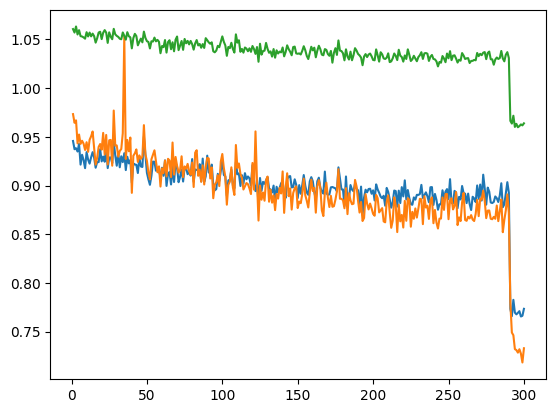

In [52]:
from matplotlib import pyplot as plt

results_file = 'runs/detect/train1424/results.csv'  # Update the path as needed
results = pd.read_csv(results_file)

plt.plot(results['epoch'], results['train/box_loss'], label='Box Loss')
plt.plot(results['epoch'], results['train/cls_loss'], label='Class Loss')
plt.plot(results['epoch'], results['train/dfl_loss'], label='DFL Loss')
plt.plot(results['epoch'], results['metrics/mAP_0.5:0.95'], label='mAP50-95')

plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.legend()
plt.show()


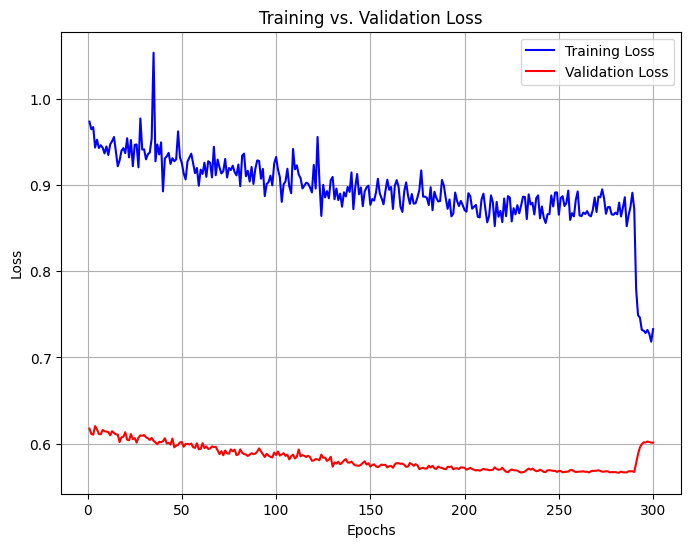

In [53]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
results = pd.read_csv('runs/detect/train1424/results.csv')

# Plot both losses in the same graph
plt.figure(figsize=(8, 6))
plt.plot(results['epoch'], results['train/cls_loss'], label='Training Loss', color='blue')
plt.plot(results['epoch'], results['val/cls_loss'], label='Validation Loss', color='red')

# Add labels, title, and legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [54]:
# Validation code after training
results = model.val(
    data='datasets/augdataset/Datasets/data.yaml',  # Path to data.yaml
    batch=8,                # Batch size for validation
    imgsz=640,              # Input image size
    device=0,               # GPU device (0 for first GPU, 'cpu' for CPU)
    iou=0.65,               # IoU threshold for NMS
    save_json=True,         # Save results to JSON file
    save_txt=True,          # Save detection results as text files
    save_hybrid=True,       # Save hybrid format (labels + predictions)
    conf=0.001,             # Confidence threshold for predictions
    half=True               # Use FP16 for faster inference (if supported)
)


WARNING ⚠️ 'save_hybrid=True' will append ground truth to predictions for autolabelling.
WARNING ⚠️ 'save_hybrid=True' will cause incorrect mAP.

Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7940MiB)


val: Scanning /home/ai/Desktop/kaniska/datasets/augdataset/Datasets/valid/labels.cache... 161 images, 0 backgrounds, 0 corrupt: 100%|██████████| 161/161 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.04it/s]


                   all        161       1917          1          1      0.995      0.995
                     0         49         98          1          1      0.995      0.995
                     1         62        140          1          1      0.995      0.995
                     2         85        438          1          1      0.995      0.995
                     3         56        228          1          1      0.995      0.995
                     4         59        222          1          1      0.995      0.995
                     5         61        791          1          1      0.995      0.995
Speed: 0.5ms preprocess, 3.0ms inference, 0.0ms loss, 0.8ms postprocess per image
Saving runs/detect/train14243/predictions.json...
Results saved to runs/detect/train14243


In [57]:
results = model.train(
    data='datasets/augdataset/Datasets/data.yaml',  # Path to your data.yaml
    epochs=300,               # Number of epochs
    batch=8,                  # Batch size
    imgsz=640,                # Image size
    device=0,                 # GPU device ID (set to 0 for the first GPU)
    resume=False,             # Do not resume from a checkpoint
    save_period=50,           # Save model every 50 epochs

    # Optimizer and learning rate
    optimizer='Adam',         # Use Adam optimizer
    lr0=0.001,                # Initial learning rate (default for Adam)
    
    **data_augmentation,
                 # HSV-Value augmentation

    # Other hyperparameters
    weight_decay=0.0005,      # L2 weight regularization
)


New https://pypi.org/project/ultralytics/8.3.86 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7940MiB)
engine/trainer: task=detect, mode=train, model=yolov12n.pt, data=datasets/augdataset/Datasets/data.yaml, epochs=300, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=50, cache=False, device=0, workers=8, project=None, name=train14244, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fal

train: Scanning /home/ai/Desktop/kaniska/datasets/augdataset/Datasets/train/labels.cache... 1689 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1689/1689 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /home/ai/Desktop/kaniska/datasets/augdataset/Datasets/valid/labels.cache... 161 images, 0 backgrounds, 0 corrupt: 100%|██████████| 161/161 [00:00<?, ?it/s]


Plotting labels to runs/detect/train14244/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train14244
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      2.36G     0.9676      1.007      1.069         40        640: 100%|██████████| 212/212 [00:20<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.33it/s]

                   all        161       1917      0.805      0.771      0.842      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      2.66G     0.9502      1.014       1.06         12        640: 100%|██████████| 212/212 [00:18<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.97it/s]

                   all        161       1917       0.82      0.764      0.842      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      2.19G     0.9481      1.026       1.06          8        640: 100%|██████████| 212/212 [00:18<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.07it/s]

                   all        161       1917      0.798      0.749      0.831      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      2.27G     0.9352     0.9899      1.046         32        640: 100%|██████████| 212/212 [00:18<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.12it/s]

                   all        161       1917      0.754      0.799      0.839       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      2.23G     0.9284     0.9694      1.044         34        640: 100%|██████████| 212/212 [00:18<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.22it/s]

                   all        161       1917       0.75      0.756      0.814      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      2.26G     0.9064     0.9451      1.035         28        640: 100%|██████████| 212/212 [00:18<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.39it/s]

                   all        161       1917      0.803      0.798      0.848      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300       2.4G     0.9074     0.9421      1.031         12        640: 100%|██████████| 212/212 [00:18<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.18it/s]

                   all        161       1917       0.79      0.799      0.849      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      2.54G     0.8898     0.9234      1.025         30        640: 100%|██████████| 212/212 [00:18<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.32it/s]

                   all        161       1917      0.811      0.778      0.857      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      2.22G     0.8782     0.8963      1.021          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.44it/s]

                   all        161       1917      0.796      0.796      0.854       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      2.23G     0.8892      0.887      1.025         49        640: 100%|██████████| 212/212 [00:18<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.43it/s]

                   all        161       1917       0.82      0.781      0.863      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      2.38G     0.8712      0.875      1.015          2        640: 100%|██████████| 212/212 [00:18<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.45it/s]

                   all        161       1917      0.821      0.787      0.855       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      2.34G     0.8653      0.868      1.019          8        640: 100%|██████████| 212/212 [00:18<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.30it/s]

                   all        161       1917      0.821       0.79      0.864      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      2.21G     0.8664     0.8787      1.013          3        640: 100%|██████████| 212/212 [00:18<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.35it/s]

                   all        161       1917      0.844      0.773      0.874      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      2.11G     0.8673     0.8759      1.011          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.30it/s]

                   all        161       1917      0.809      0.796      0.861      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      2.11G     0.8559       0.85      1.008         16        640: 100%|██████████| 212/212 [00:18<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.65it/s]

                   all        161       1917      0.801      0.815      0.871       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      2.22G     0.8479     0.8331      1.003         16        640: 100%|██████████| 212/212 [00:18<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.59it/s]

                   all        161       1917      0.825      0.796      0.875      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300       2.3G     0.8473     0.8362      1.001         14        640: 100%|██████████| 212/212 [00:18<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.59it/s]

                   all        161       1917      0.836      0.799      0.878      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      2.24G     0.8412     0.8229      1.007          9        640: 100%|██████████| 212/212 [00:18<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.67it/s]

                   all        161       1917      0.828      0.798       0.88       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      2.23G     0.8543     0.8223      1.005          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.07it/s]

                   all        161       1917      0.808      0.801      0.871      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      2.39G     0.8356     0.8065     0.9959         38        640: 100%|██████████| 212/212 [00:18<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.24it/s]

                   all        161       1917      0.803      0.786      0.855      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      2.36G     0.8439     0.8304      1.005         31        640: 100%|██████████| 212/212 [00:18<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.63it/s]

                   all        161       1917      0.823      0.811       0.88      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      2.57G     0.8261     0.8048     0.9995         16        640: 100%|██████████| 212/212 [00:18<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.63it/s]

                   all        161       1917      0.813      0.815      0.883      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      2.04G      0.837     0.8159     0.9943          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.79it/s]

                   all        161       1917      0.825      0.807      0.876       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      2.22G     0.8219     0.7799     0.9884         11        640: 100%|██████████| 212/212 [00:18<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.68it/s]

                   all        161       1917      0.831      0.802      0.877      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      2.07G     0.8307     0.8062     0.9978         13        640: 100%|██████████| 212/212 [00:18<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.68it/s]

                   all        161       1917      0.805      0.817      0.873      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      2.11G     0.8244     0.7937     0.9923          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.53it/s]

                   all        161       1917      0.807      0.797      0.866      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      2.14G     0.8208     0.7739     0.9894          9        640: 100%|██████████| 212/212 [00:18<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.13it/s]

                   all        161       1917      0.821      0.807      0.877       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      2.32G      0.833     0.8177     0.9942         17        640: 100%|██████████| 212/212 [00:18<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.49it/s]

                   all        161       1917      0.809      0.795      0.862      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      2.16G     0.8271     0.7915     0.9934         19        640: 100%|██████████| 212/212 [00:18<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.78it/s]

                   all        161       1917      0.829      0.826      0.881      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300       2.3G     0.8079     0.7741     0.9883          9        640: 100%|██████████| 212/212 [00:18<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.79it/s]

                   all        161       1917      0.839      0.769       0.87      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      2.28G     0.8184     0.7674     0.9864         28        640: 100%|██████████| 212/212 [00:18<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.59it/s]

                   all        161       1917      0.844      0.808       0.88      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      2.02G     0.8096     0.7749     0.9883         23        640: 100%|██████████| 212/212 [00:18<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.39it/s]

                   all        161       1917      0.812      0.819      0.877      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      2.27G     0.8163     0.7736     0.9849         16        640: 100%|██████████| 212/212 [00:18<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.75it/s]

                   all        161       1917      0.847       0.81      0.879      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      2.29G     0.8072     0.7761     0.9905          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.95it/s]

                   all        161       1917      0.812      0.807      0.877      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      2.24G     0.8223     0.8271     0.9907          1        640: 100%|██████████| 212/212 [00:18<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.31it/s]

                   all        161       1917      0.823      0.796      0.869      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      2.06G     0.8022     0.7481     0.9829         34        640: 100%|██████████| 212/212 [00:18<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.68it/s]

                   all        161       1917       0.83      0.783      0.866      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      2.47G     0.8093     0.7691     0.9875         29        640: 100%|██████████| 212/212 [00:18<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.59it/s]

                   all        161       1917       0.86      0.798      0.882      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      2.38G     0.8004     0.7473     0.9857          5        640: 100%|██████████| 212/212 [00:18<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.38it/s]

                   all        161       1917      0.833      0.798      0.879      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      2.31G     0.8054     0.7629     0.9841          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.59it/s]

                   all        161       1917      0.823      0.816      0.885      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      2.39G     0.7792     0.7013     0.9715         12        640: 100%|██████████| 212/212 [00:18<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.73it/s]

                   all        161       1917      0.825      0.804      0.878      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      2.17G     0.7954     0.7379     0.9818         34        640: 100%|██████████| 212/212 [00:18<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.26it/s]

                   all        161       1917      0.826      0.827      0.896      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      2.19G     0.7953     0.7392     0.9848         43        640: 100%|██████████| 212/212 [00:18<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.59it/s]

                   all        161       1917      0.849      0.794      0.887      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      2.43G     0.7901     0.7384      0.978          5        640: 100%|██████████| 212/212 [00:18<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.66it/s]

                   all        161       1917      0.839      0.782       0.88      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300       2.5G     0.7851     0.7289     0.9717         21        640: 100%|██████████| 212/212 [00:18<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.75it/s]

                   all        161       1917      0.829      0.792       0.88      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      2.19G     0.7955      0.723     0.9743         25        640: 100%|██████████| 212/212 [00:18<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.52it/s]

                   all        161       1917      0.837      0.784      0.884      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      2.16G     0.7941      0.729      0.979         15        640: 100%|██████████| 212/212 [00:18<00:00, 11.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.73it/s]

                   all        161       1917      0.835      0.792      0.878      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      2.33G     0.7844     0.7192      0.971         27        640: 100%|██████████| 212/212 [00:18<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.64it/s]

                   all        161       1917      0.841      0.826      0.891      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      2.45G     0.8128     0.7478     0.9813         33        640: 100%|██████████| 212/212 [00:19<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.73it/s]

                   all        161       1917      0.828      0.818      0.883      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      2.38G     0.7958     0.7194     0.9752         11        640: 100%|██████████| 212/212 [00:18<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.44it/s]

                   all        161       1917       0.82      0.825      0.878      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      2.46G     0.7747      0.717     0.9721         11        640: 100%|██████████| 212/212 [00:18<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.56it/s]

                   all        161       1917      0.836      0.809      0.891      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      2.46G     0.7709     0.7018     0.9699         10        640: 100%|██████████| 212/212 [00:18<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.39it/s]

                   all        161       1917      0.813       0.83      0.886       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      2.24G     0.7692     0.7028     0.9671         10        640: 100%|██████████| 212/212 [00:18<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.57it/s]

                   all        161       1917      0.819      0.806      0.879      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      2.38G     0.7795      0.712     0.9754          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.61it/s]

                   all        161       1917      0.859      0.788      0.888      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      2.26G     0.7908     0.7117     0.9719         11        640: 100%|██████████| 212/212 [00:18<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.66it/s]

                   all        161       1917      0.834      0.811      0.889      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      2.48G     0.7853     0.7085      0.972          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.57it/s]

                   all        161       1917      0.809      0.825      0.878      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      2.25G     0.7757     0.7121     0.9703          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.21it/s]

                   all        161       1917      0.831      0.801      0.879      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300       2.3G     0.7762     0.7016     0.9725         11        640: 100%|██████████| 212/212 [00:18<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.66it/s]

                   all        161       1917      0.822       0.81       0.89      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      2.07G     0.7756     0.6958     0.9717         41        640: 100%|██████████| 212/212 [00:18<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.69it/s]

                   all        161       1917      0.831      0.785      0.877      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      2.19G      0.766     0.6815     0.9592         67        640: 100%|██████████| 212/212 [00:18<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.41it/s]

                   all        161       1917      0.818       0.81      0.877      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      2.48G     0.7731     0.6886     0.9661         39        640: 100%|██████████| 212/212 [00:18<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.40it/s]

                   all        161       1917      0.833      0.796      0.878      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      2.28G     0.7647     0.6904     0.9638         37        640: 100%|██████████| 212/212 [00:18<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.54it/s]

                   all        161       1917      0.835      0.819      0.883      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      2.34G     0.7781     0.6967      0.968         11        640: 100%|██████████| 212/212 [00:18<00:00, 11.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.68it/s]

                   all        161       1917      0.841      0.786      0.876      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      1.98G      0.758     0.6778     0.9579         18        640: 100%|██████████| 212/212 [00:18<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.86it/s]

                   all        161       1917      0.856      0.799      0.888      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      2.11G     0.7659     0.6848     0.9663          3        640: 100%|██████████| 212/212 [00:18<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.42it/s]

                   all        161       1917      0.819      0.808      0.878      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      2.17G     0.7663     0.6899     0.9679         34        640: 100%|██████████| 212/212 [00:18<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.64it/s]

                   all        161       1917      0.869      0.776      0.889      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      2.18G     0.7517     0.6685     0.9607         14        640: 100%|██████████| 212/212 [00:18<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.28it/s]

                   all        161       1917      0.832      0.813      0.875      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300      2.29G     0.7674     0.6919     0.9634          3        640: 100%|██████████| 212/212 [00:18<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.44it/s]

                   all        161       1917      0.796      0.819      0.874       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      2.35G     0.7556     0.6683     0.9587          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.54it/s]

                   all        161       1917      0.832      0.787      0.876      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      2.15G     0.7742     0.6908     0.9678         13        640: 100%|██████████| 212/212 [00:18<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.02it/s]

                   all        161       1917      0.825      0.797      0.884      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300      2.26G     0.7593     0.6755     0.9646          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.57it/s]

                   all        161       1917      0.829      0.816      0.889      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300      2.32G     0.7549     0.6692     0.9582         12        640: 100%|██████████| 212/212 [00:18<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.02it/s]

                   all        161       1917      0.798      0.819      0.872       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      2.17G     0.7567     0.6764     0.9609         25        640: 100%|██████████| 212/212 [00:19<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.35it/s]

                   all        161       1917      0.816      0.805      0.883      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      2.47G     0.7659      0.688     0.9666         43        640: 100%|██████████| 212/212 [00:18<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.06it/s]

                   all        161       1917      0.847      0.791      0.884      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      1.92G     0.7517     0.6515     0.9579          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.72it/s]

                   all        161       1917      0.825      0.812       0.88      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      2.25G     0.7557     0.6679     0.9627         39        640: 100%|██████████| 212/212 [00:18<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.22it/s]

                   all        161       1917      0.852      0.789      0.879      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      2.51G     0.7553     0.6652     0.9616         50        640: 100%|██████████| 212/212 [00:18<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.40it/s]

                   all        161       1917      0.824        0.8      0.876      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      2.42G      0.755     0.6679     0.9633         13        640: 100%|██████████| 212/212 [00:18<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.71it/s]

                   all        161       1917      0.823      0.815      0.871      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      2.01G     0.7563     0.6642     0.9613          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.25it/s]

                   all        161       1917      0.808      0.811      0.868       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300      2.09G     0.7514     0.6599     0.9622         24        640: 100%|██████████| 212/212 [00:18<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.44it/s]

                   all        161       1917      0.818      0.806      0.874      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      2.16G     0.7646     0.6712     0.9585         16        640: 100%|██████████| 212/212 [00:18<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.63it/s]

                   all        161       1917      0.837      0.788      0.878      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300       2.6G     0.7482      0.651     0.9538          4        640: 100%|██████████| 212/212 [00:19<00:00, 11.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.36it/s]

                   all        161       1917      0.814      0.809      0.879      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300      2.22G     0.7485      0.665     0.9564          2        640: 100%|██████████| 212/212 [00:19<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.61it/s]

                   all        161       1917      0.816        0.8      0.866      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300      2.45G     0.7534     0.6584     0.9602          3        640: 100%|██████████| 212/212 [00:18<00:00, 11.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.55it/s]

                   all        161       1917      0.833      0.784      0.871      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300      2.41G     0.7545     0.6515     0.9584          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.67it/s]

                   all        161       1917      0.847      0.789      0.871      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      2.25G     0.7589     0.6521     0.9578          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.54it/s]

                   all        161       1917      0.826      0.813      0.878      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300      2.31G      0.748     0.6501     0.9573         30        640: 100%|██████████| 212/212 [00:18<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.33it/s]

                   all        161       1917      0.818      0.809       0.87      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300      2.29G     0.7641     0.6591      0.958          5        640: 100%|██████████| 212/212 [00:19<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.64it/s]

                   all        161       1917      0.823      0.809      0.875      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300      2.44G     0.7393     0.6314     0.9536         15        640: 100%|██████████| 212/212 [00:18<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.54it/s]

                   all        161       1917      0.822      0.826       0.88      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300      2.28G     0.7449     0.6646      0.965         10        640: 100%|██████████| 212/212 [00:18<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.75it/s]

                   all        161       1917      0.817      0.812      0.873      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300      2.27G      0.761     0.6577     0.9575          8        640: 100%|██████████| 212/212 [00:18<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.08it/s]

                   all        161       1917      0.825      0.813      0.876      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300      2.17G     0.7496     0.6619     0.9586         13        640: 100%|██████████| 212/212 [00:18<00:00, 11.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.49it/s]

                   all        161       1917      0.824      0.804      0.875      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      2.35G     0.7504      0.651      0.957          3        640: 100%|██████████| 212/212 [00:18<00:00, 11.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.62it/s]

                   all        161       1917      0.791      0.841      0.878      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300      2.07G     0.7535     0.6429      0.958         15        640: 100%|██████████| 212/212 [00:18<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.24it/s]

                   all        161       1917       0.83      0.819      0.885      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300      2.36G     0.7345     0.6179     0.9486         27        640: 100%|██████████| 212/212 [00:18<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.81it/s]

                   all        161       1917      0.817      0.811      0.878      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      2.27G     0.7285     0.6212     0.9475         48        640: 100%|██████████| 212/212 [00:18<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.75it/s]

                   all        161       1917      0.828      0.801      0.876      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300      2.28G     0.7271     0.6183     0.9492         15        640: 100%|██████████| 212/212 [00:19<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.96it/s]

                   all        161       1917      0.815      0.818      0.875      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      2.43G     0.7429     0.6313     0.9551         10        640: 100%|██████████| 212/212 [00:19<00:00, 10.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.53it/s]

                   all        161       1917      0.847      0.792      0.874      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      2.29G     0.7389     0.6235     0.9528         18        640: 100%|██████████| 212/212 [00:19<00:00, 11.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.36it/s]

                   all        161       1917      0.806      0.802      0.871       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      2.71G     0.7404      0.646     0.9567         39        640: 100%|██████████| 212/212 [00:19<00:00, 11.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.47it/s]

                   all        161       1917      0.797       0.82       0.87      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300      2.17G       0.75      0.658     0.9603         12        640: 100%|██████████| 212/212 [00:19<00:00, 11.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.50it/s]

                   all        161       1917      0.807      0.804      0.868      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      2.25G     0.7417     0.6341     0.9575         12        640: 100%|██████████| 212/212 [00:19<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.22it/s]

                   all        161       1917      0.827      0.802      0.869      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300       2.3G     0.7392     0.6322     0.9535          6        640: 100%|██████████| 212/212 [00:19<00:00, 11.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.96it/s]


                   all        161       1917      0.812       0.82      0.876      0.747

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300      2.13G     0.7191     0.5969     0.9422          8        640: 100%|██████████| 212/212 [00:19<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.92it/s]

                   all        161       1917      0.845      0.774       0.87      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300       2.3G     0.7288     0.6222     0.9499          9        640: 100%|██████████| 212/212 [00:19<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.71it/s]

                   all        161       1917      0.839      0.788      0.874      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300      2.48G     0.7357     0.6304     0.9507         37        640: 100%|██████████| 212/212 [00:19<00:00, 11.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.68it/s]

                   all        161       1917      0.828      0.796      0.868      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      2.18G     0.7404     0.6391     0.9519          6        640: 100%|██████████| 212/212 [00:19<00:00, 11.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.52it/s]

                   all        161       1917      0.816      0.788      0.867      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300      2.14G     0.7261     0.6147     0.9481         10        640: 100%|██████████| 212/212 [00:19<00:00, 11.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.21it/s]

                   all        161       1917      0.832      0.806      0.866      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300      2.29G     0.7246     0.6078     0.9449         38        640: 100%|██████████| 212/212 [00:19<00:00, 11.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.47it/s]

                   all        161       1917      0.843      0.775      0.867      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      2.13G     0.7459     0.6566     0.9573          3        640: 100%|██████████| 212/212 [00:19<00:00, 11.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.34it/s]

                   all        161       1917      0.807        0.8      0.873       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      2.12G      0.737     0.6321     0.9539         14        640: 100%|██████████| 212/212 [00:19<00:00, 11.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.37it/s]

                   all        161       1917      0.858      0.777      0.874      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300      2.04G     0.7348     0.6302     0.9553         35        640: 100%|██████████| 212/212 [00:19<00:00, 11.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.95it/s]

                   all        161       1917       0.81      0.809      0.865      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      2.42G     0.7236     0.6092     0.9445         34        640: 100%|██████████| 212/212 [00:19<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.38it/s]

                   all        161       1917      0.831      0.785      0.858      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      2.28G     0.7372     0.6189       0.95          6        640: 100%|██████████| 212/212 [00:19<00:00, 10.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.48it/s]

                   all        161       1917      0.826      0.809       0.87      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      2.31G     0.7288     0.6109     0.9466         28        640: 100%|██████████| 212/212 [00:19<00:00, 11.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.04it/s]

                   all        161       1917      0.839      0.778      0.861      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300      2.51G     0.7332     0.6112     0.9465         34        640: 100%|██████████| 212/212 [00:19<00:00, 11.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.42it/s]

                   all        161       1917      0.844      0.796      0.872      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300      2.39G     0.7319     0.6133     0.9484         43        640: 100%|██████████| 212/212 [00:19<00:00, 11.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.43it/s]

                   all        161       1917      0.806      0.811      0.855      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      2.06G     0.7311     0.6152     0.9443          9        640: 100%|██████████| 212/212 [00:19<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.37it/s]

                   all        161       1917      0.834      0.793      0.866      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      2.08G     0.7272     0.5996     0.9455          4        640: 100%|██████████| 212/212 [00:19<00:00, 11.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.91it/s]

                   all        161       1917      0.835      0.791      0.871      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      2.52G     0.7196     0.6004     0.9435          9        640: 100%|██████████| 212/212 [00:19<00:00, 11.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.16it/s]

                   all        161       1917      0.821      0.795      0.864      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300      2.71G     0.7377     0.6314     0.9484         31        640: 100%|██████████| 212/212 [00:19<00:00, 11.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.43it/s]

                   all        161       1917      0.814      0.816      0.874      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      2.42G     0.7188     0.6037     0.9465         16        640: 100%|██████████| 212/212 [00:19<00:00, 11.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.64it/s]

                   all        161       1917       0.85      0.788       0.87      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300       2.5G     0.7133     0.6048     0.9383          0        640: 100%|██████████| 212/212 [00:19<00:00, 11.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.16it/s]

                   all        161       1917      0.823      0.794       0.86      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300      2.14G     0.7164     0.5918     0.9437          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.32it/s]

                   all        161       1917      0.834      0.783      0.862      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300      2.15G      0.699     0.5749      0.933          8        640: 100%|██████████| 212/212 [00:19<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.27it/s]

                   all        161       1917      0.844      0.795      0.874      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300      2.24G     0.7188     0.5939     0.9457         15        640: 100%|██████████| 212/212 [00:19<00:00, 11.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.04it/s]

                   all        161       1917      0.802      0.819      0.866      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      2.22G     0.7089     0.5934     0.9394         30        640: 100%|██████████| 212/212 [00:18<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.37it/s]

                   all        161       1917      0.832      0.813      0.871      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300       2.4G     0.7179     0.5964     0.9415         11        640: 100%|██████████| 212/212 [00:18<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.07it/s]

                   all        161       1917      0.797       0.82      0.859      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300      2.19G     0.7175     0.5818      0.942         36        640: 100%|██████████| 212/212 [00:18<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.60it/s]

                   all        161       1917      0.838      0.787      0.869       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      2.49G     0.7154     0.5937     0.9449         25        640: 100%|██████████| 212/212 [00:18<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.61it/s]

                   all        161       1917      0.852        0.8      0.873      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300      2.08G     0.7223     0.6029      0.943         18        640: 100%|██████████| 212/212 [00:18<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.32it/s]

                   all        161       1917      0.834      0.792      0.866      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      2.18G      0.715     0.5792     0.9416          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.43it/s]

                   all        161       1917      0.814      0.814      0.864      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300      2.13G     0.7093     0.5928     0.9413          3        640: 100%|██████████| 212/212 [00:18<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.71it/s]

                   all        161       1917      0.833       0.79      0.859      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300      2.48G     0.7083     0.5749     0.9384          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.55it/s]

                   all        161       1917      0.818      0.812      0.858      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300      2.07G     0.7156     0.5948     0.9436          9        640: 100%|██████████| 212/212 [00:18<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.26it/s]

                   all        161       1917      0.845      0.791      0.867      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300      2.35G     0.6999     0.5742     0.9374         14        640: 100%|██████████| 212/212 [00:18<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.30it/s]

                   all        161       1917      0.838      0.796      0.862      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      2.38G     0.7073     0.5769     0.9395          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.46it/s]

                   all        161       1917      0.834      0.785      0.861      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300      2.22G     0.7054     0.5717      0.937          3        640: 100%|██████████| 212/212 [00:18<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.49it/s]

                   all        161       1917      0.796      0.821       0.87      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      2.08G     0.7061     0.5834      0.938          9        640: 100%|██████████| 212/212 [00:18<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.80it/s]

                   all        161       1917      0.836      0.788      0.864      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300      2.52G     0.7156     0.5892     0.9406         11        640: 100%|██████████| 212/212 [00:18<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.22it/s]

                   all        161       1917      0.816      0.807      0.865      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300      2.15G     0.7189     0.5986     0.9452          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.46it/s]

                   all        161       1917      0.809      0.827      0.866      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300      2.18G     0.7014     0.5657     0.9353         15        640: 100%|██████████| 212/212 [00:18<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.45it/s]

                   all        161       1917       0.83      0.806      0.862      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      2.14G     0.7006     0.5797     0.9392          5        640: 100%|██████████| 212/212 [00:18<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.64it/s]

                   all        161       1917      0.832      0.788      0.863      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300      2.27G     0.7109     0.5941     0.9423          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.49it/s]

                   all        161       1917      0.822       0.81      0.865      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      2.39G     0.7156     0.5856     0.9403          9        640: 100%|██████████| 212/212 [00:18<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.71it/s]

                   all        161       1917      0.798      0.819      0.865      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300      2.43G     0.7161     0.5814     0.9378         24        640: 100%|██████████| 212/212 [00:18<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.73it/s]

                   all        161       1917      0.806      0.814      0.869      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300      2.27G     0.7086     0.5671     0.9374         23        640: 100%|██████████| 212/212 [00:18<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.94it/s]

                   all        161       1917       0.83      0.795      0.862       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300      2.41G      0.707     0.5713     0.9425          6        640: 100%|██████████| 212/212 [00:18<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.95it/s]

                   all        161       1917      0.822       0.82      0.865      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300      2.29G     0.7097     0.5742     0.9401          2        640: 100%|██████████| 212/212 [00:18<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.87it/s]

                   all        161       1917      0.824       0.81      0.864       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      2.28G     0.7078     0.5813     0.9371         24        640: 100%|██████████| 212/212 [00:18<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 15.03it/s]

                   all        161       1917       0.83       0.82      0.869      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      2.08G     0.6943     0.5603     0.9378          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.99it/s]

                   all        161       1917      0.814      0.804      0.857      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      2.46G      0.709     0.5754     0.9366         11        640: 100%|██████████| 212/212 [00:18<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.85it/s]

                   all        161       1917      0.833      0.787       0.86      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300      2.12G     0.6969     0.5682     0.9347         15        640: 100%|██████████| 212/212 [00:18<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.92it/s]

                   all        161       1917      0.834      0.796      0.864      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300      2.54G     0.6974     0.5556     0.9351         18        640: 100%|██████████| 212/212 [00:18<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.84it/s]

                   all        161       1917      0.811      0.811      0.862      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300      2.14G     0.7117     0.5827     0.9392          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.80it/s]

                   all        161       1917      0.801      0.812      0.858      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300       2.2G     0.7008     0.5659     0.9354          8        640: 100%|██████████| 212/212 [00:18<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.73it/s]

                   all        161       1917      0.811      0.822       0.87      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      2.38G     0.6944     0.5668      0.932         30        640: 100%|██████████| 212/212 [00:18<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.70it/s]

                   all        161       1917      0.834      0.809      0.866      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      2.25G     0.6953      0.561     0.9292         25        640: 100%|██████████| 212/212 [00:18<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.93it/s]

                   all        161       1917      0.835      0.794      0.863      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      2.27G     0.7021     0.5637     0.9328         14        640: 100%|██████████| 212/212 [00:18<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.72it/s]

                   all        161       1917      0.849      0.781      0.864      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300      2.31G     0.7067      0.577     0.9382         15        640: 100%|██████████| 212/212 [00:18<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 15.00it/s]

                   all        161       1917      0.843      0.785      0.866      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300      2.24G     0.7071     0.5735     0.9374         18        640: 100%|██████████| 212/212 [00:18<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.85it/s]

                   all        161       1917      0.836      0.787      0.862      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300      2.27G     0.6956     0.5681     0.9391          7        640: 100%|██████████| 212/212 [00:18<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.62it/s]

                   all        161       1917      0.798      0.826      0.863      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      2.24G     0.6918     0.5595     0.9329          4        640: 100%|██████████| 212/212 [00:18<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 14.99it/s]

                   all        161       1917      0.827      0.793       0.86      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300      2.37G     0.7003     0.5684     0.9335         12        640: 100%|██████████| 212/212 [00:18<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 15.09it/s]

                   all        161       1917      0.806      0.812      0.859      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      2.22G     0.7065     0.5765     0.9395         31        640: 100%|██████████| 212/212 [00:19<00:00, 10.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.55it/s]

                   all        161       1917      0.817      0.792      0.859      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300      2.11G     0.6977     0.5697     0.9376         16        640: 100%|██████████| 212/212 [00:19<00:00, 10.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 13.81it/s]

                   all        161       1917      0.794      0.823      0.853      0.728
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 65, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



165 epochs completed in 0.926 hours.
Optimizer stripped from runs/detect/train14244/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train14244/weights/best.pt, 5.5MB

Validating runs/detect/train14244/weights/best.pt...
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7940MiB)
YOLOv12n summary (fused): 159 layers, 2,527,946 parameters, 0 gradients, 5.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.90it/s]


                   all        161       1917      0.866      0.779       0.89      0.759
                     0         49         98      0.851      0.786      0.908      0.812
                     1         62        140      0.822      0.725      0.822      0.697
                     2         85        438      0.923      0.854      0.939      0.791
                     3         56        228      0.821      0.807      0.891      0.779
                     4         59        222      0.868      0.712      0.886       0.76
                     5         61        791       0.91      0.789      0.891      0.714
Speed: 0.2ms preprocess, 2.1ms inference, 0.1ms loss, 3.5ms postprocess per image
Results saved to runs/detect/train14244


In [62]:
import time
import torch

# Load the YOLOv12 model
model = YOLO('runs/detect/train14244/weights/best.pt')  # Replace with your model path

# Create a sample input tensor with the correct shape
# Create a normalized sample input tensor
dummy_input = torch.randn(1, 3, 640, 640).to('cuda') / 255.0
 # Batch size 1, 3 channels, 640x640 image

# Measure inference latency
with torch.no_grad():
    start_time = time.time()
    _ = model(dummy_input)
    end_time = time.time()

latency = (end_time - start_time) * 1000  # Convert to milliseconds
print(f'Model Inference Latency: {latency:.2f} ms')


0: 640x640 (no detections), 6.0ms
Speed: 0.0ms preprocess, 6.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Model Inference Latency: 88.50 ms


In [63]:
import numpy as np

latencies = []
for _ in range(100):
    start_time = time.time()
    _ = model(dummy_input)
    end_time = time.time()
    latencies.append((end_time - start_time) * 1000)

print(f'Average Latency: {np.mean(latencies):.2f} ms')



0: 640x640 (no detections), 8.3ms
Speed: 0.0ms preprocess, 8.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 6.0ms
Speed: 0.0ms preprocess, 6.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 5.9ms
Speed: 0.0ms preprocess, 5.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 6.0ms
Speed: 0.0ms preprocess, 6.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 0.0ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 6.4ms
Speed: 0.0ms preprocess, 6.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 6.5ms
Speed: 0.0ms preprocess, 6.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 6.7ms
Speed: 0.0ms preprocess, 6.7ms inference, 0.7ms 

In [64]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('photo-1621872320697-102b596ef87c.jpeg')
results = model.predict(source=image, conf=0.1)
results.plot()  # Visualize predictions

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()



0: 640x448 2 2s, 8 5s, 56.5ms
Speed: 12.0ms preprocess, 56.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 448)


AttributeError: 'list' object has no attribute 'plot'

In [65]:
print(model)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=2)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=

In [68]:
from ultralytics import YOLO
model = YOLO("runs/detect/train14244/weights/best.pt")
results = model("photo-1621872320697-102b596ef87c.jpeg")
results[0].show()


image 1/1 /home/ai/Desktop/kaniska/photo-1621872320697-102b596ef87c.jpeg: 640x448 1 2, 7 5s, 7.4ms
Speed: 2.4ms preprocess, 7.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 448)


/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/ai/snap/code/common/.cache/gio-modules/libgiolibproxy.so


In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
results = pd.read_csv('runs/detect/train1424/results.csv')

# Plot both losses in the same graph
plt.figure(figsize=(8, 6))
plt.plot(results['epoch'], results['train/cls_loss'], label='Training Loss', color='blue')
plt.plot(results['epoch'], results['val/cls_loss'], label='Validation Loss', color='red')

# Add labels, title, and legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
# Validation code after training
results = model.val(
    data='datasets/augdataset/Datasets/data.yaml',  # Path to data.yaml
    batch=8,                # Batch size for validation
    imgsz=640,              # Input image size
    device=0,               # GPU device (0 for first GPU, 'cpu' for CPU)
    iou=0.65,               # IoU threshold for NMS
    save_json=True,         # Save results to JSON file
    save_txt=True,          # Save detection results as text files
    save_hybrid=True,       # Save hybrid format (labels + predictions)
    conf=0.001,             # Confidence threshold for predictions
    half=True               # Use FP16 for faster inference (if supported)
)
